In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.dpi'] = 200
# See all columns
pd.set_option('display.max_columns', None)

In [4]:
# Load the data
df1 = pd.read_csv('C:/Users/Marcos/Desktop/Elecciones/ResultadosElectorales_2023.csv')
# df1.head()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_15780\814781686.py:2: DtypeWarning:

Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [56]:
df1 = df1[df1['cargo_nombre']=='PRESIDENTE Y VICE']
asdd = df1[df1['distrito_nombre']=='Buenos Aires']
# asdd = asdd[asdd['agrupacion_nombre']=='LA LIBERTAD AVANZA']
# asdd = asdd[asdd['votos_cantidad']==0]
# asdd
# asdd['votos_cantidad'].sum()
# 628087-532837
# df3.groupby('distrito_nombre')['votos_cantidad'].sum()
asdd.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index().sort_values(['votos_cantidad'], ascending=False)
# asdd.groupby('votos_tipo')['votos_cantidad'].sum().reset_index()

agrupacion_nombre  votos_cantidad
4                             UNION POR LA PATRIA          187229
3                              LA LIBERTAD AVANZA          103911
2                            JUNTOS POR EL CAMBIO           55097
1                        HACEMOS POR NUESTRO PAIS            8793
0  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD            2772

In [3]:
def colores_jxc(df):
    colors = sns.color_palette("YlOrBr", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

def colores_lla(df):
    colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2
    custom_palette = colors[start_index:]
    return custom_palette

def colores_upp(df):
    colors = sns.color_palette("Blues", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

<hr>

# Percentages

In [4]:
df1['id_mesa'] = df1['distrito_id'].astype(str)+'-'+df1['circuito_id'].astype(str)+'-'+df1['mesa_id'].astype(str)
df1 = df1[df1['cargo_nombre'] == 'PRESIDENTE Y VICE']
df_depurated_2 = df1.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

df_depurated_2 = df_depurated_2[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
df_depurated_2 = df_depurated_2.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
df_depurated_2['agrupacion_nombre'] = df_depurated_2['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
df_depurated_2.head(5)

distrito_nombre  distrito_id    id_mesa  mesa_electores  \
0  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
1  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
2  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
3  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
4  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   

          agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  
0       UNION POR LA PATRIA            134   POSITIVO              96  
1      JUNTOS POR EL CAMBIO            132   POSITIVO              65  
2        LA LIBERTAD AVANZA            135   POSITIVO              44  
3       FRENTE DE IZQUIERDA            136   POSITIVO              13  
4  HACEMOS POR NUESTRO PAIS            133   POSITIVO               4

In [175]:
df_depurated_2['id_mesa'].unique().shape

(104520,)

In [62]:
df_depurated_2['distrito_nombre'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [47]:
custom_palette = sns.color_palette(['#2986CC', '#6A329F', '#FCEE3C', '#16537e', '#C60004'])
result_df = df_depurated_2.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
# total_votes = result_df['votos_cantidad'].sum()
# result_df['votos_cantidad'] = round(result_df['votos_cantidad'].div(total_votes/100, axis=0),2)
result_df = result_df.sort_values('votos_cantidad', ascending=False)
result_df
# chart = sns.barplot(data = result_df, x = 'votos_cantidad', y = 'agrupacion_nombre', palette=custom_palette)
# for container in chart.containers:
#     chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])
# plt.title('\nResultados Elecciones Generales\n', fontsize=20)

# plt.xlabel('\nPorcentaje\n')
# plt.ylabel('\nAgrupación Política\n\n')
# plt.xlim(0,45)

# custom_x_labels = ['Unión Por La Patria', 'La Libertad Avanza', 'Juntos Por El Cambio', 'Hacemos Por Nuestro País','Frende De Izquierda']
# chart.set_yticklabels(custom_x_labels)

# plt.savefig('Imagenes/Resultados_Elecciones.png', bbox_inches='tight')
# plt.show()

agrupacion_nombre  votos_cantidad
4       UNION POR LA PATRIA         9645983
3        LA LIBERTAD AVANZA         7884336
2      JUNTOS POR EL CAMBIO         6267152
1  HACEMOS POR NUESTRO PAIS         1784315
0       FRENTE DE IZQUIERDA          709932

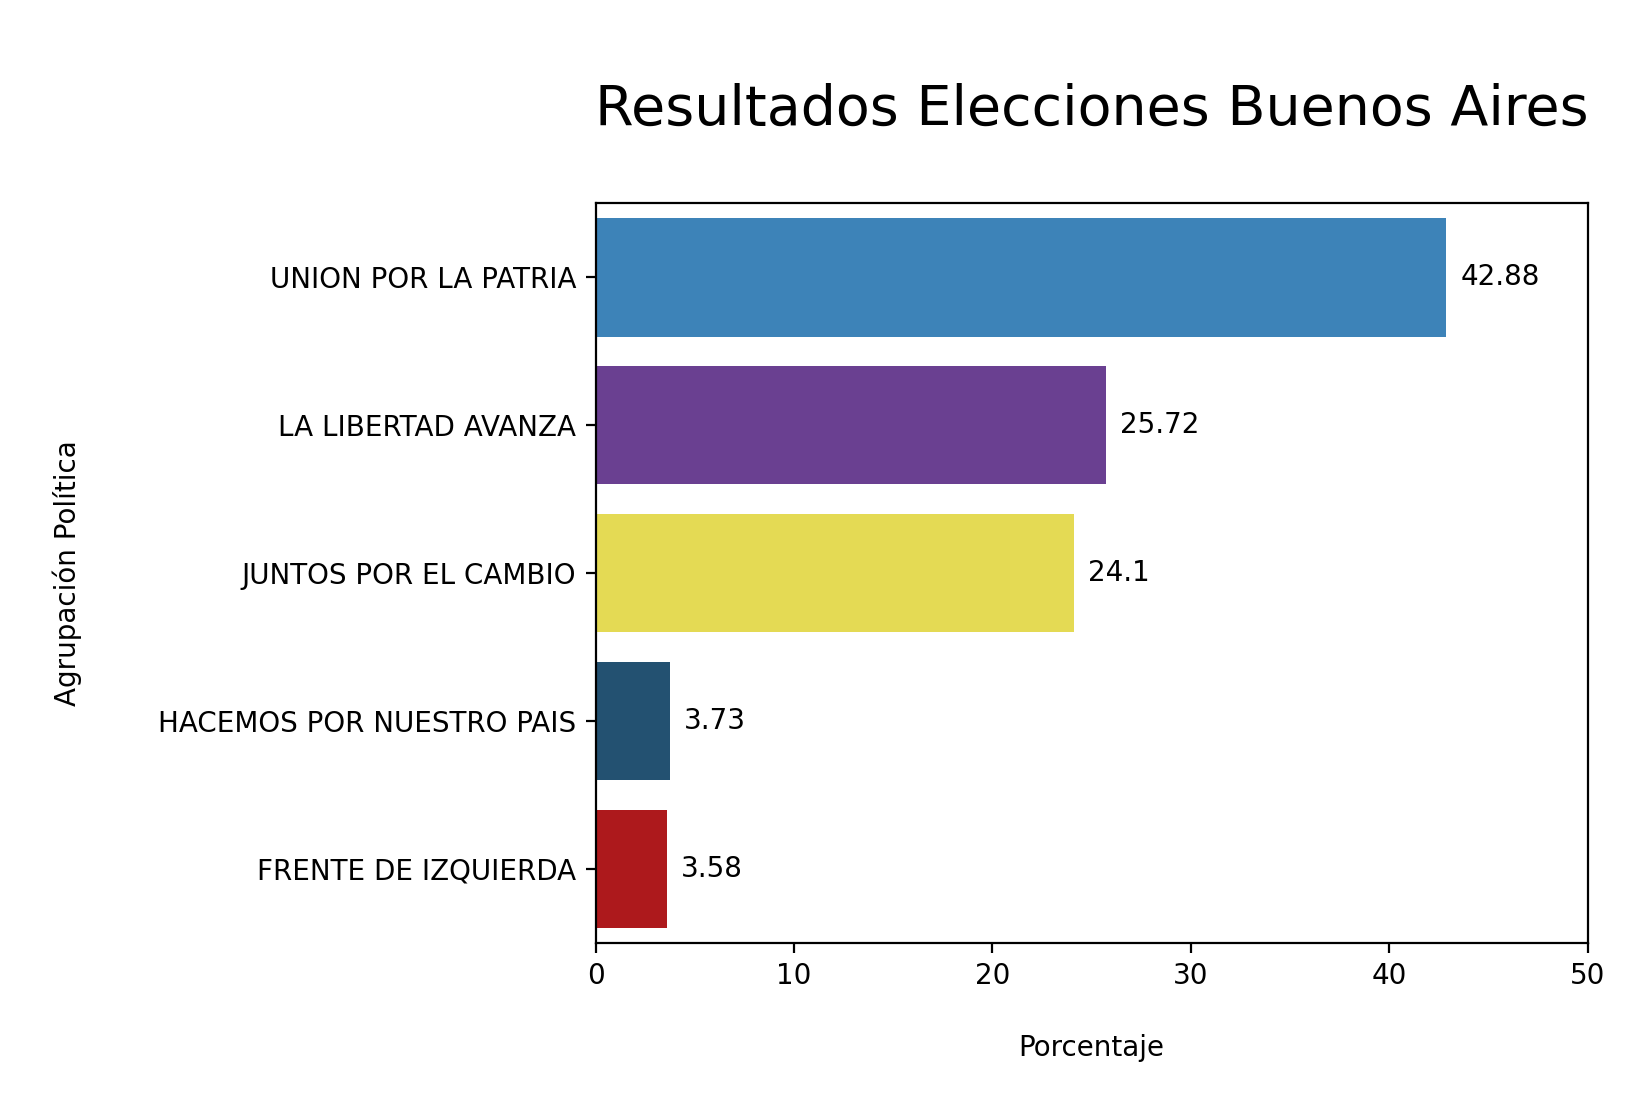

In [160]:
custom_palette = sns.color_palette(['#2986CC', '#6A329F', '#FCEE3C', '#16537e', '#C60004'])
result_df_state = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_state_2 = result_df_state.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0).reset_index()
result_df_Buenos_Aires = result_df_state_2[result_df_state_2['distrito_nombre'] == 'Buenos Aires']
result_df_Buenos_Aires = result_df_Buenos_Aires.drop('distrito_nombre', axis=1).T.reset_index().sort_values(0, ascending=False)
result_df_Buenos_Aires.rename(columns = {0:'Votos'}, inplace = True)

total_votos_bsas = result_df_Buenos_Aires['Votos'].sum()
result_df_Buenos_Aires['Votos'] = round(result_df_Buenos_Aires['Votos'].div(total_votos_bsas/100,axis=0),2)

chart = sns.barplot(data = result_df_Buenos_Aires, 
                    x = 'Votos',
                    y = 'agrupacion_nombre',
                    palette=custom_palette
                   )
chart.bar_label(chart.containers[0], fontsize=10, padding=5)
plt.title('\nResultados Elecciones Buenos Aires\n', fontsize=20)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,50)

plt.savefig('Imagenes/Resultados.BSAS.png', bbox_inches='tight')
plt.show()

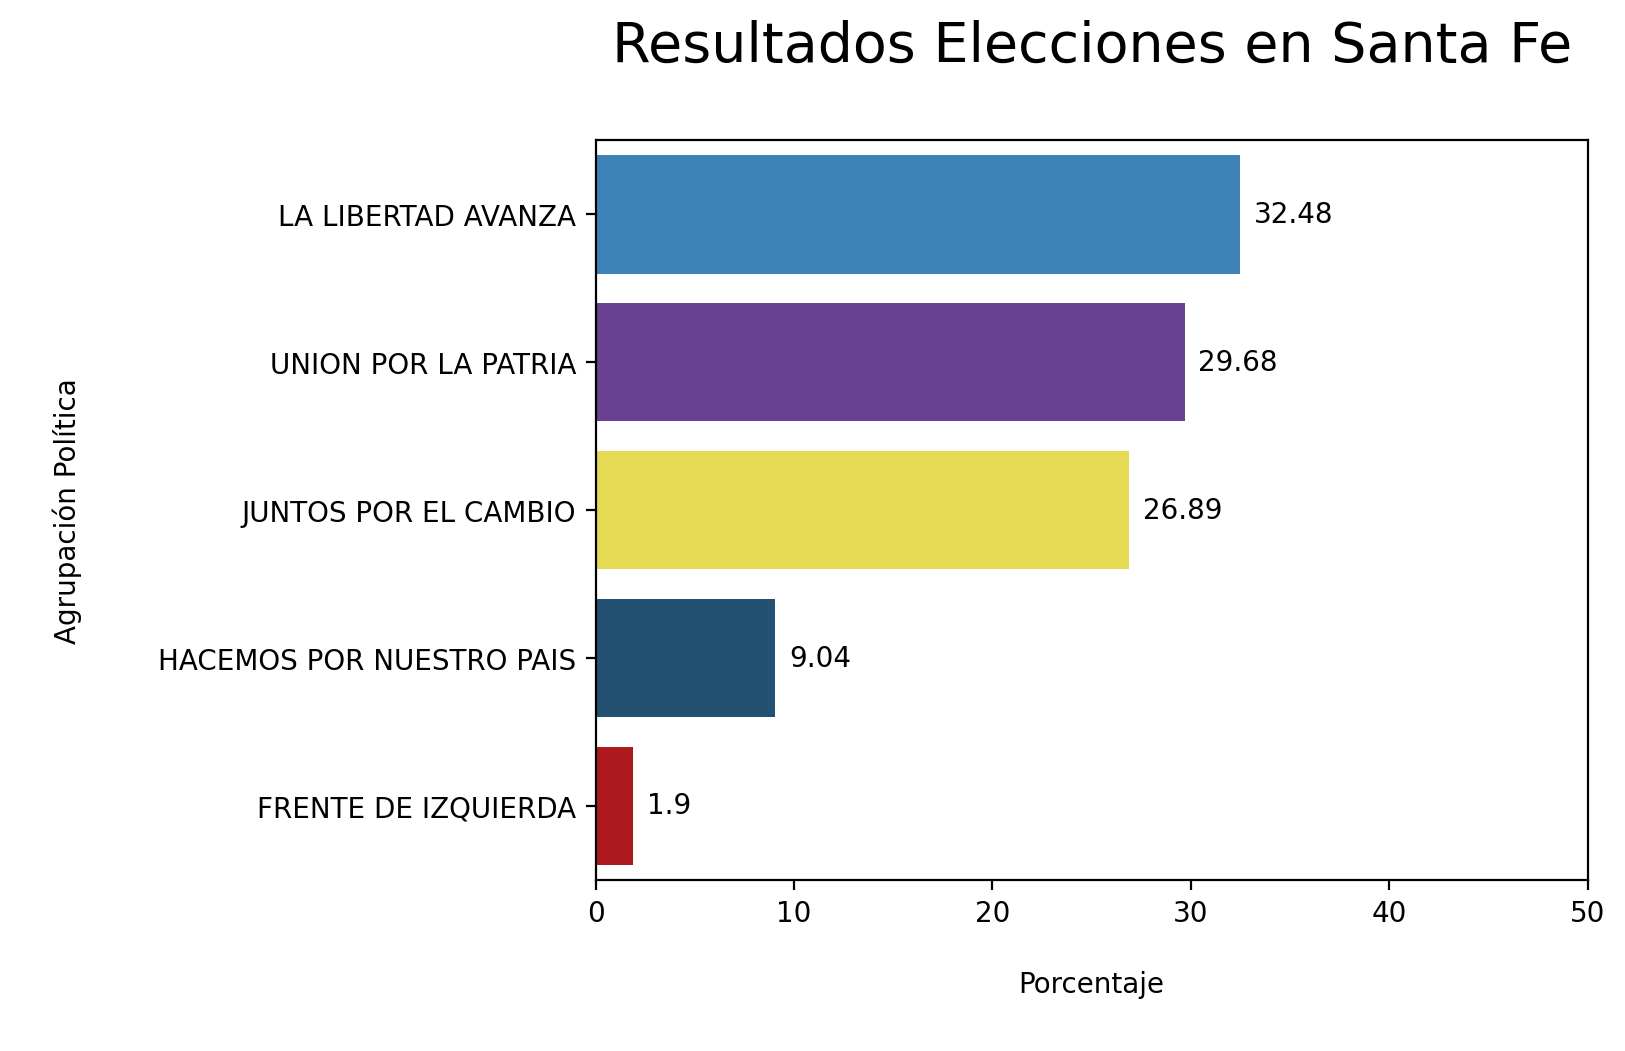

In [161]:
custom_palette = sns.color_palette(['#2986CC', '#6A329F', '#FCEE3C', '#16537e', '#C60004'])
result_df_state = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_state_2 = result_df_state.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0).reset_index()
result_df_Santa_Fe = result_df_state_2[result_df_state_2['distrito_nombre'] == 'Santa Fe']
result_df_Santa_Fe = result_df_Santa_Fe.drop('distrito_nombre', axis=1).T.reset_index().sort_values(20, ascending=False)
result_df_Santa_Fe.rename(columns = {20:'Votos'}, inplace = True)

total_votos_stafe = result_df_Santa_Fe['Votos'].sum()
result_df_Santa_Fe['Votos'] = round(result_df_Santa_Fe['Votos'].div(total_votos_stafe/100,axis=0),2)

chart = sns.barplot(data = result_df_Santa_Fe, 
                    x = 'Votos',
                    y = 'agrupacion_nombre',
                    palette=custom_palette
                   )
chart.bar_label(chart.containers[0], fontsize=10, padding=5)
plt.title('Resultados Elecciones en Santa Fe\n', fontsize=20)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,50)

plt.savefig('Imagenes/Resultados_STAFE.png', bbox_inches='tight')
plt.show()

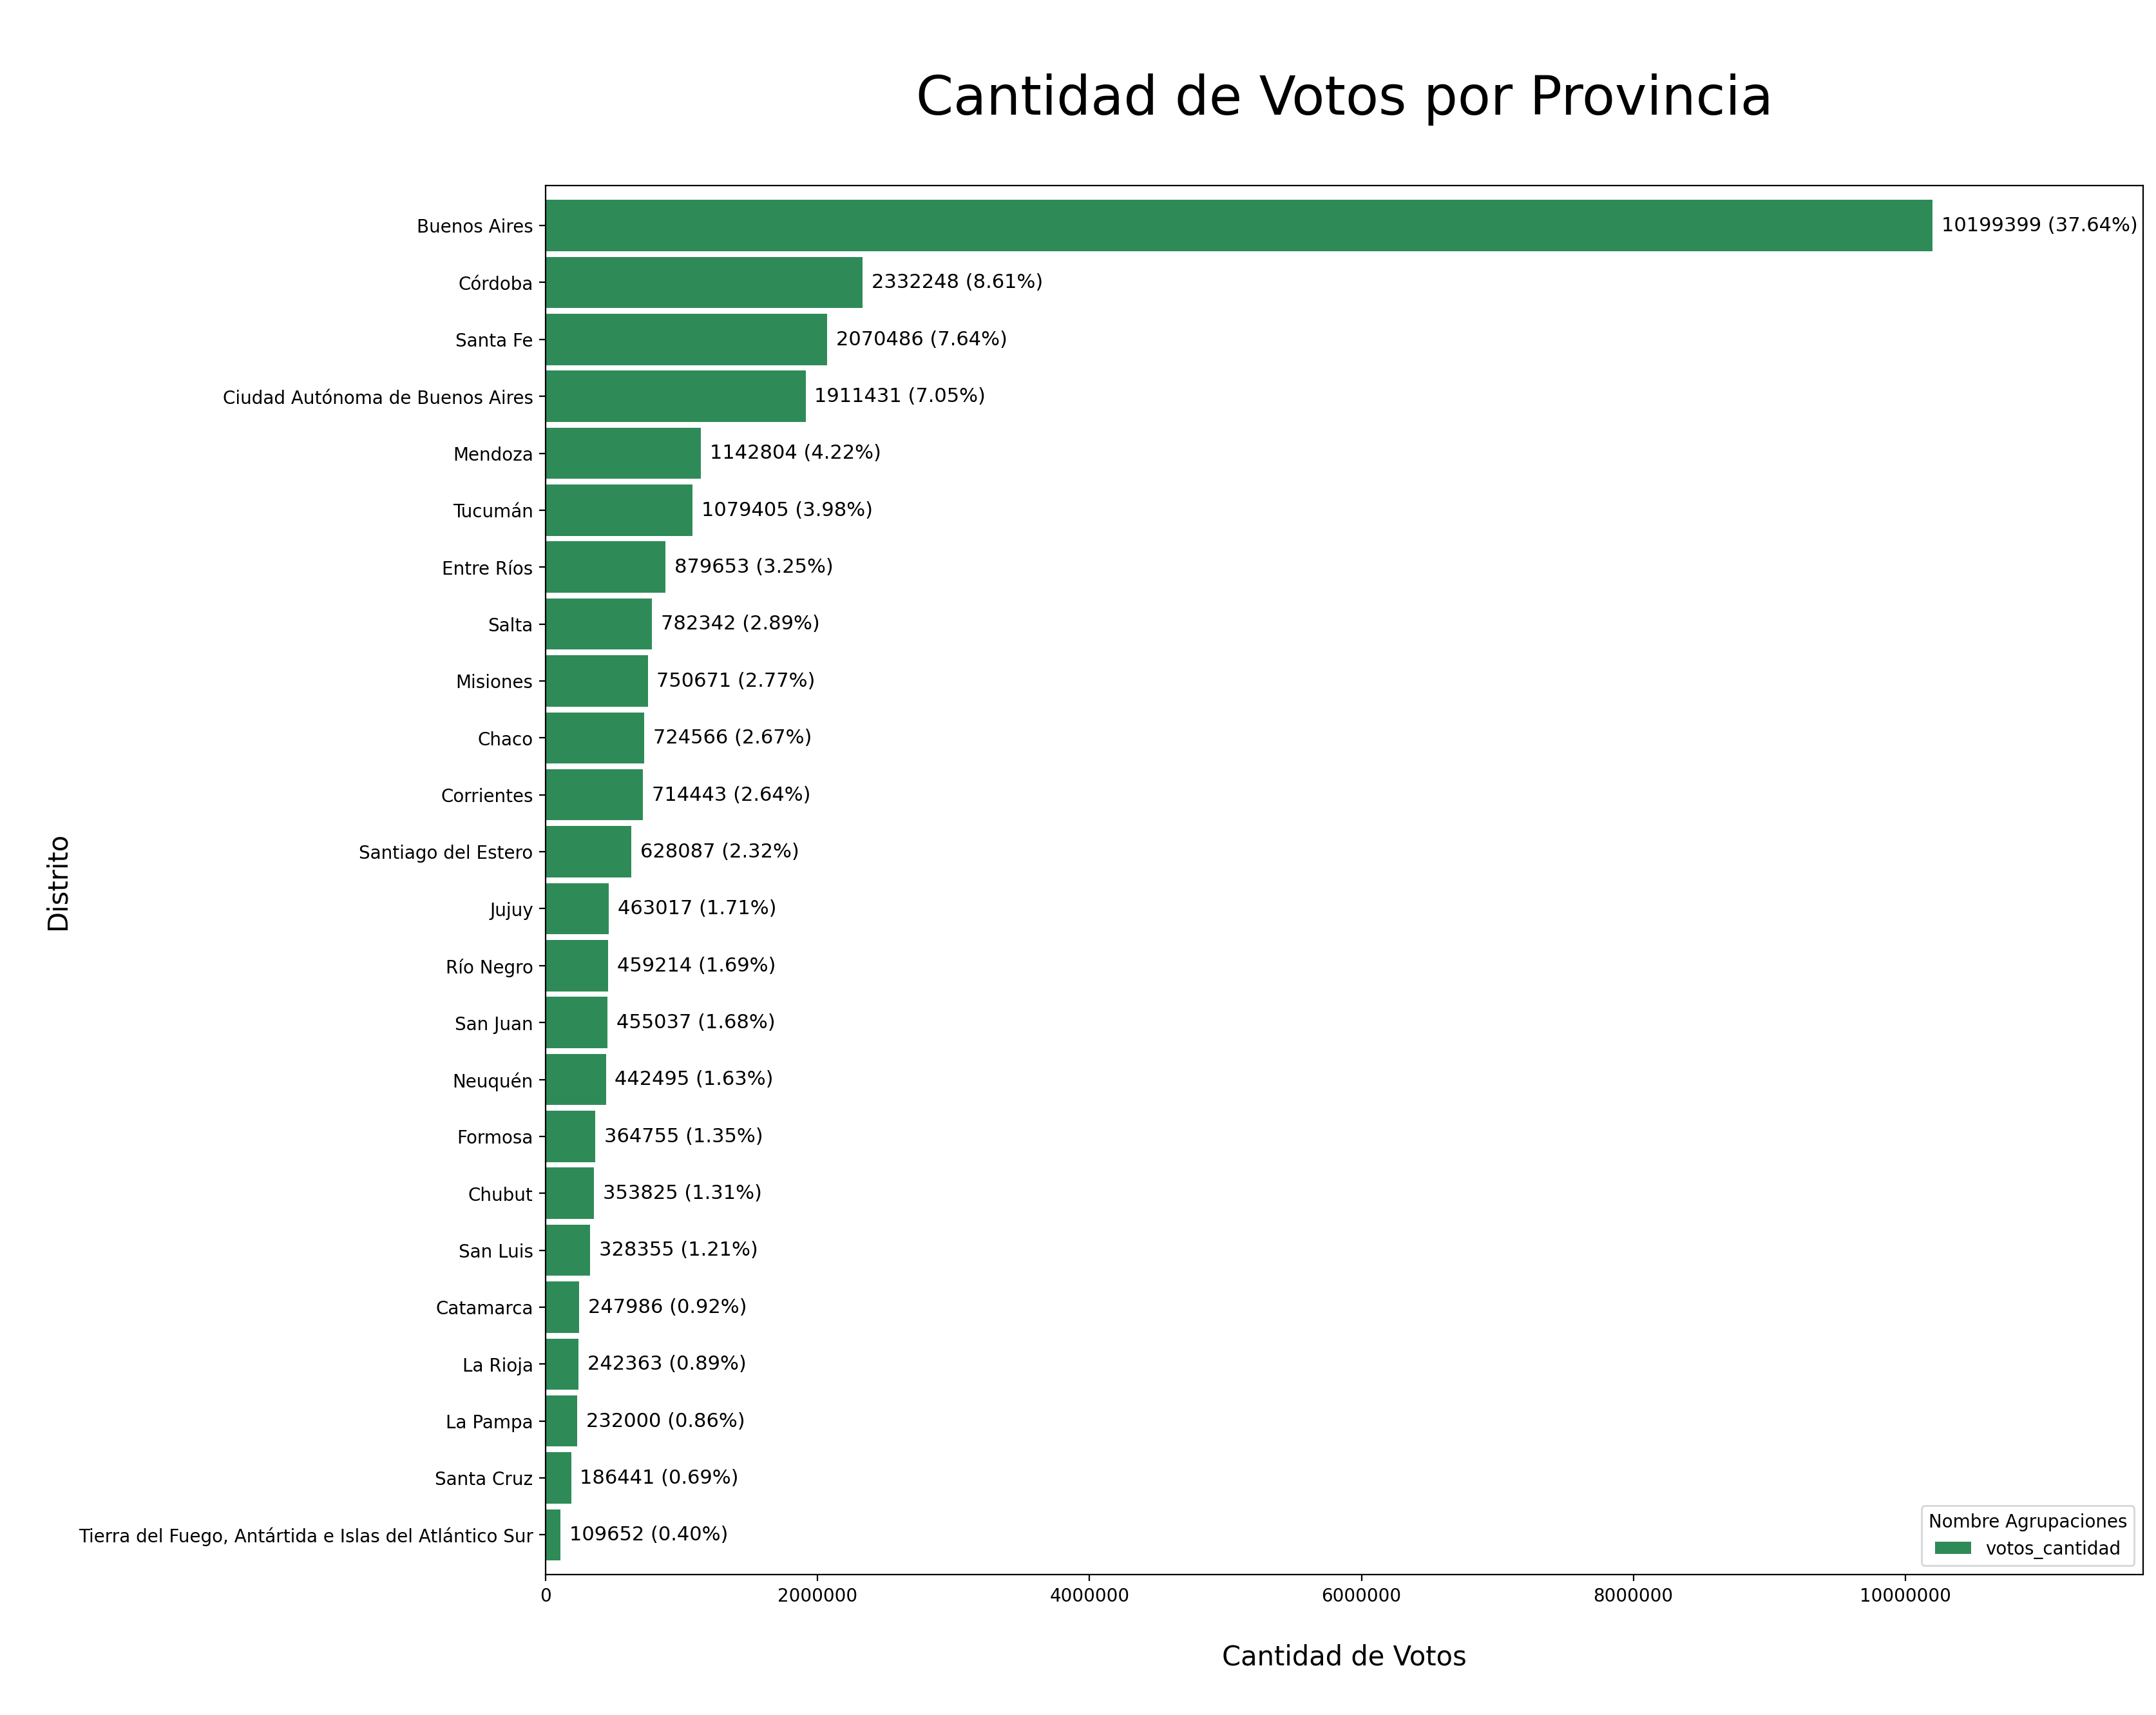

In [25]:
# custom_palette = sns.color_palette(['#C60004', '#16537e', '#FCEE3C','#6A329F','#2986CC',])
# result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
# result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().div(1000000,axis=0).unstack(fill_value=0),3)
result_df_all_states = df1.groupby(['distrito_nombre'])['votos_cantidad'].sum().reset_index().sort_values(['votos_cantidad'],ascending=True).reset_index().set_index(['distrito_nombre'])
result_df_all_states = result_df_all_states.drop(['index'], axis=1)

total_votes = int(result_df_all_states.sum())

# index = total_votes.iloc[:,0].tolist()
# result_df_all_states = result_df_all_states.loc[index]

# result_df_all_states = df1.groupby(['distrito_nombre'])['votos_cantidad'].sum().reset_index().sort_values(['votos_cantidad'],ascending=True)
chart = result_df_all_states.plot(kind='barh', figsize=(16, 14), width=0.9, color='seagreen')
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{val} ({val/total_votes*100:.2f}%)' for val in container.datavalues])
    
# chart.bar_label(chart.containers[0], fontsize=11, padding=5)
plt.title('\nCantidad de Votos por Provincia\n', fontsize=30)
plt.xlabel('\nCantidad de Votos\n', fontsize=15)
plt.ylabel('\nDistrito', fontsize=15)
plt.ticklabel_format(axis="x", style="plain")
chart.get_legend().set_title('Nombre Agrupaciones')
chart.set_xlim(0, 11750000)

plt.savefig('Imagenes/Votos_Por_Provincia.png', bbox_inches='tight')
plt.show()

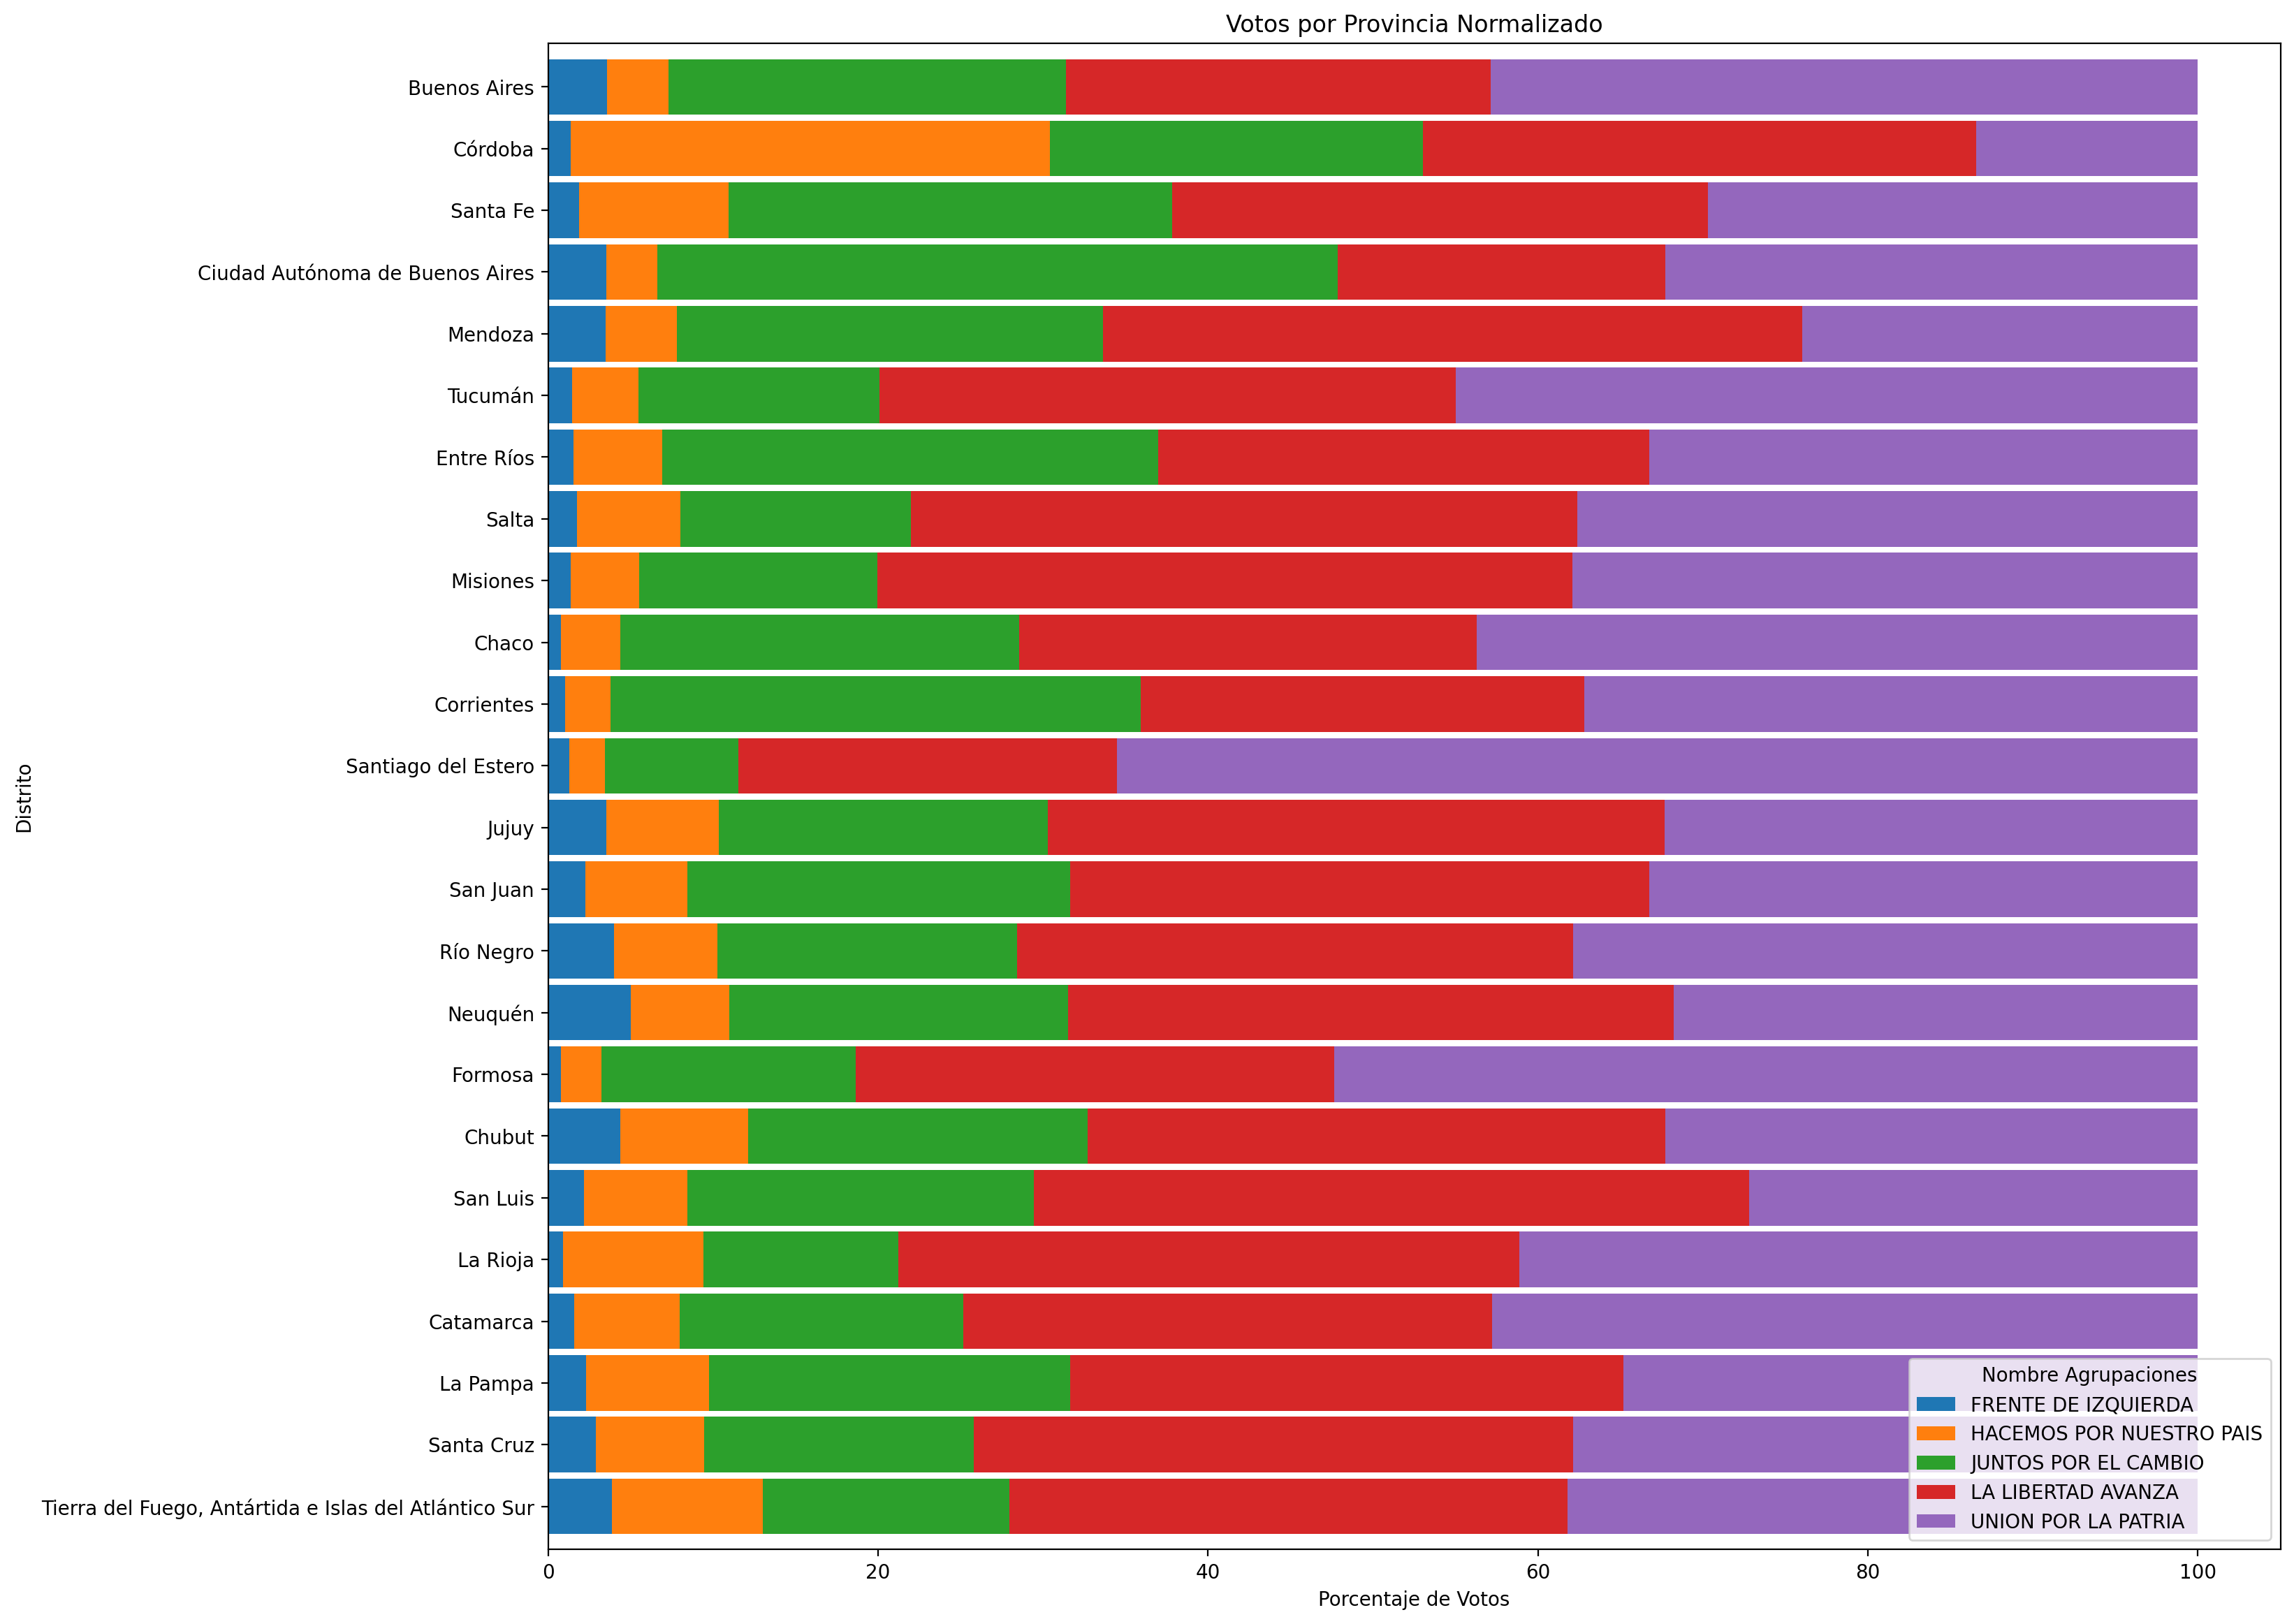

In [18]:
pd.options.display.float_format = '{:.2f}'.format

result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

total_votes = result_df_all_states.sum(axis=1).reset_index().sort_values(0, ascending=True)
index = total_votes.iloc[:,0].tolist()
result_df_all_states = result_df_all_states.loc[index]
result_df_all_states_index = result_df_all_states.reset_index().index.tolist()

for distrito in result_df_all_states_index:
    result_df_all_states.iloc[distrito,:] = round(result_df_all_states.iloc[distrito,:].div(result_df_all_states.iloc[distrito,:].sum(axis=0),axis=0),4)*100

chart = result_df_all_states.plot(kind='barh', stacked=True, figsize=(16, 14), width=0.9)

chart.set_title('Votos por Provincia Normalizado')
chart.set_xlabel('Porcentaje de Votos')
chart.set_ylabel('Distrito')
chart.get_legend().set_title('Nombre Agrupaciones')

plt.savefig('Imagenes/Votos_Por_Provincia_Normalizado.png', bbox_inches='tight')
plt.show()

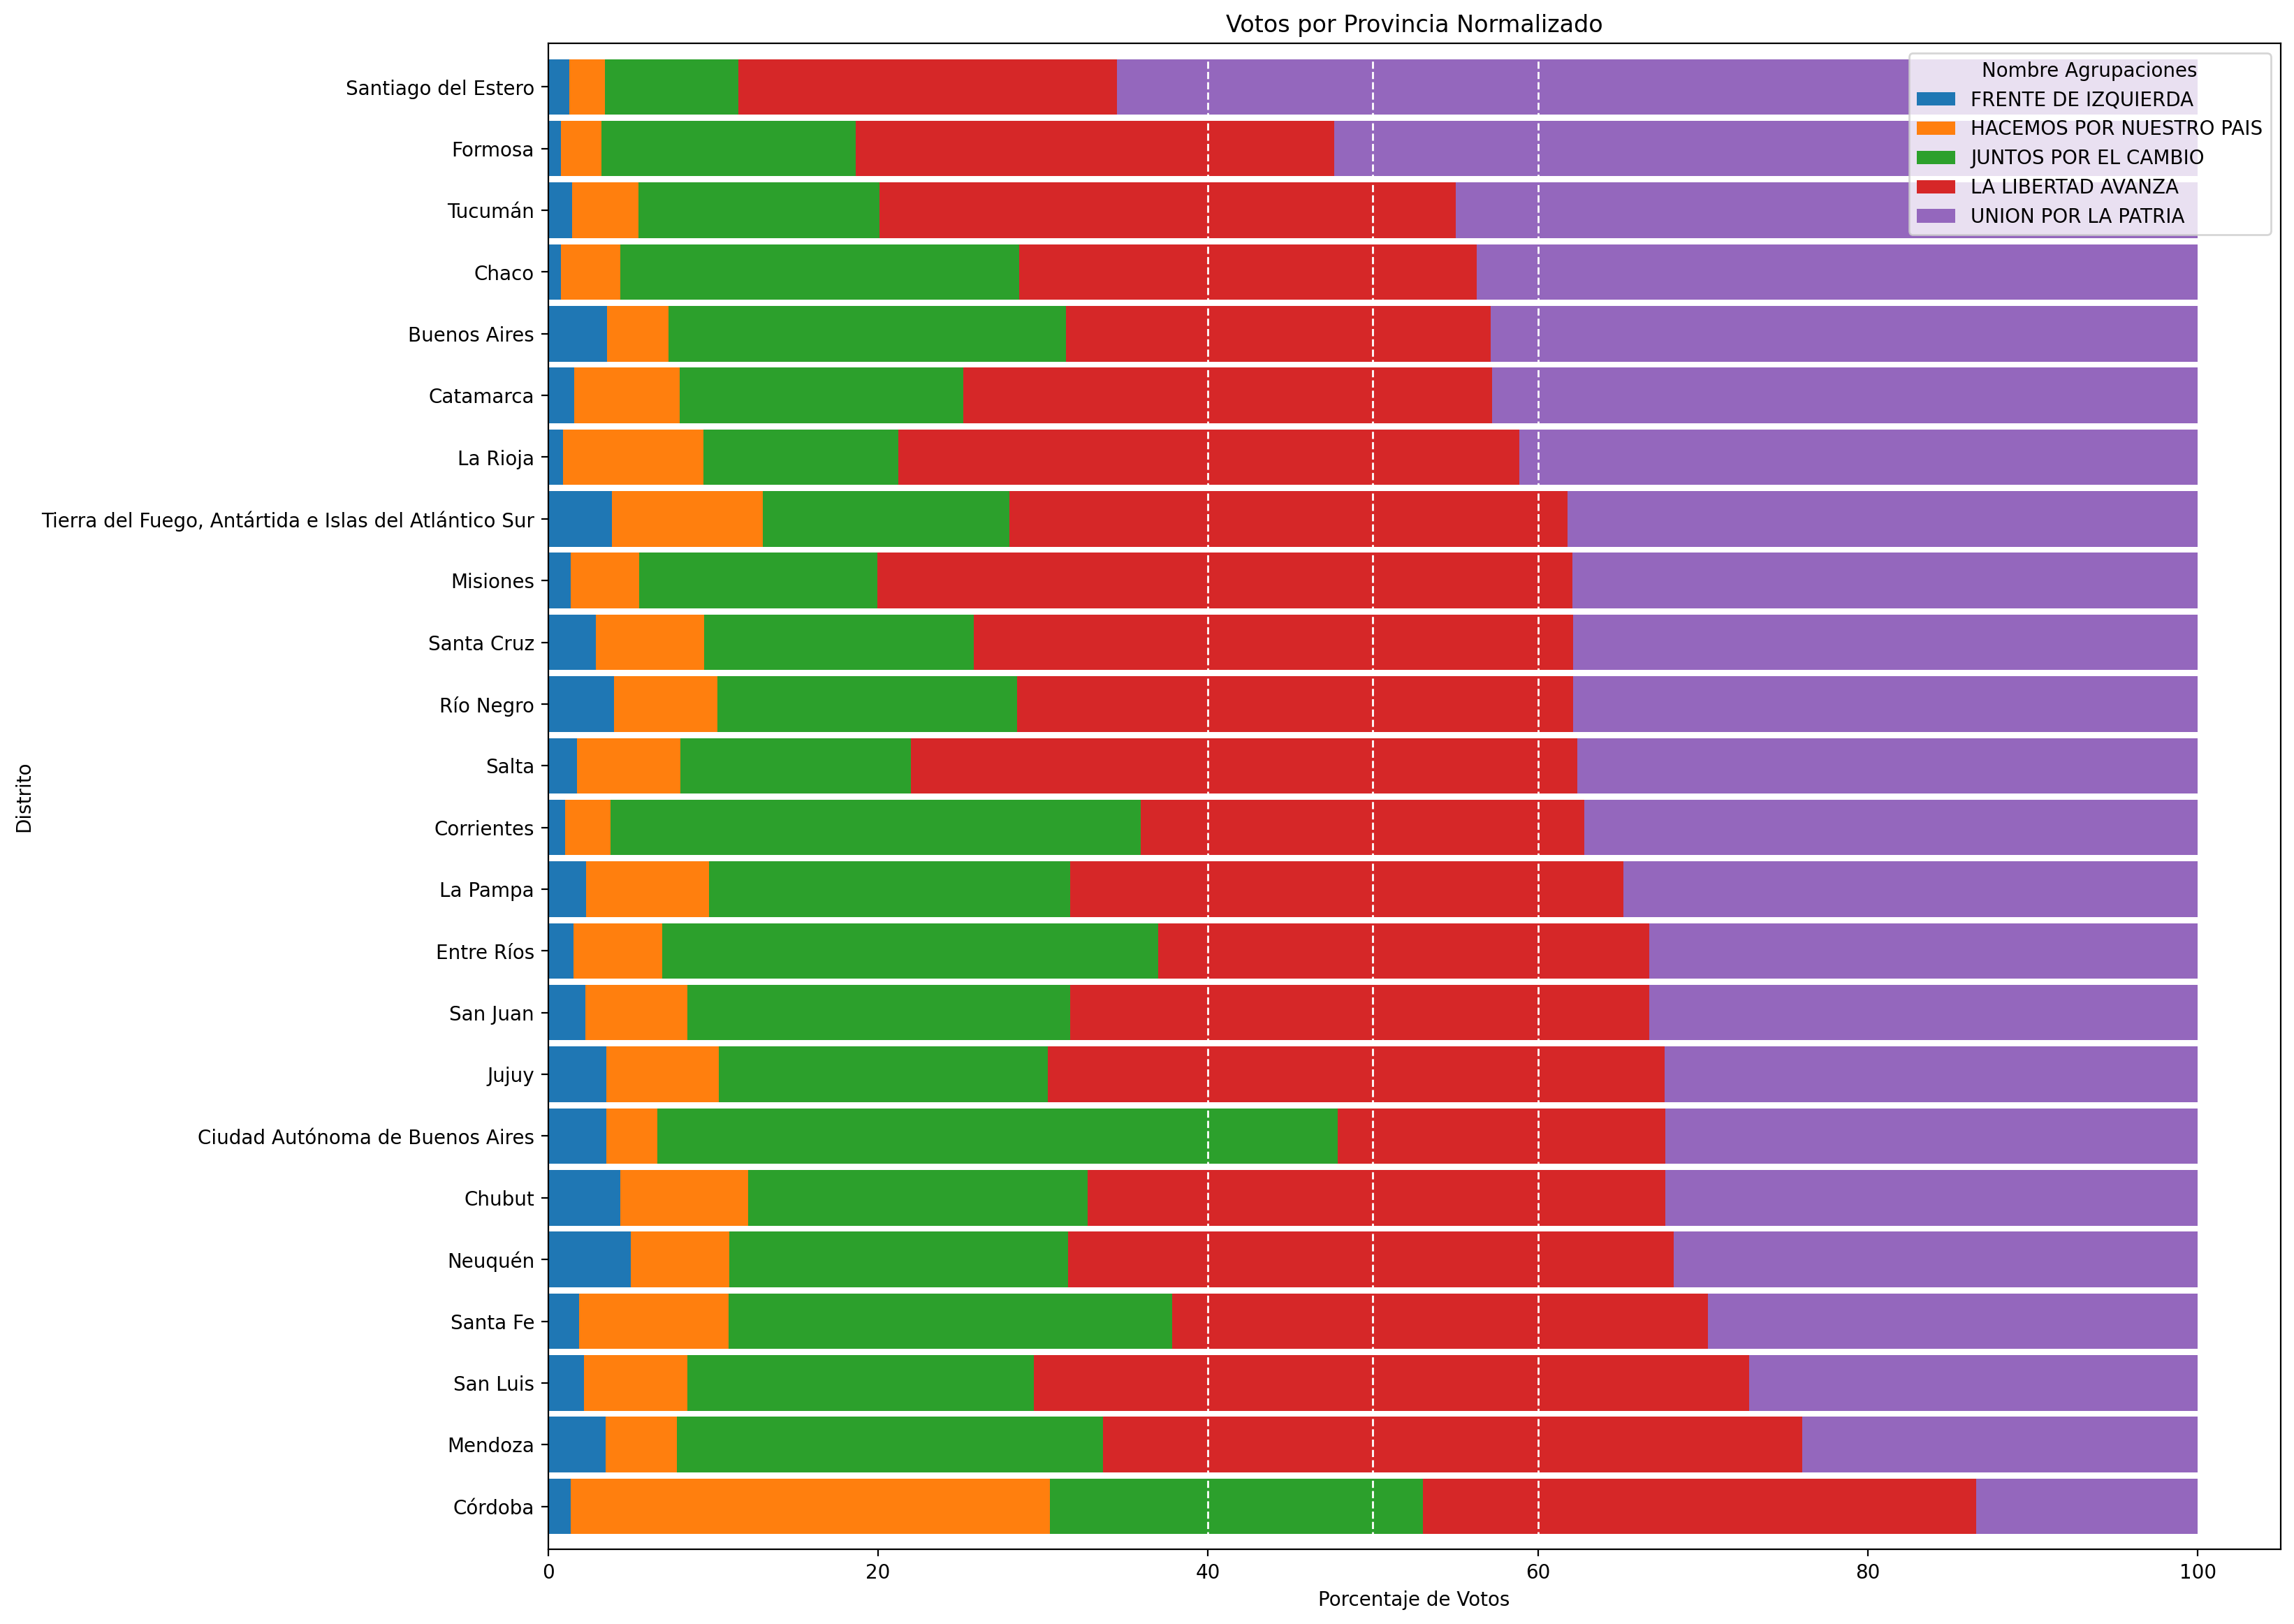

In [19]:
result_df_all_states_massa = result_df_all_states.sort_values('UNION POR LA PATRIA',ascending=True)
chart = result_df_all_states_massa.plot(kind='barh', stacked=True, figsize=(16, 14), width=0.9)

for i in [40,50,60]:
    plt.axvline(x=i, color='white', linestyle='--', linewidth=1)

chart.set_title('Votos por Provincia Normalizado')
chart.set_xlabel('Porcentaje de Votos')
chart.set_ylabel('Distrito')
chart.get_legend().set_title('Nombre Agrupaciones')


plt.savefig('Imagenes/Votos_Por_Provincia_Normalizado_Ordenado.png', bbox_inches='tight')
plt.show()

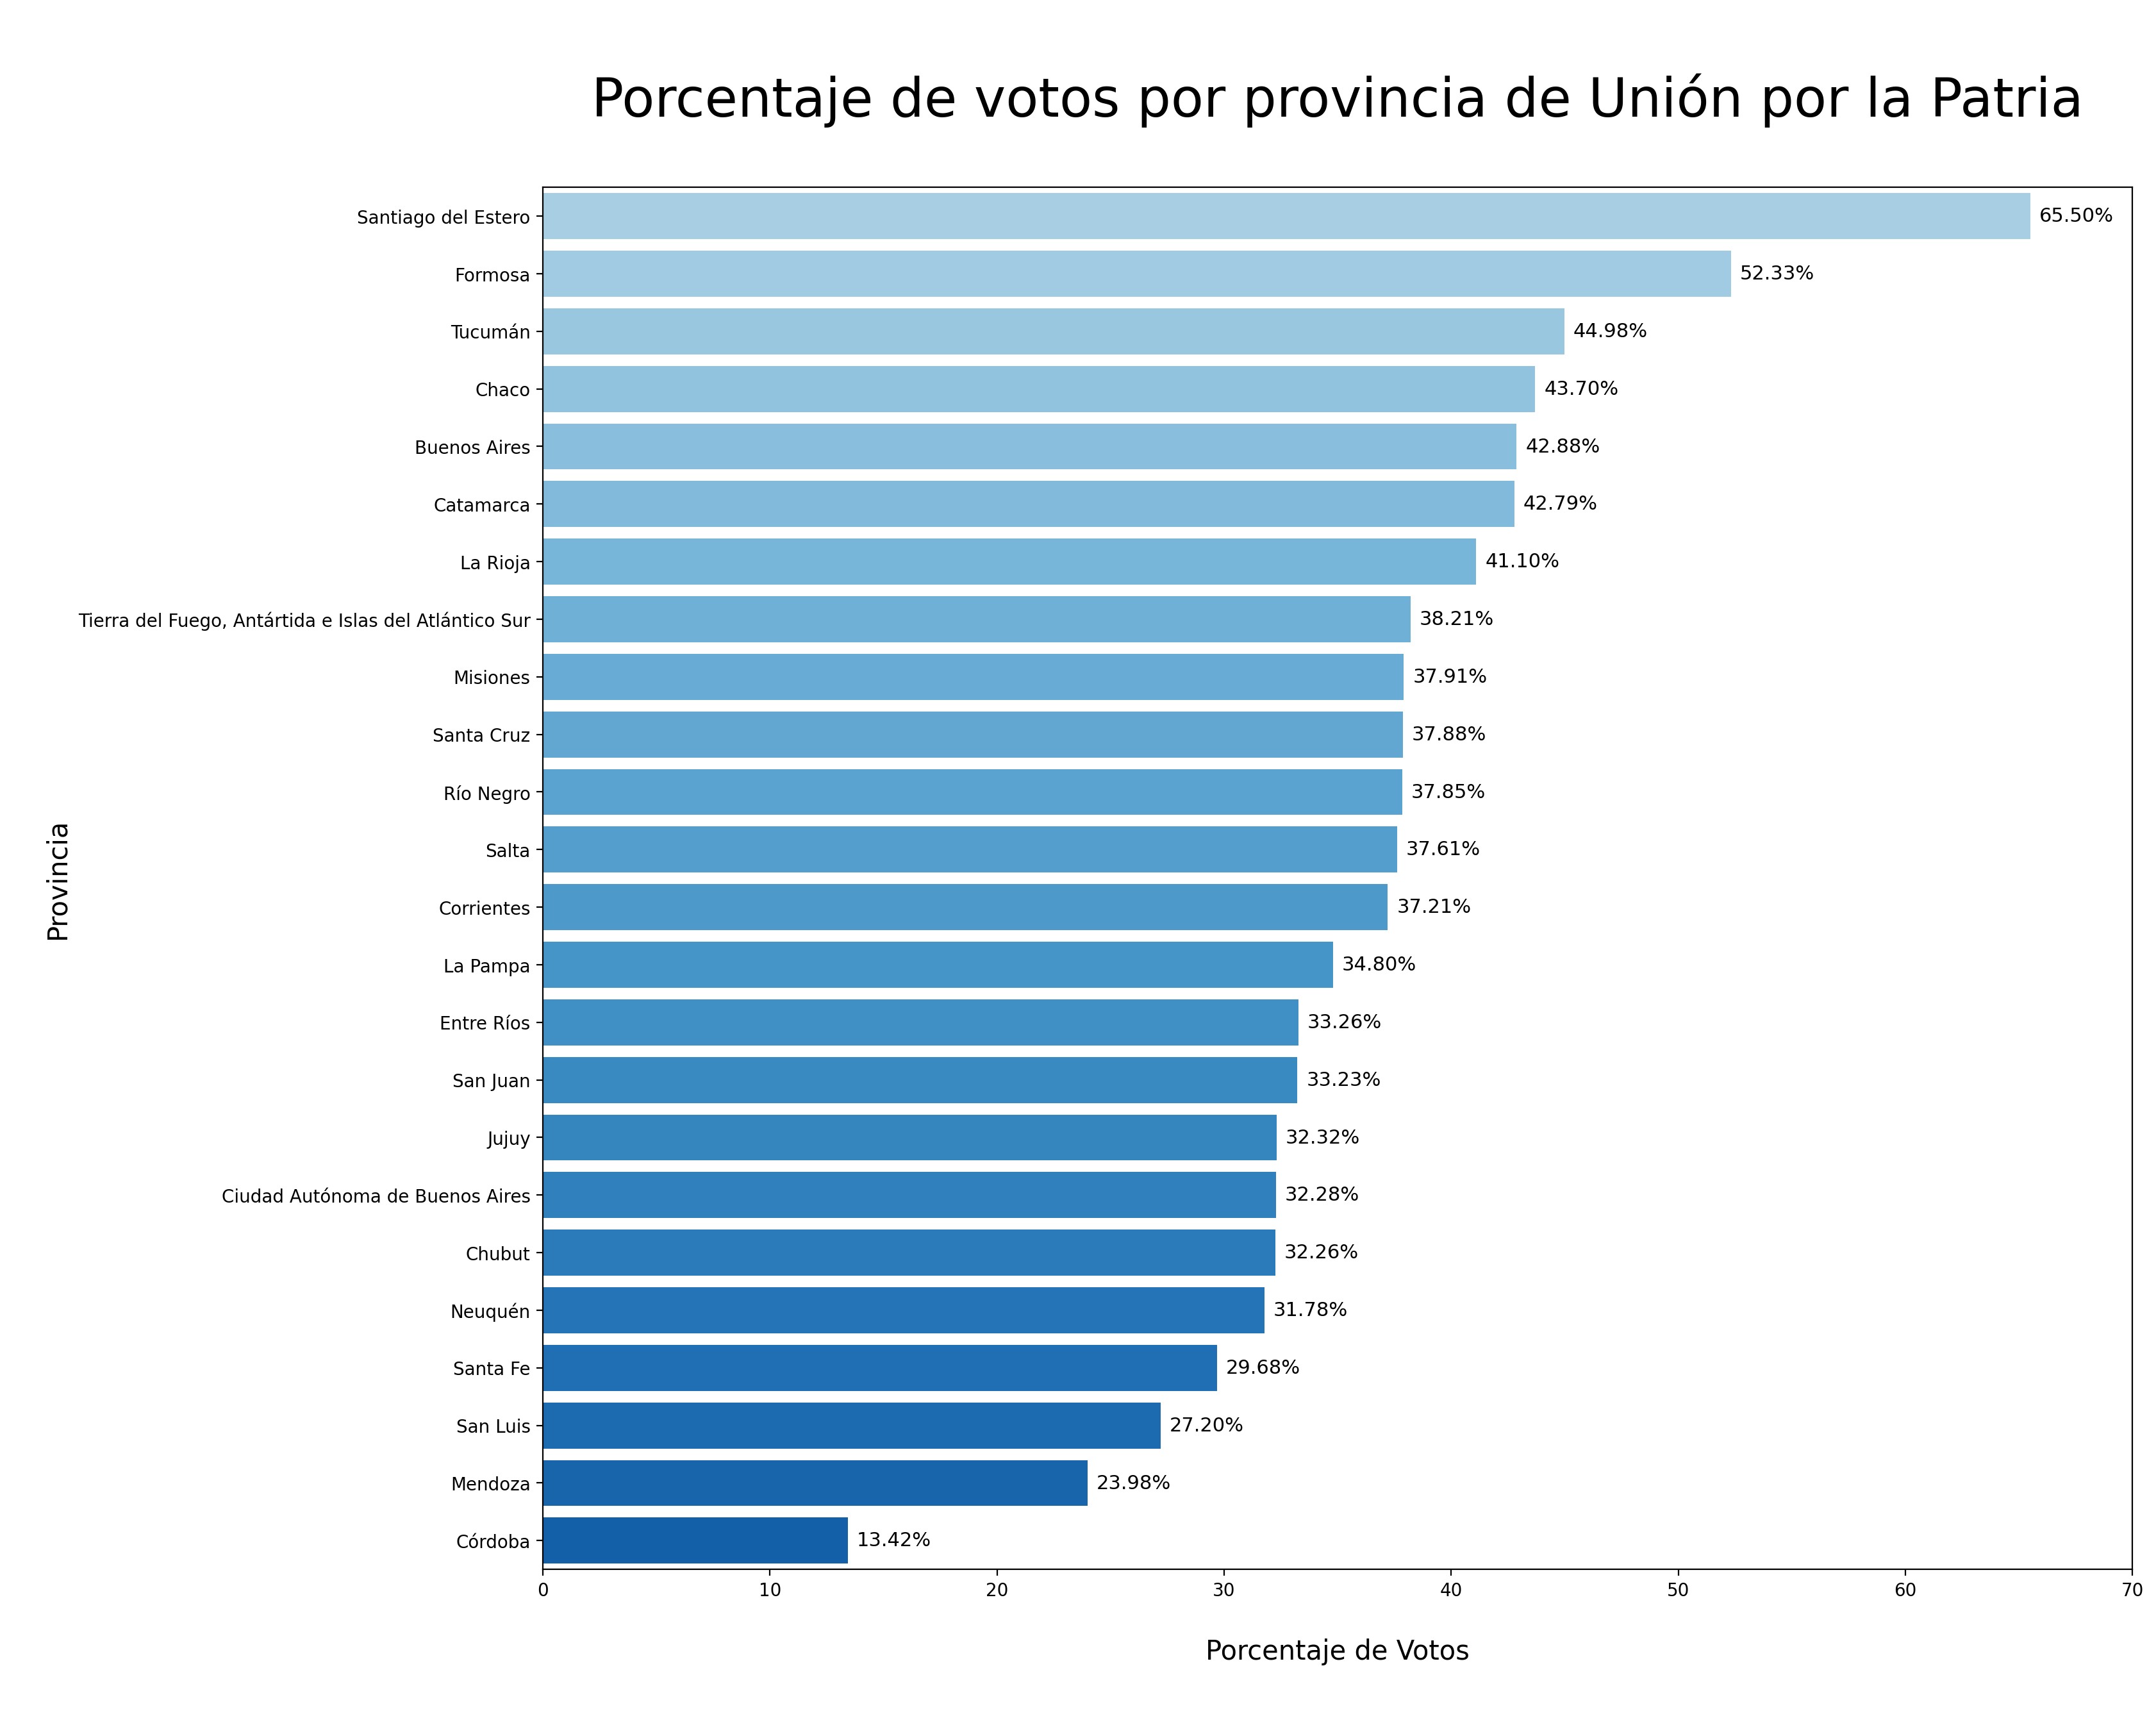

In [173]:
pd.options.display.float_format = '{:.2f}'.format

result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

total_votes = result_df_all_states.sum(axis=1).reset_index().sort_values(0, ascending=True)
index = total_votes.iloc[:,0].tolist()
result_df_all_states = result_df_all_states.loc[index]
result_df_all_states_index = result_df_all_states.reset_index().index.tolist()
for distrito in result_df_all_states_index:
    result_df_all_states.iloc[distrito,:] = round(result_df_all_states.iloc[distrito,:].div(result_df_all_states.iloc[distrito,:].sum(axis=0),axis=0),4)*100
result_df_all_states = result_df_all_states['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
index_upp = result_df_all_states.index.tolist()
result_df_all_states = result_df_all_states.T

custom_palette = colores_upp(result_df_all_states)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de Unión por la Patria\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 70)

plt.savefig('Imagenes/Porcentajes_Provincia_UPP.png', bbox_inches='tight')
plt.show()

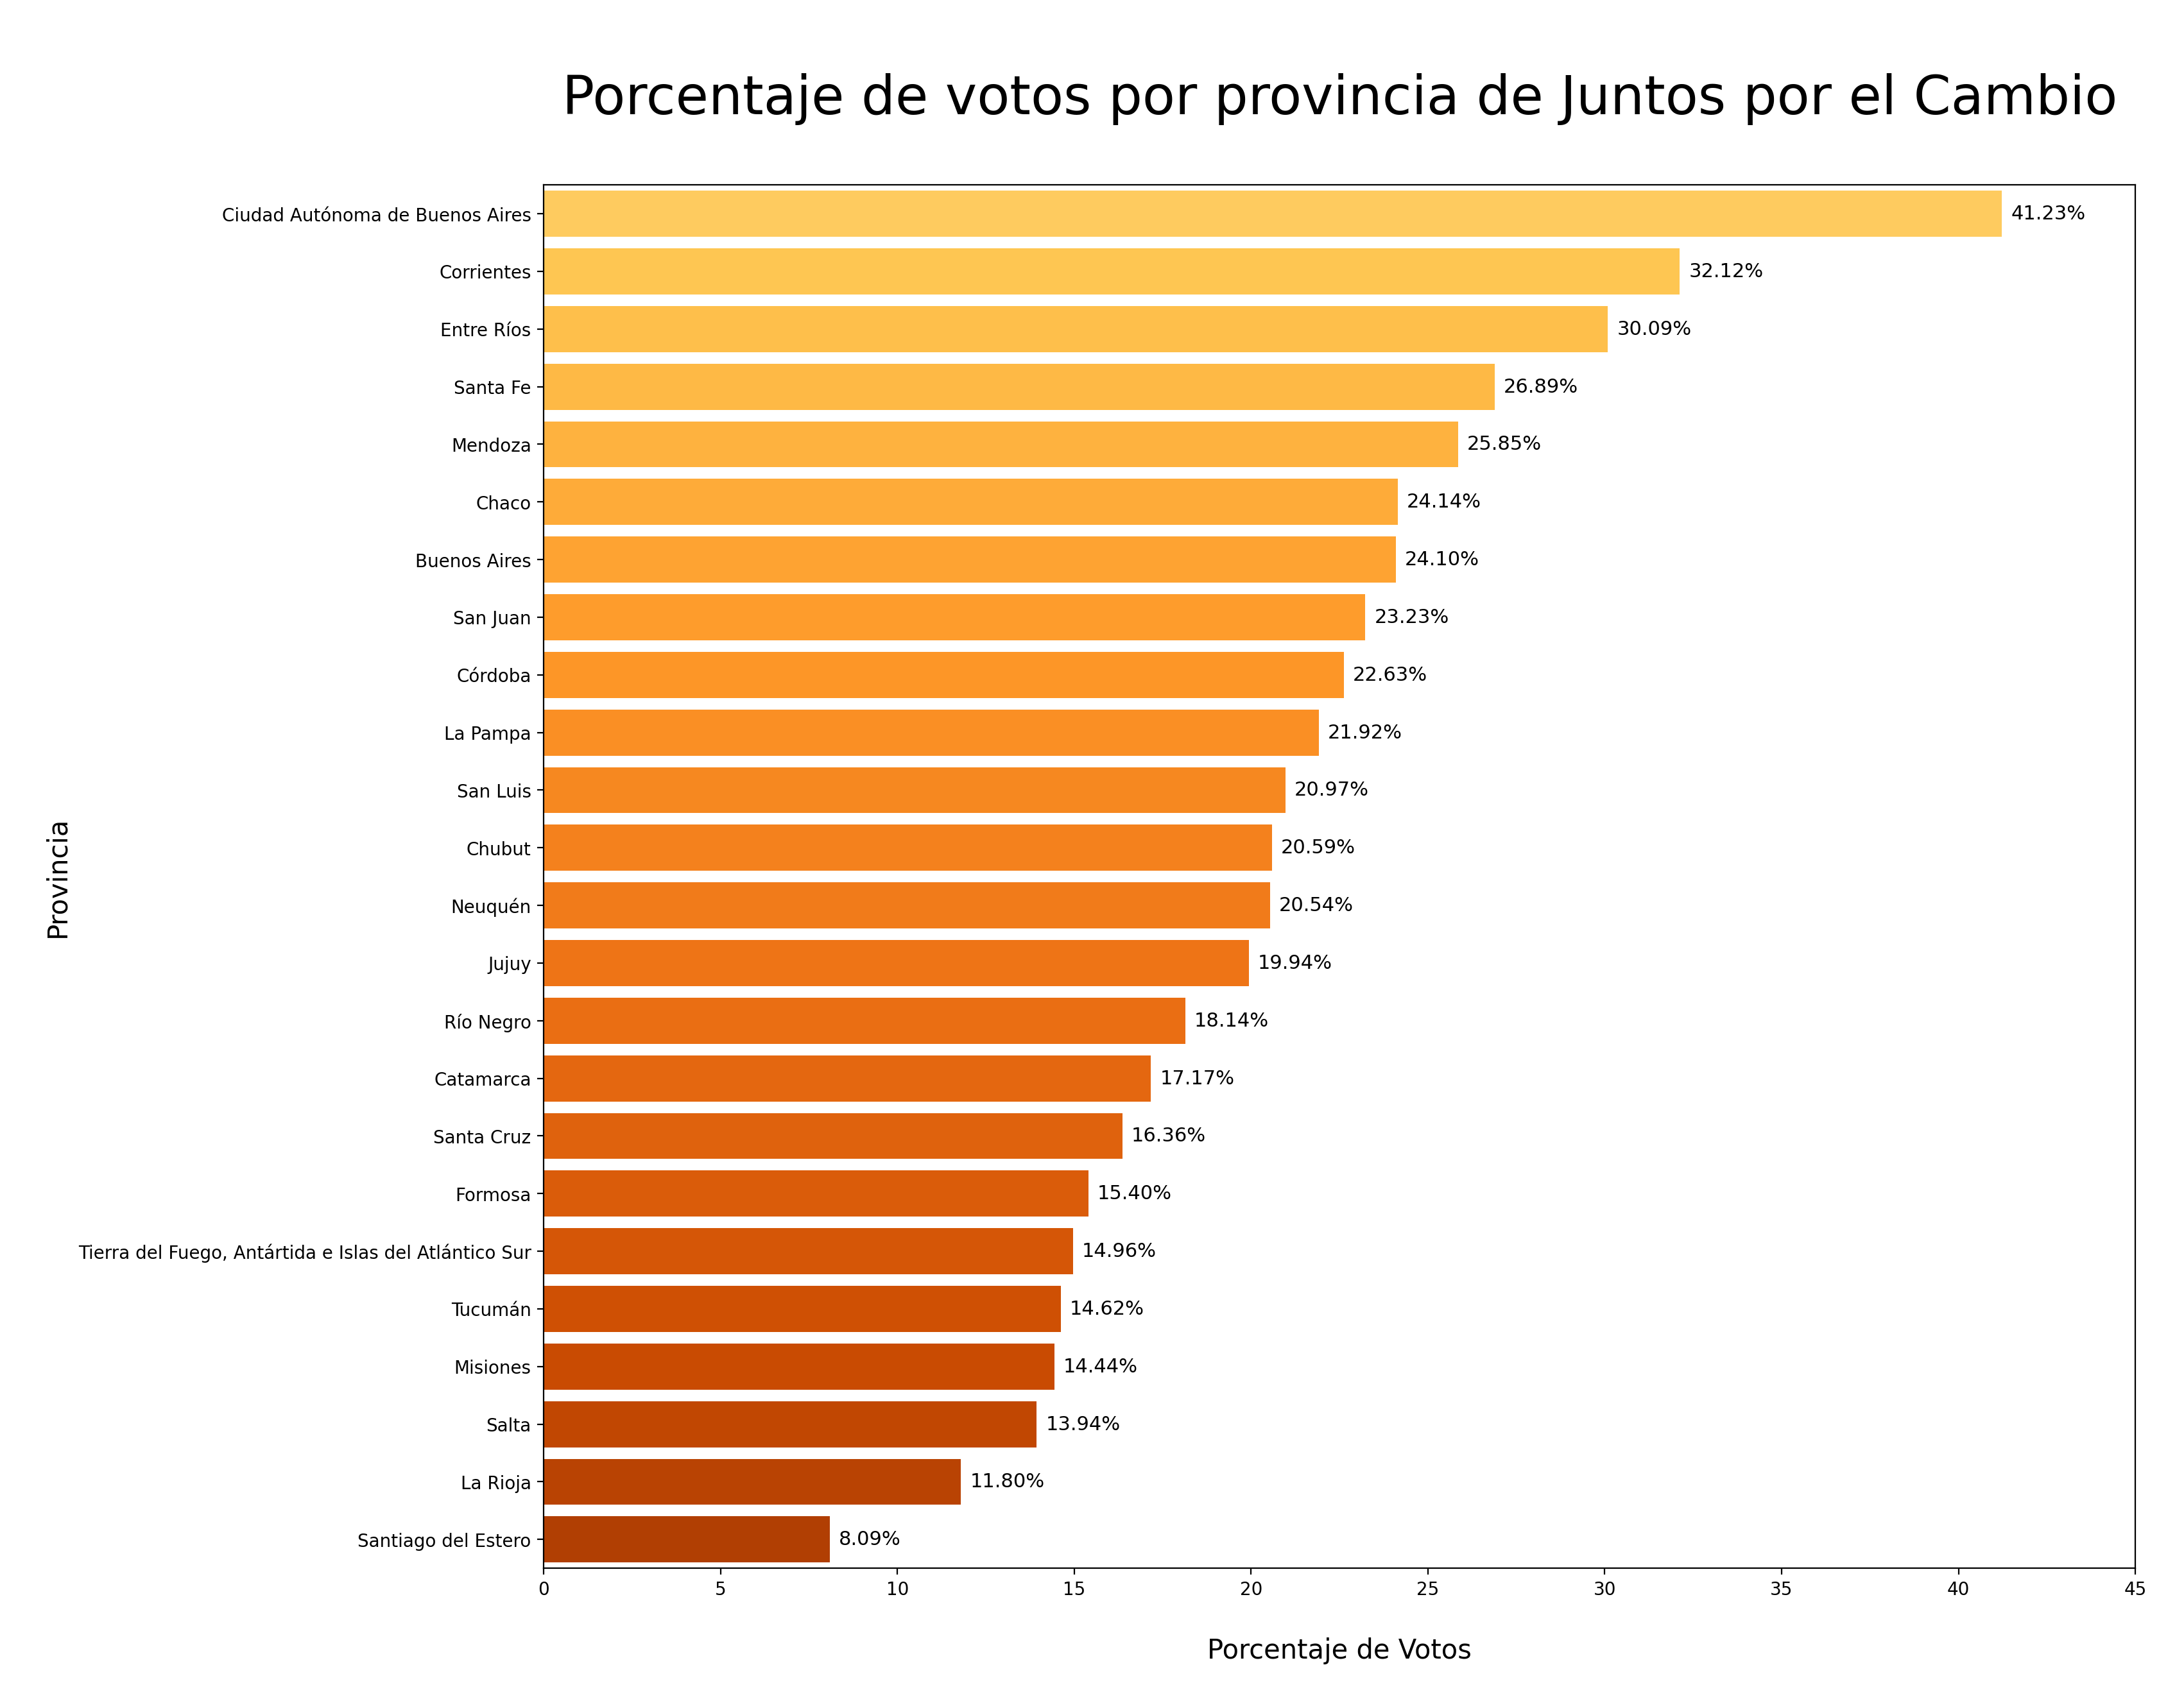

In [69]:
pd.options.display.float_format = '{:.2f}'.format

result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

total_votes = result_df_all_states.sum(axis=1).reset_index().sort_values(0, ascending=True)
index = total_votes.iloc[:,0].tolist()
result_df_all_states = result_df_all_states.loc[index]
result_df_all_states_index = result_df_all_states.reset_index().index.tolist()
for distrito in result_df_all_states_index:
    result_df_all_states.iloc[distrito,:] = round(result_df_all_states.iloc[distrito,:].div(result_df_all_states.iloc[distrito,:].sum(axis=0),axis=0),4)*100
result_df_all_states = result_df_all_states['JUNTOS POR EL CAMBIO'].reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
index_jxc = result_df_all_states.index.tolist()
result_df_all_states = result_df_all_states.T

colors = sns.color_palette("YlOrBr", n_colors=2*len(result_df_all_states.columns))
start_index = len(result_df_all_states.columns)//2 + 4
custom_palette = colors[start_index:]

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de Juntos por el Cambio\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 45)

plt.savefig('Imagenes/Porcentajes_Provincia_JXC.png', bbox_inches='tight')
plt.show()

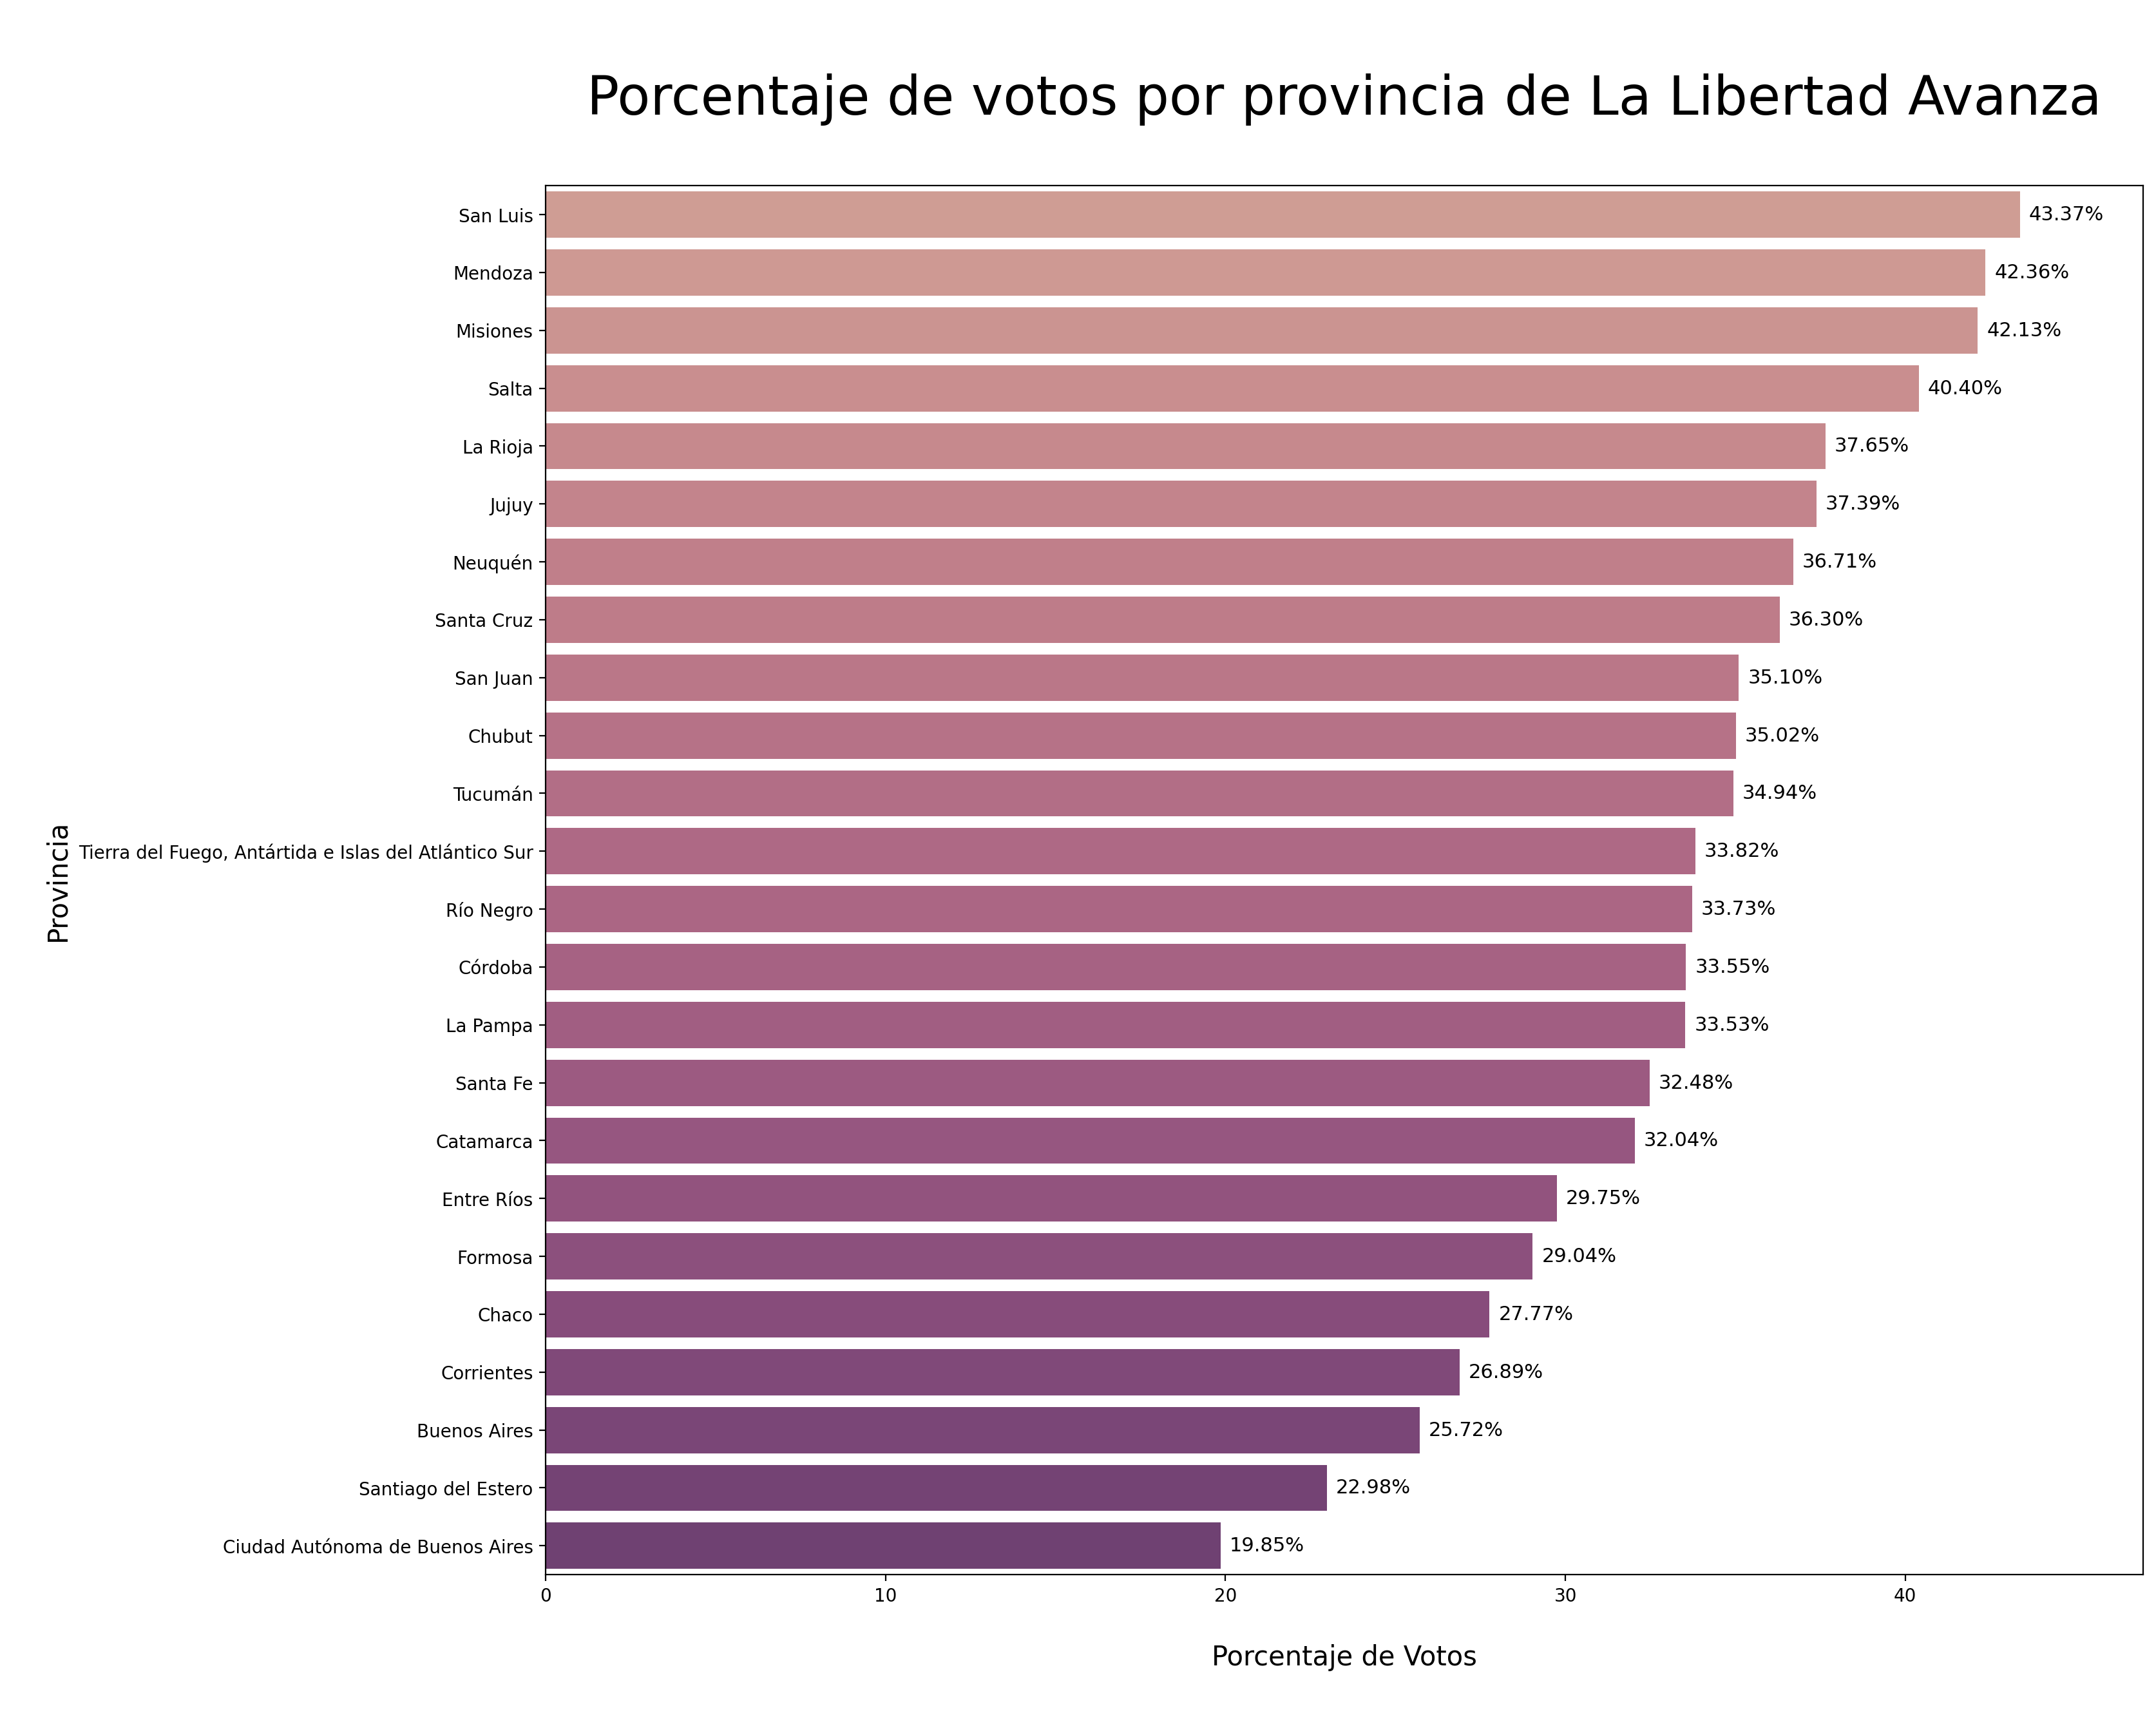

In [5]:
pd.options.display.float_format = '{:.2f}'.format

result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

total_votes = result_df_all_states.sum(axis=1).reset_index().sort_values(0, ascending=True)
index = total_votes.iloc[:,0].tolist()
result_df_all_states = result_df_all_states.loc[index]
result_df_all_states_index = result_df_all_states.reset_index().index.tolist()
for distrito in result_df_all_states_index:
    result_df_all_states.iloc[distrito,:] = round(result_df_all_states.iloc[distrito,:].div(result_df_all_states.iloc[distrito,:].sum(axis=0),axis=0),4)*100
result_df_all_states = result_df_all_states['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
index = result_df_all_states.index.tolist()
result_df_all_states = result_df_all_states.T

colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(result_df_all_states.columns))
start_index = len(result_df_all_states.columns)//2
custom_palette = colors[start_index:]

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de La Libertad Avanza\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 47)

plt.savefig('Imagenes/Porcentajes_Provincia_LLA.png', bbox_inches='tight')
plt.show()

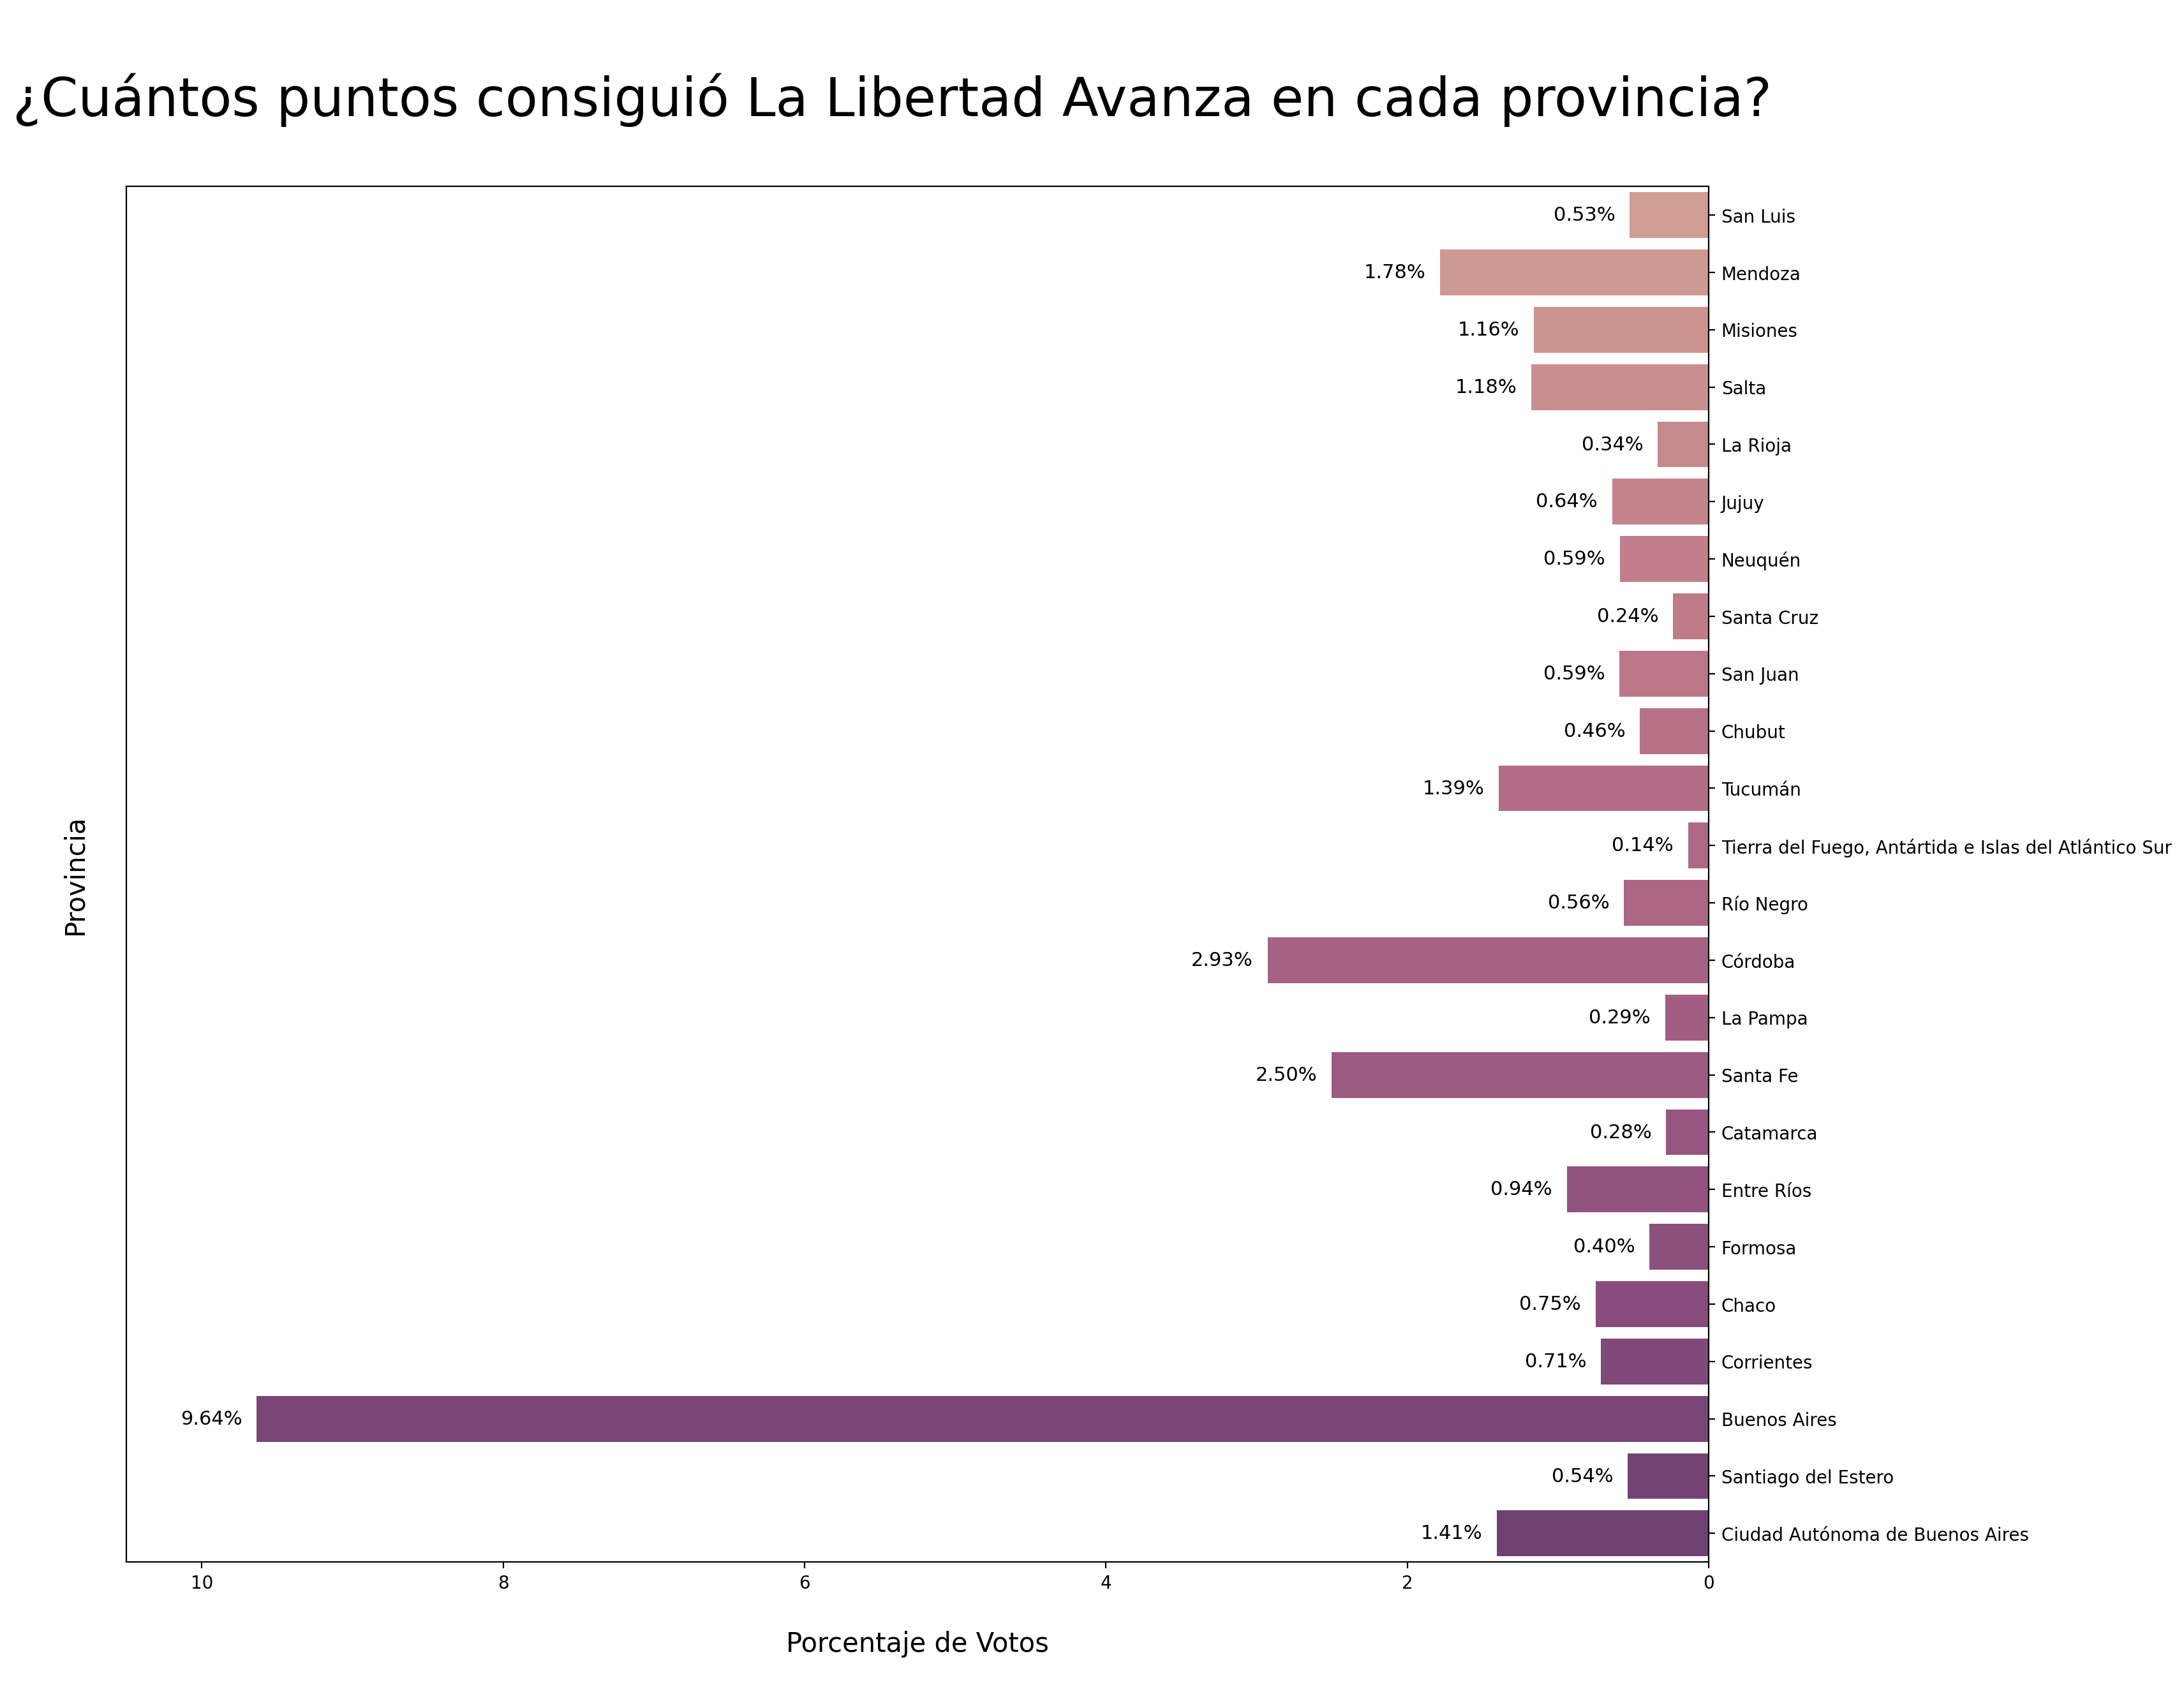

In [12]:
# INDEX SPECIFIED IN PREVIOUS CELL
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['LA LIBERTAD AVANZA']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre')#.sort_values('LA LIBERTAD AVANZA',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)
result_df_all_states_milei = result_df_all_states_milei.loc[index]
result_df_all_states_milei2 = result_df_all_states_milei.T#.reset_index()

custom_palette = colores_lla(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1, order=index)
chart.set_xlim(0,10.5)
chart.invert_xaxis()

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=-43, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió La Libertad Avanza en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
chart.yaxis.tick_right()

plt.savefig('Imagenes/Porcentajes_Provincia_LLA_Fragmentado.png', bbox_inches='tight')
plt.show()

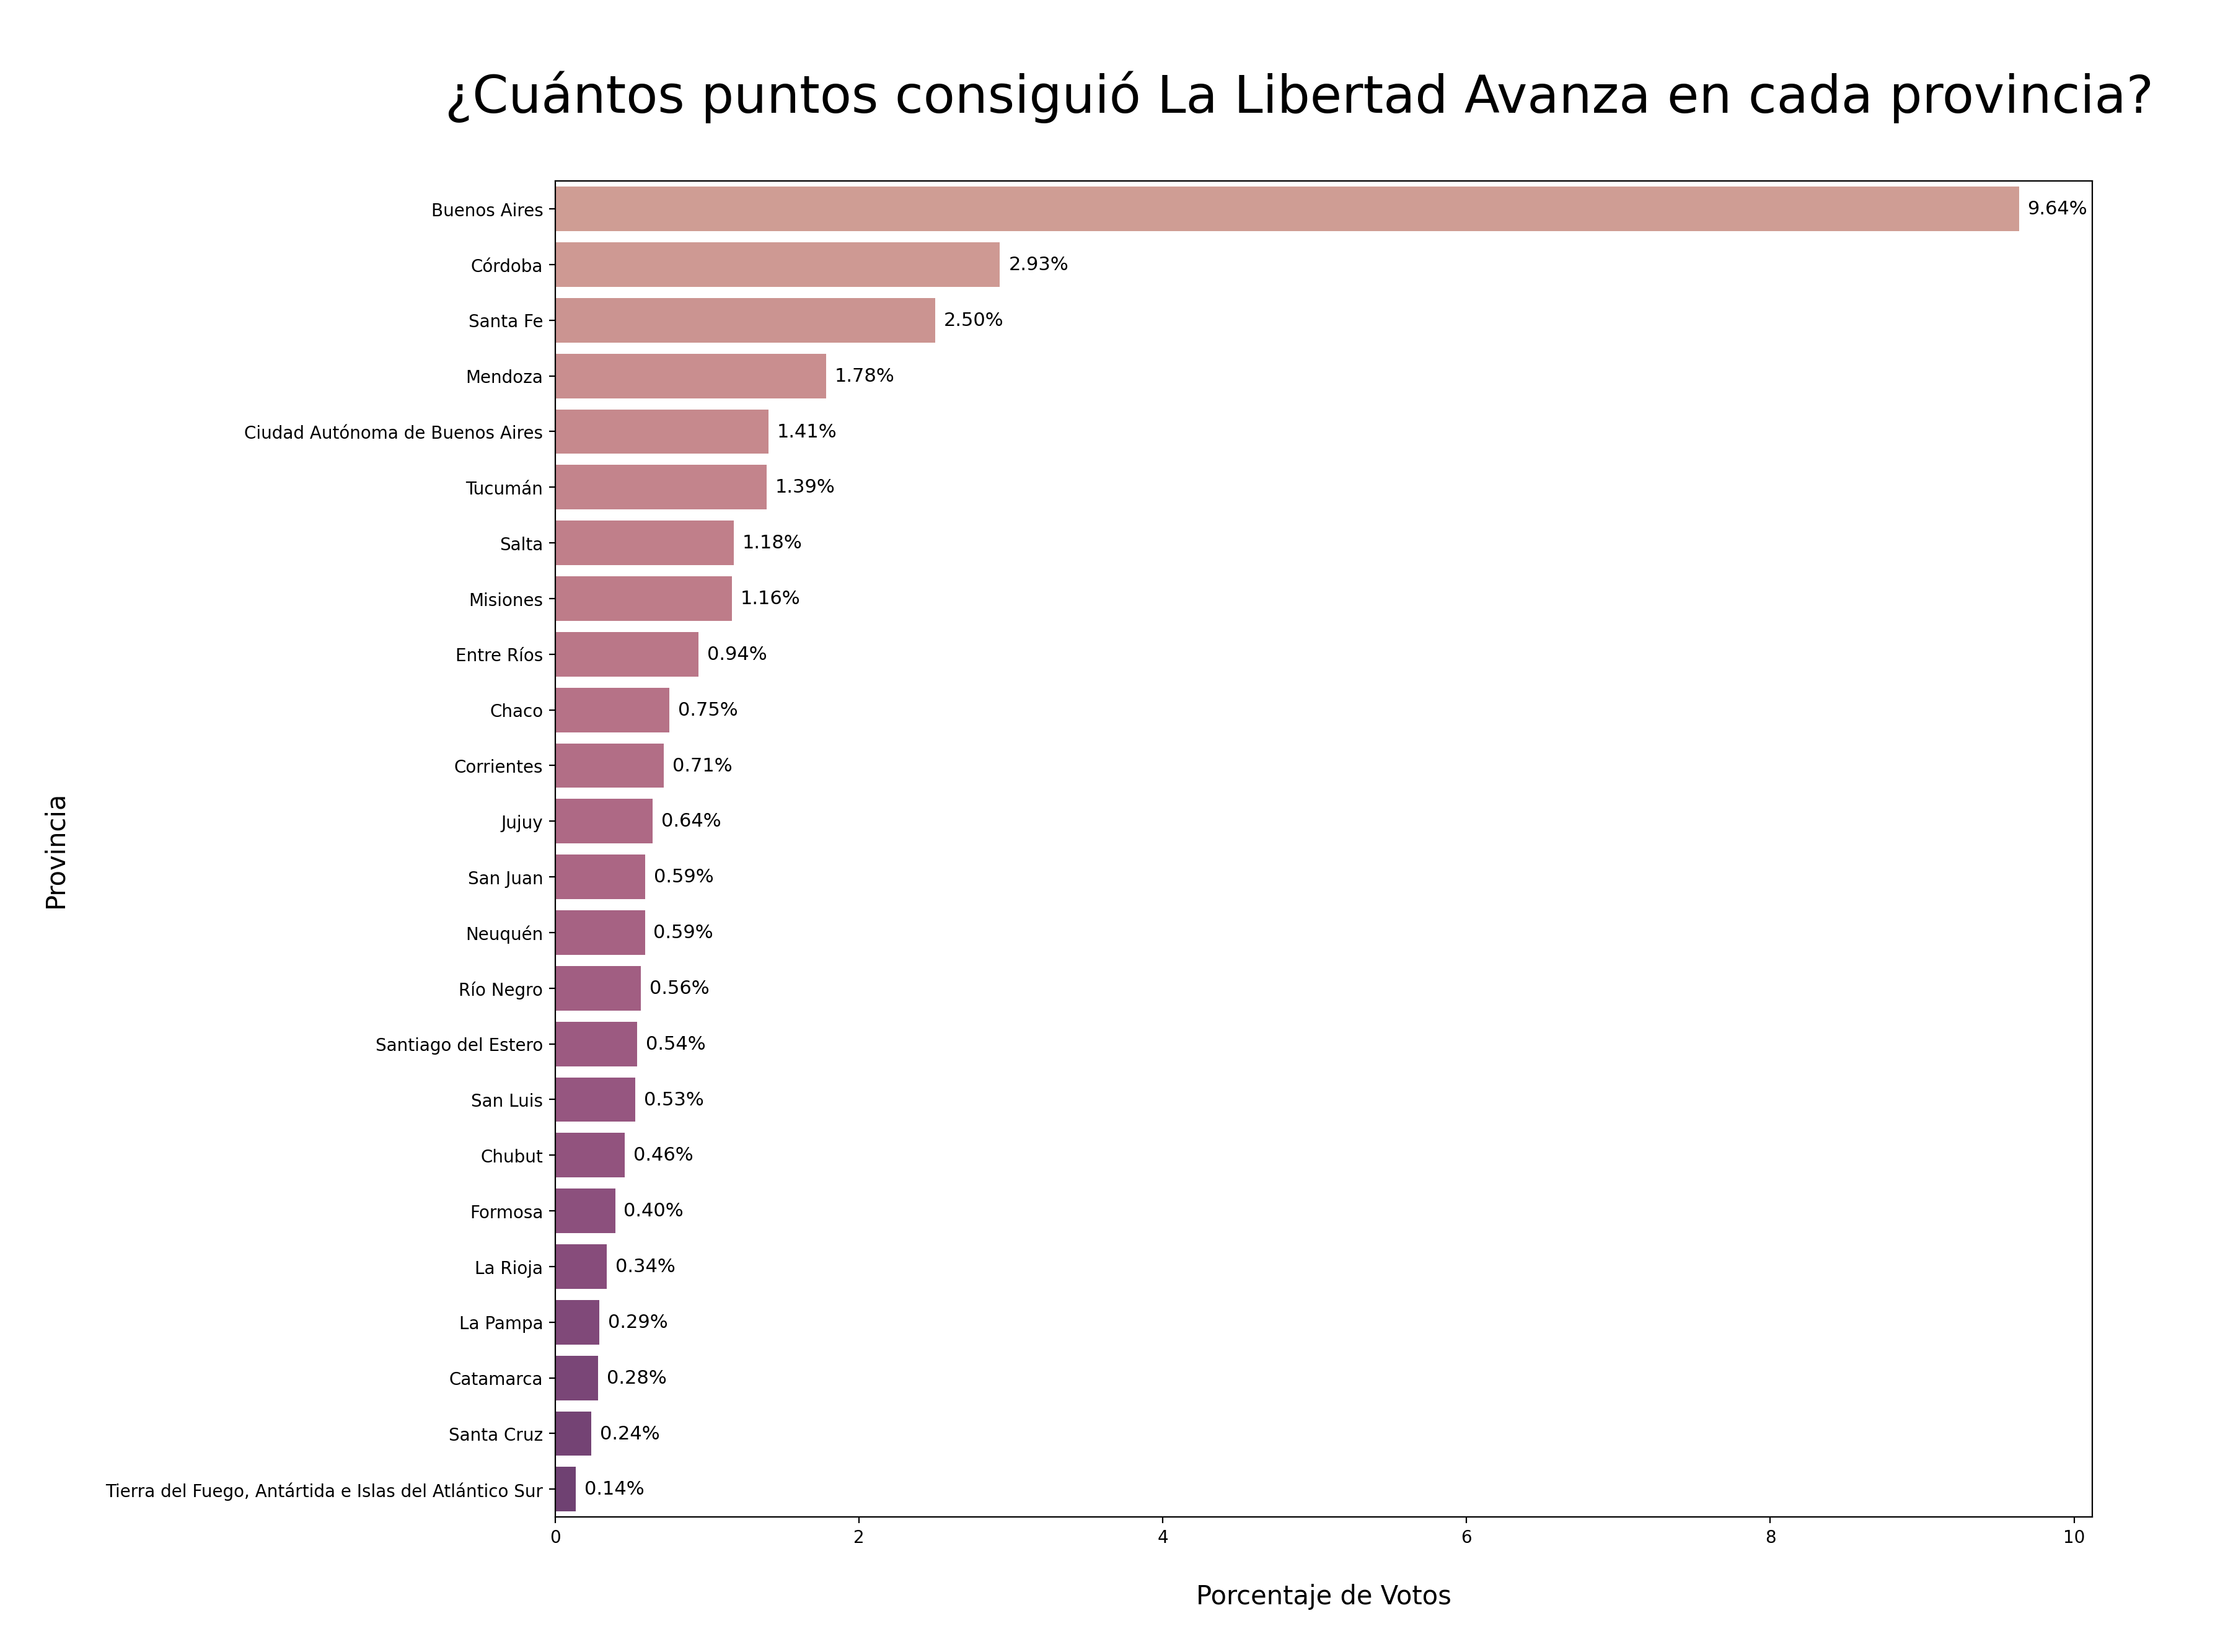

In [8]:
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['LA LIBERTAD AVANZA']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)



result_df_all_states_milei2 = result_df_all_states_milei.T

custom_palette = colores_lla(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió La Libertad Avanza en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)


plt.savefig('Imagenes/Porcentajes_Provincia_LLA_Fragmentado_Orden.png', bbox_inches='tight')
plt.show()

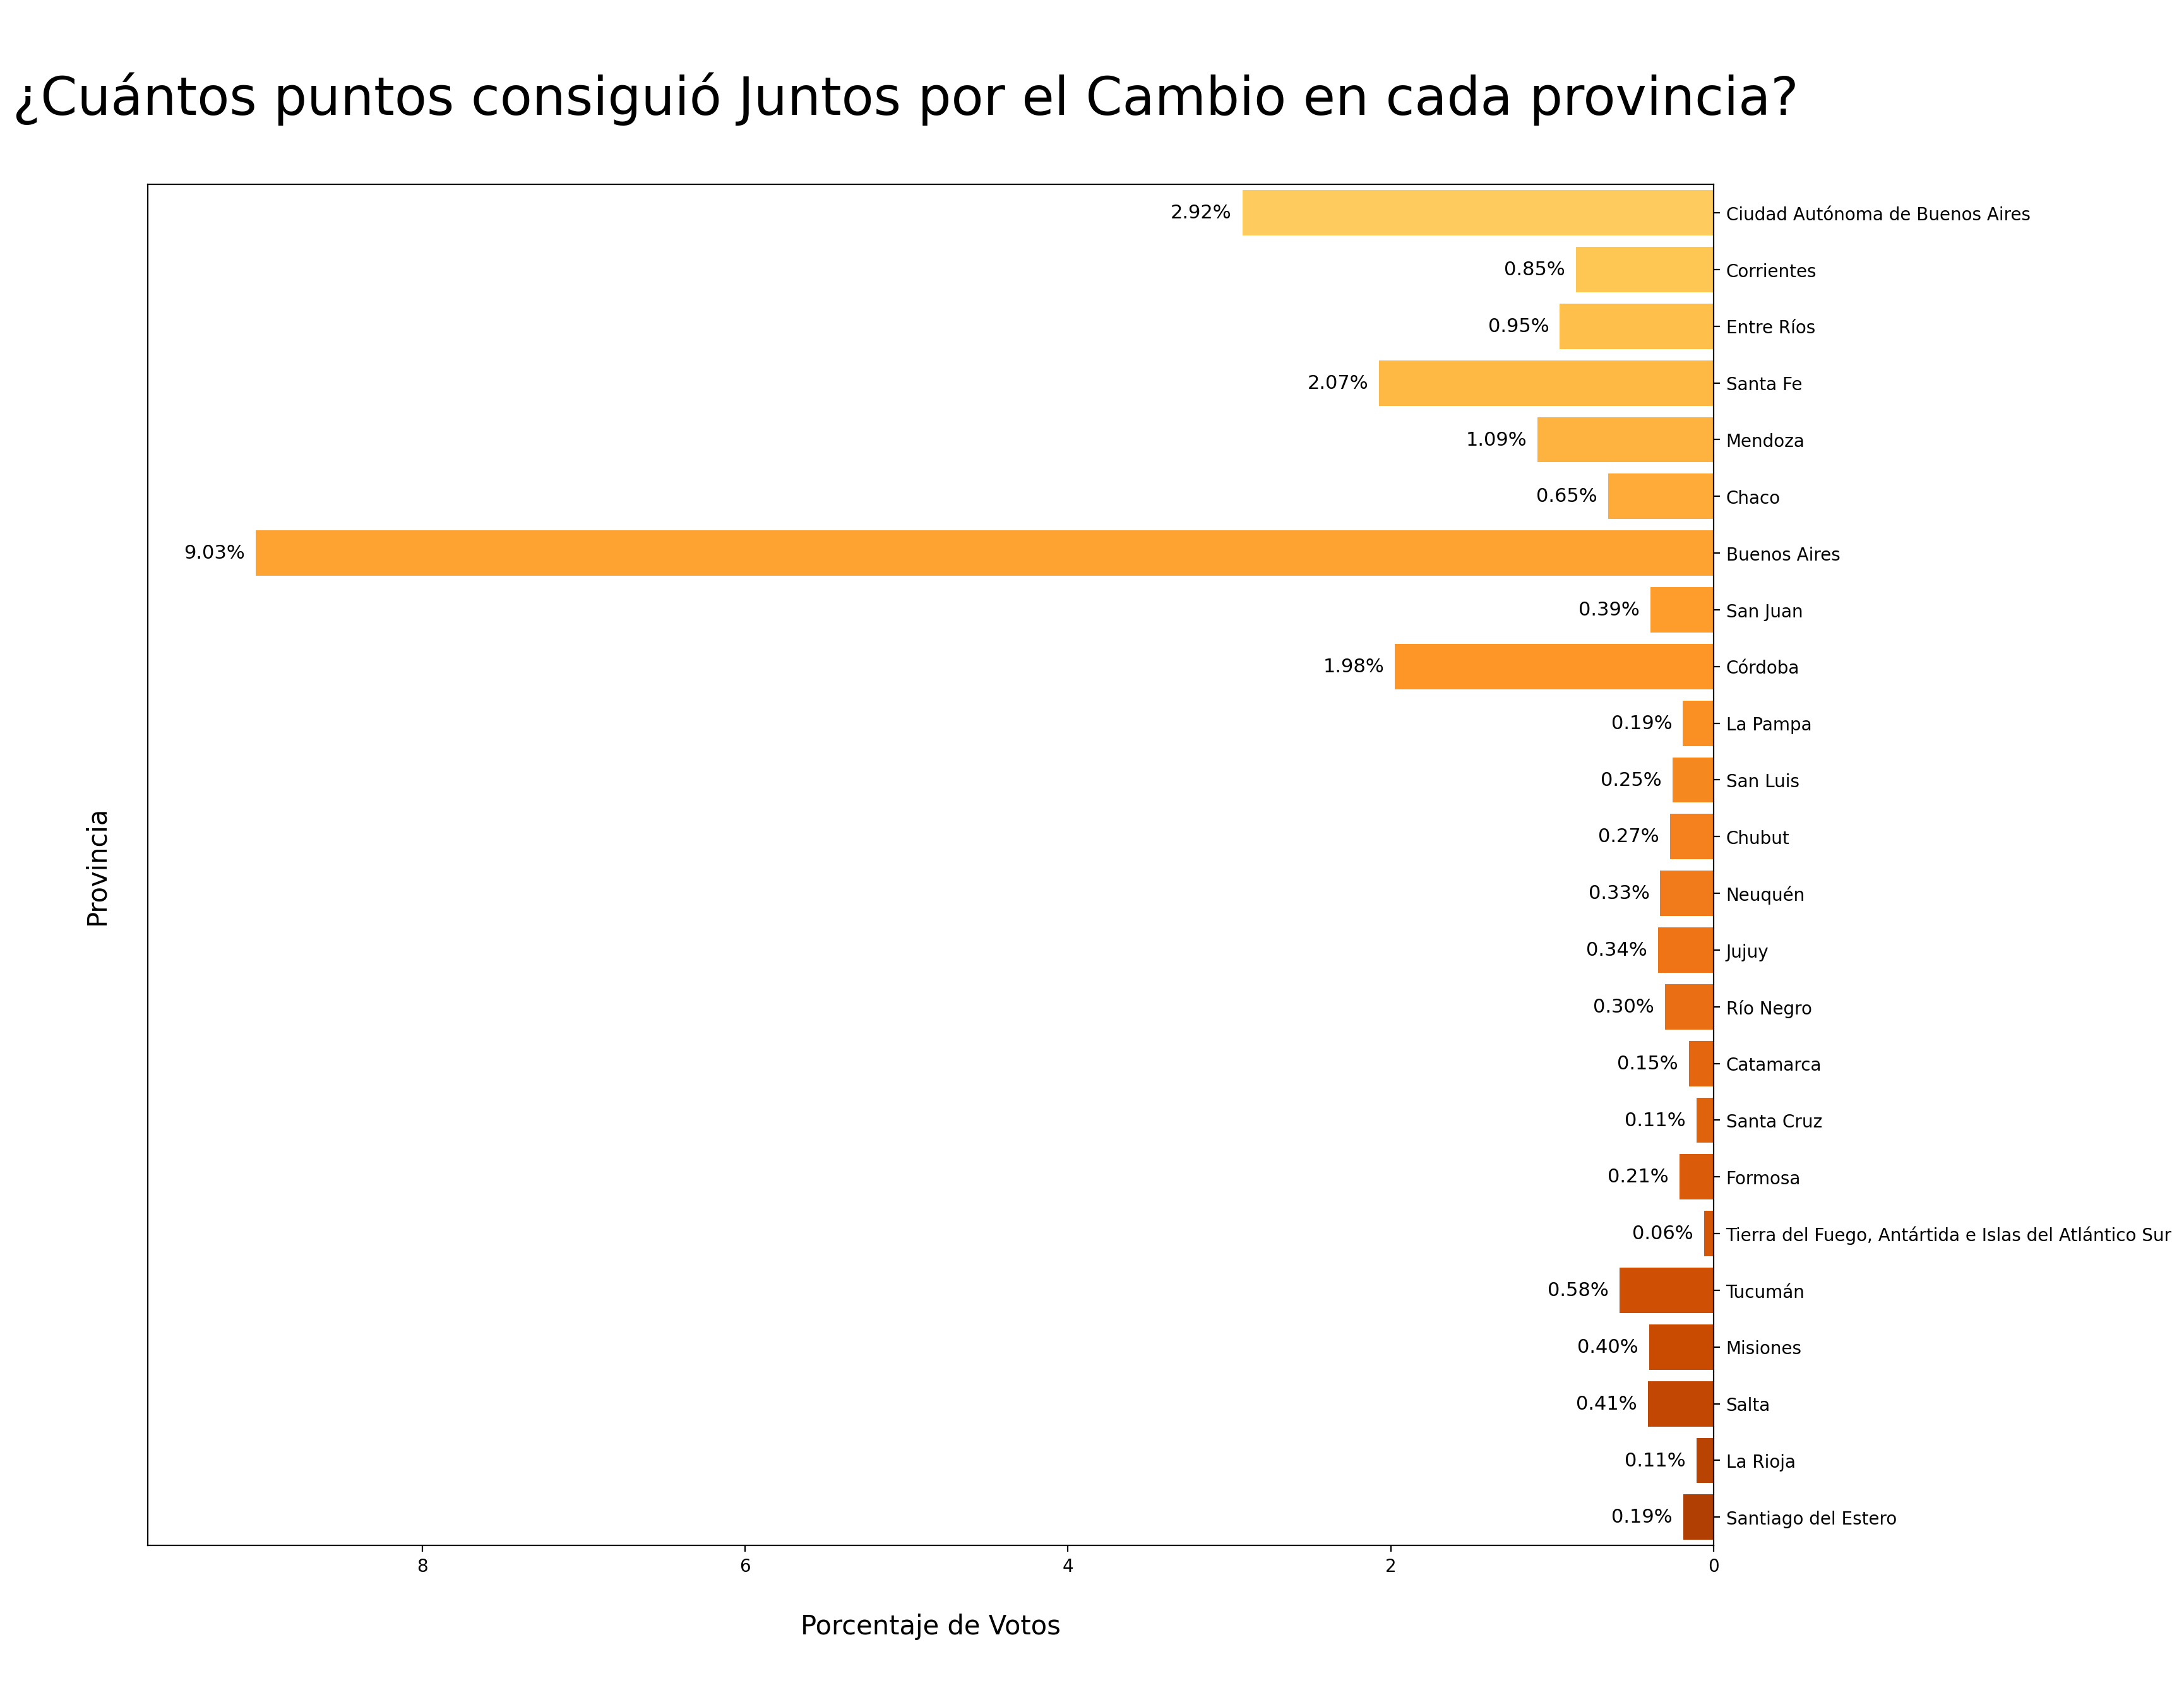

In [73]:
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['JUNTOS POR EL CAMBIO']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)



result_df_all_states_milei2 = result_df_all_states_milei.T

custom_palette = colores_jxc(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1, order= index_jxc)
chart.set_xlim(0,9.7)
chart.invert_xaxis()

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=-41, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Juntos por el Cambio en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
chart.yaxis.tick_right()

plt.savefig('Imagenes/Porcentajes_Provincia_JXC_Fragmentado.png', bbox_inches='tight')
plt.show()

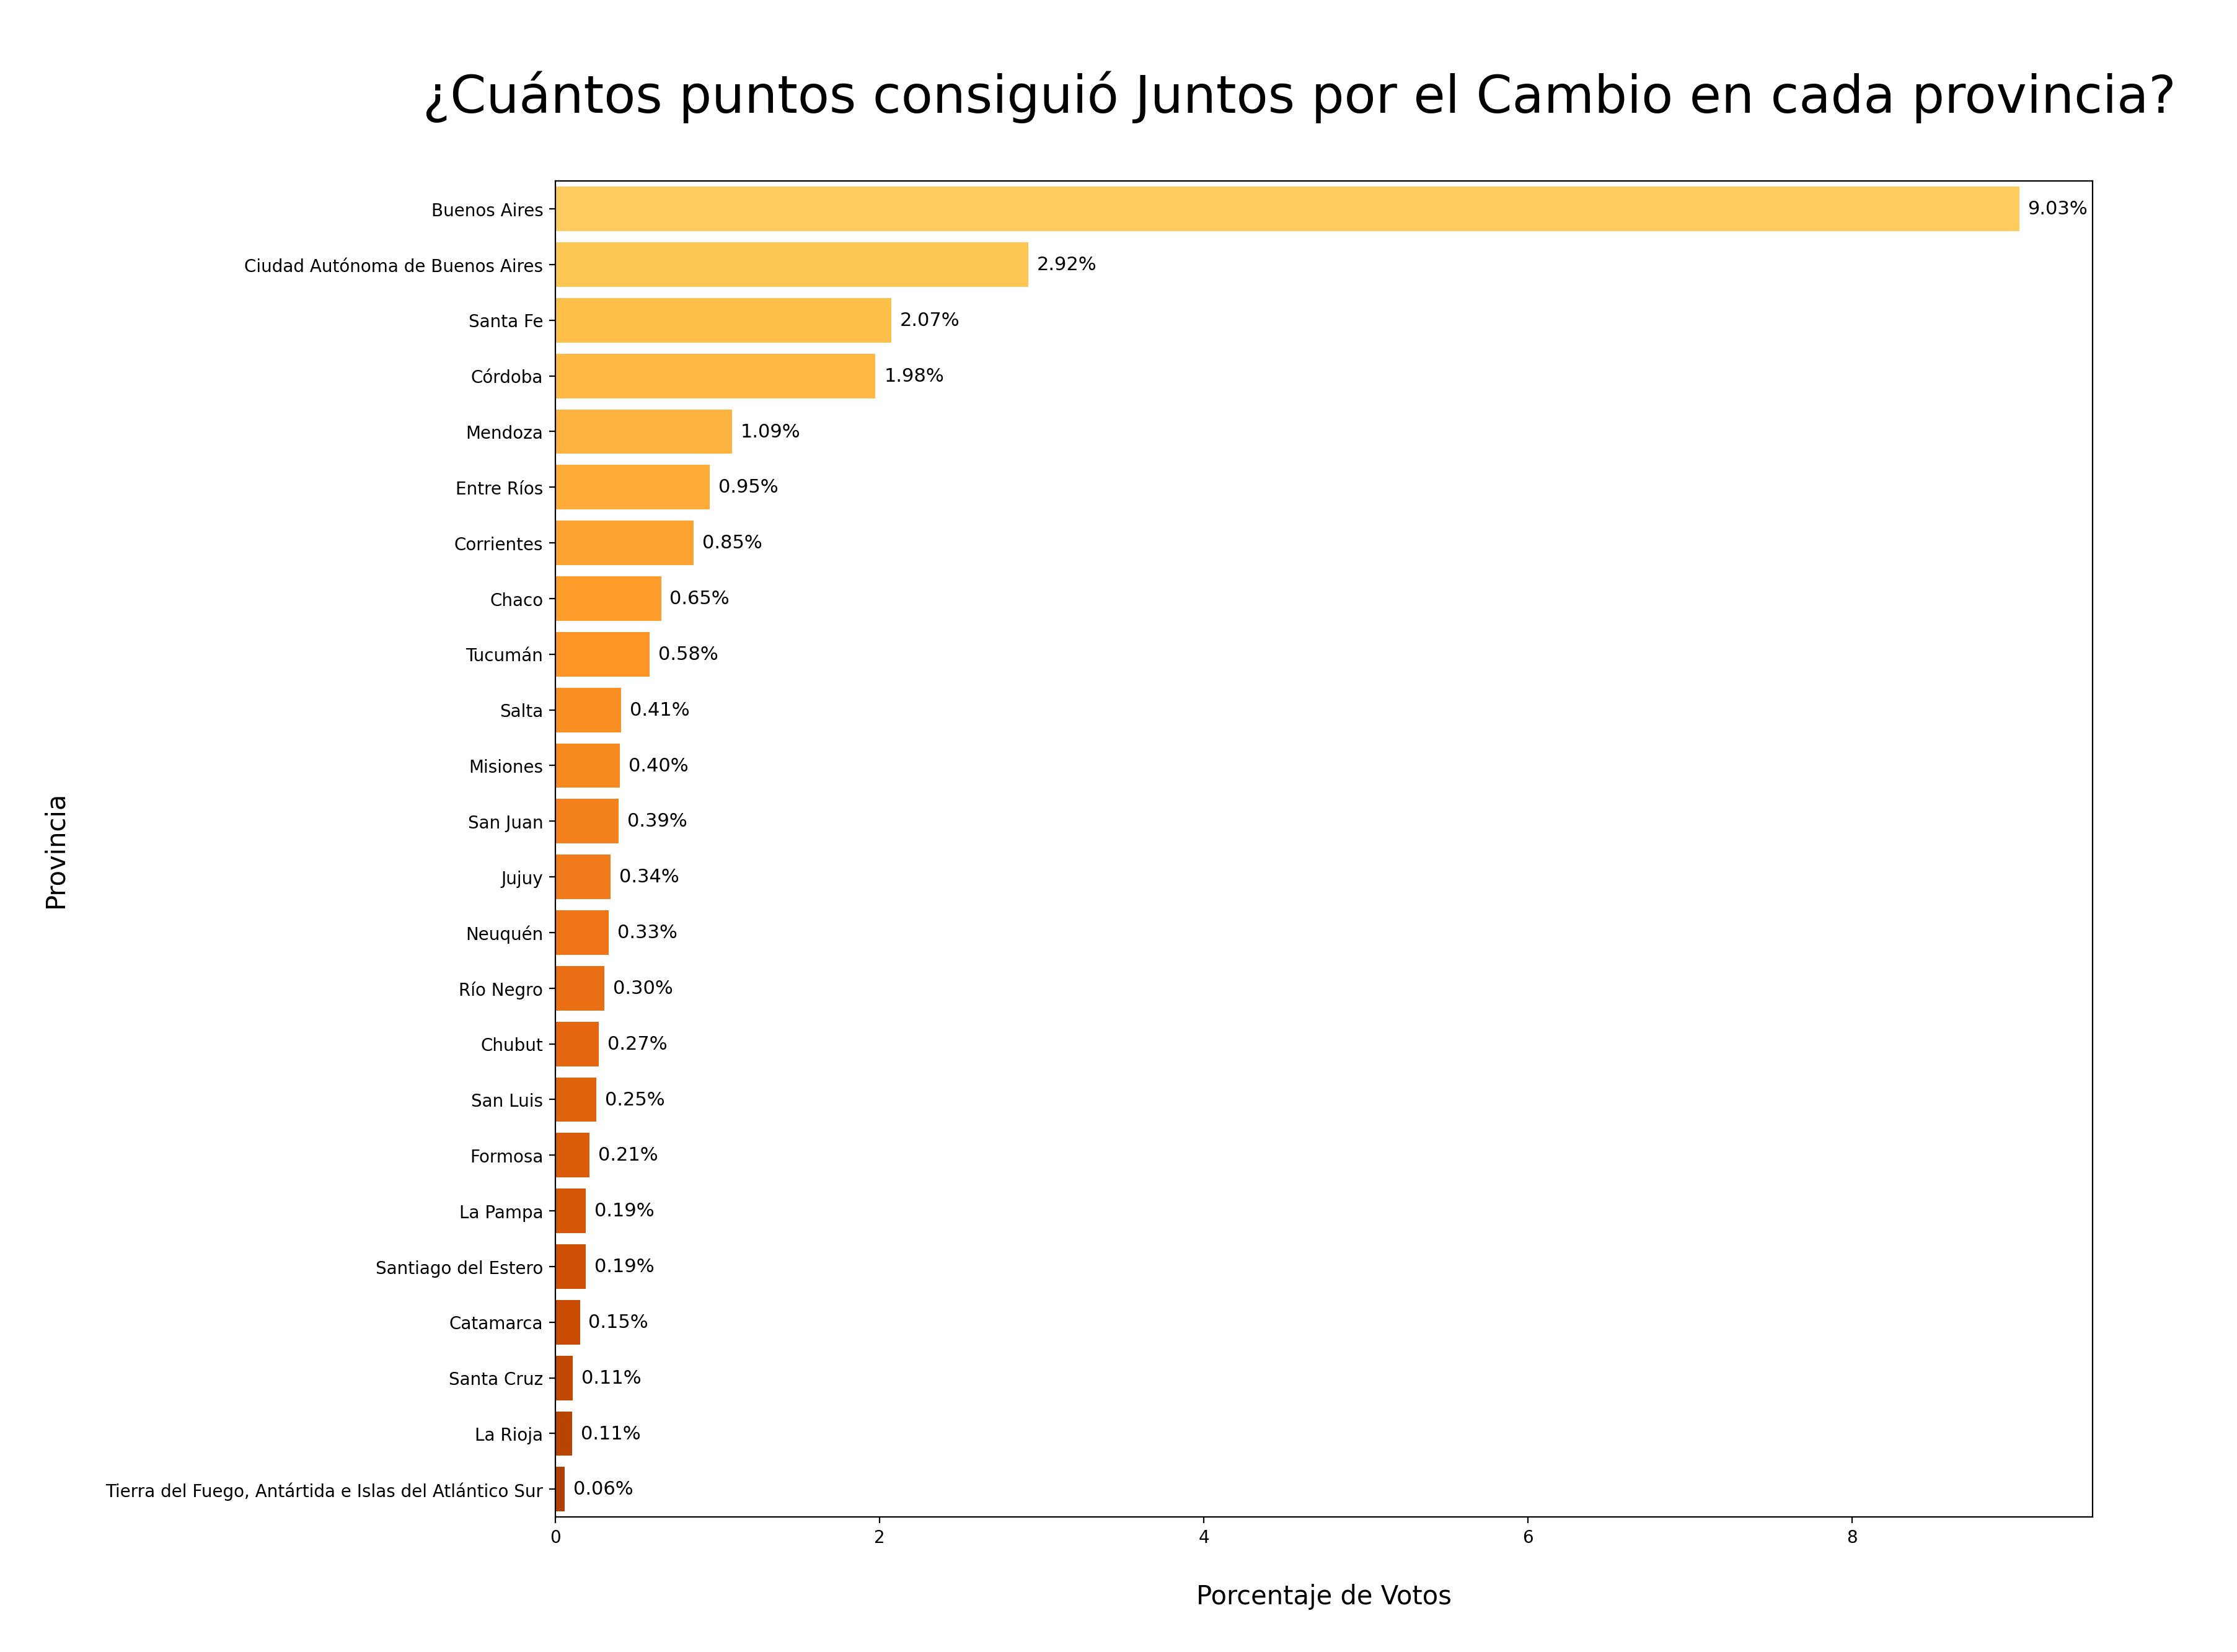

In [179]:
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['JUNTOS POR EL CAMBIO']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre').sort_values('JUNTOS POR EL CAMBIO',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)

result_df_all_states_milei2 = result_df_all_states_milei.T#.reset_index()

custom_palette = colores_jxc(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Juntos por el Cambio en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)

plt.savefig('Imagenes/Porcentajes_Provincia_JXC_Fragmentado_Orden.png', bbox_inches='tight')
plt.show()


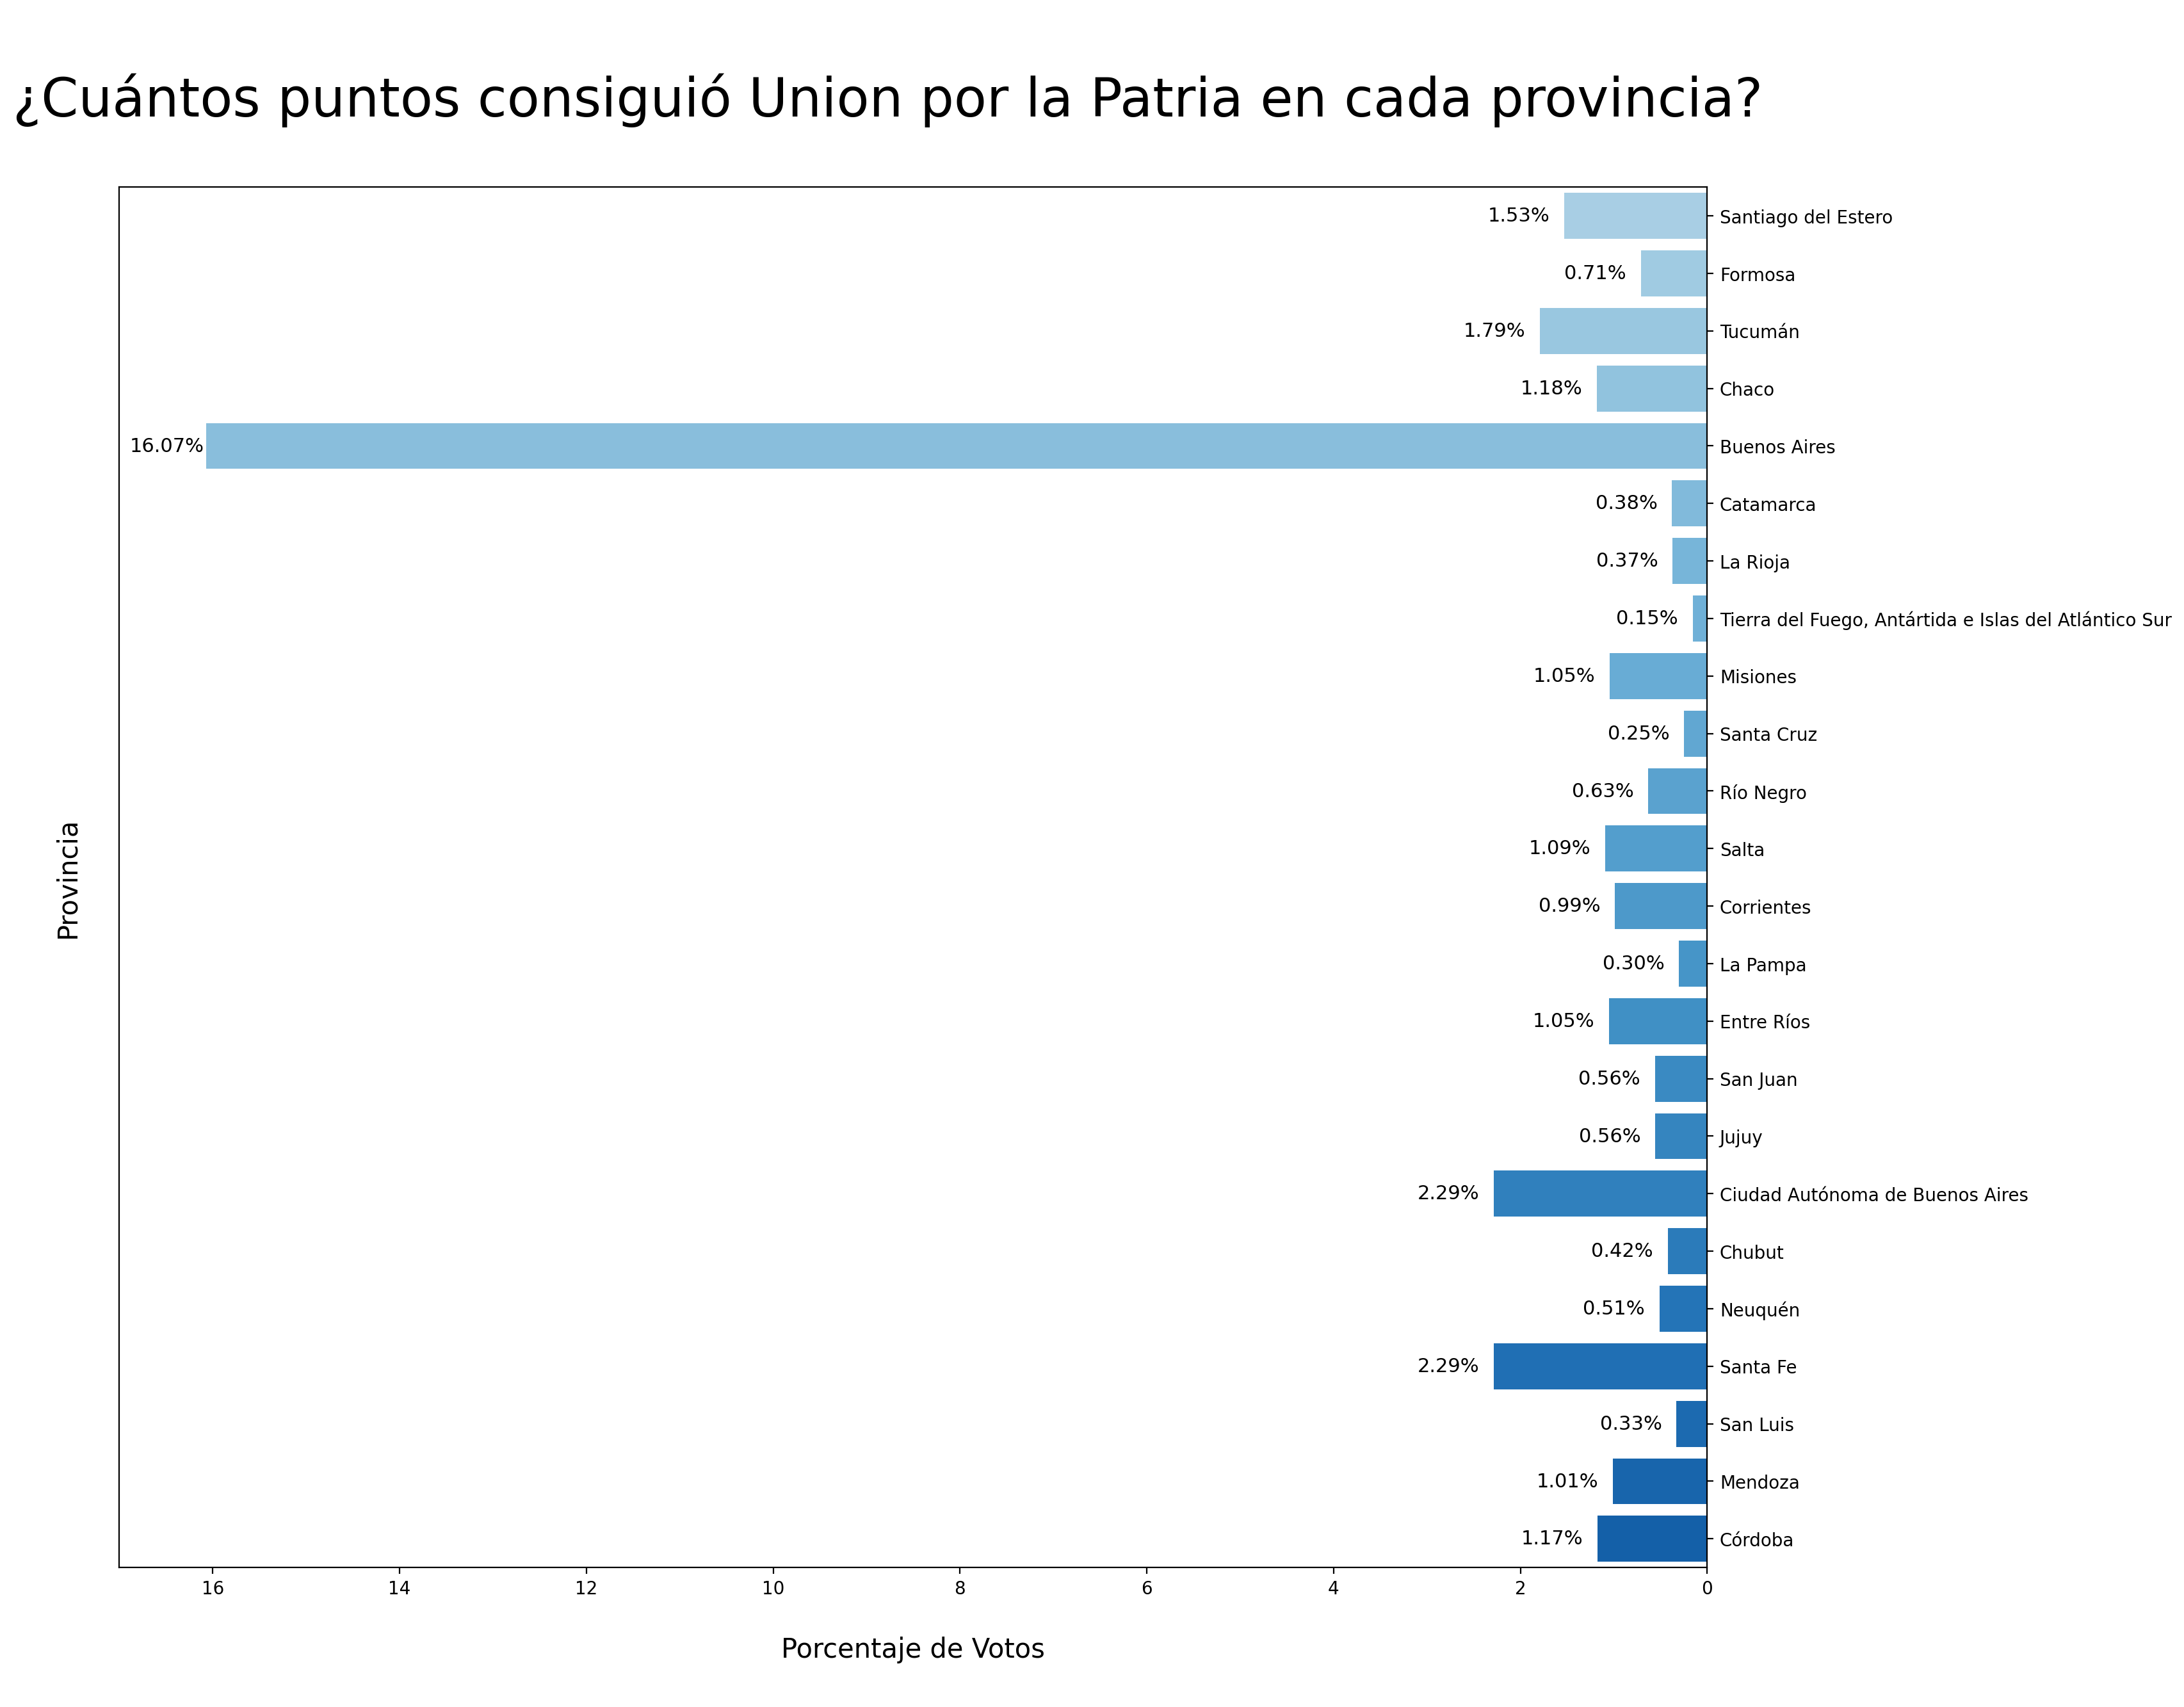

In [67]:
import numpy as np
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['UNION POR LA PATRIA']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)



result_df_all_states_milei2 = result_df_all_states_milei.T
custom_palette = colores_upp(result_df_all_states_milei2)


plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1, order=index_upp)
chart.set_xlim(0,17)
chart.invert_xaxis()
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=-43, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Union por la Patria en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
chart.yaxis.tick_right()


plt.savefig('Imagenes/Porcentajes_Provincia_UPP_Fragmentado.png', bbox_inches='tight')
plt.show()

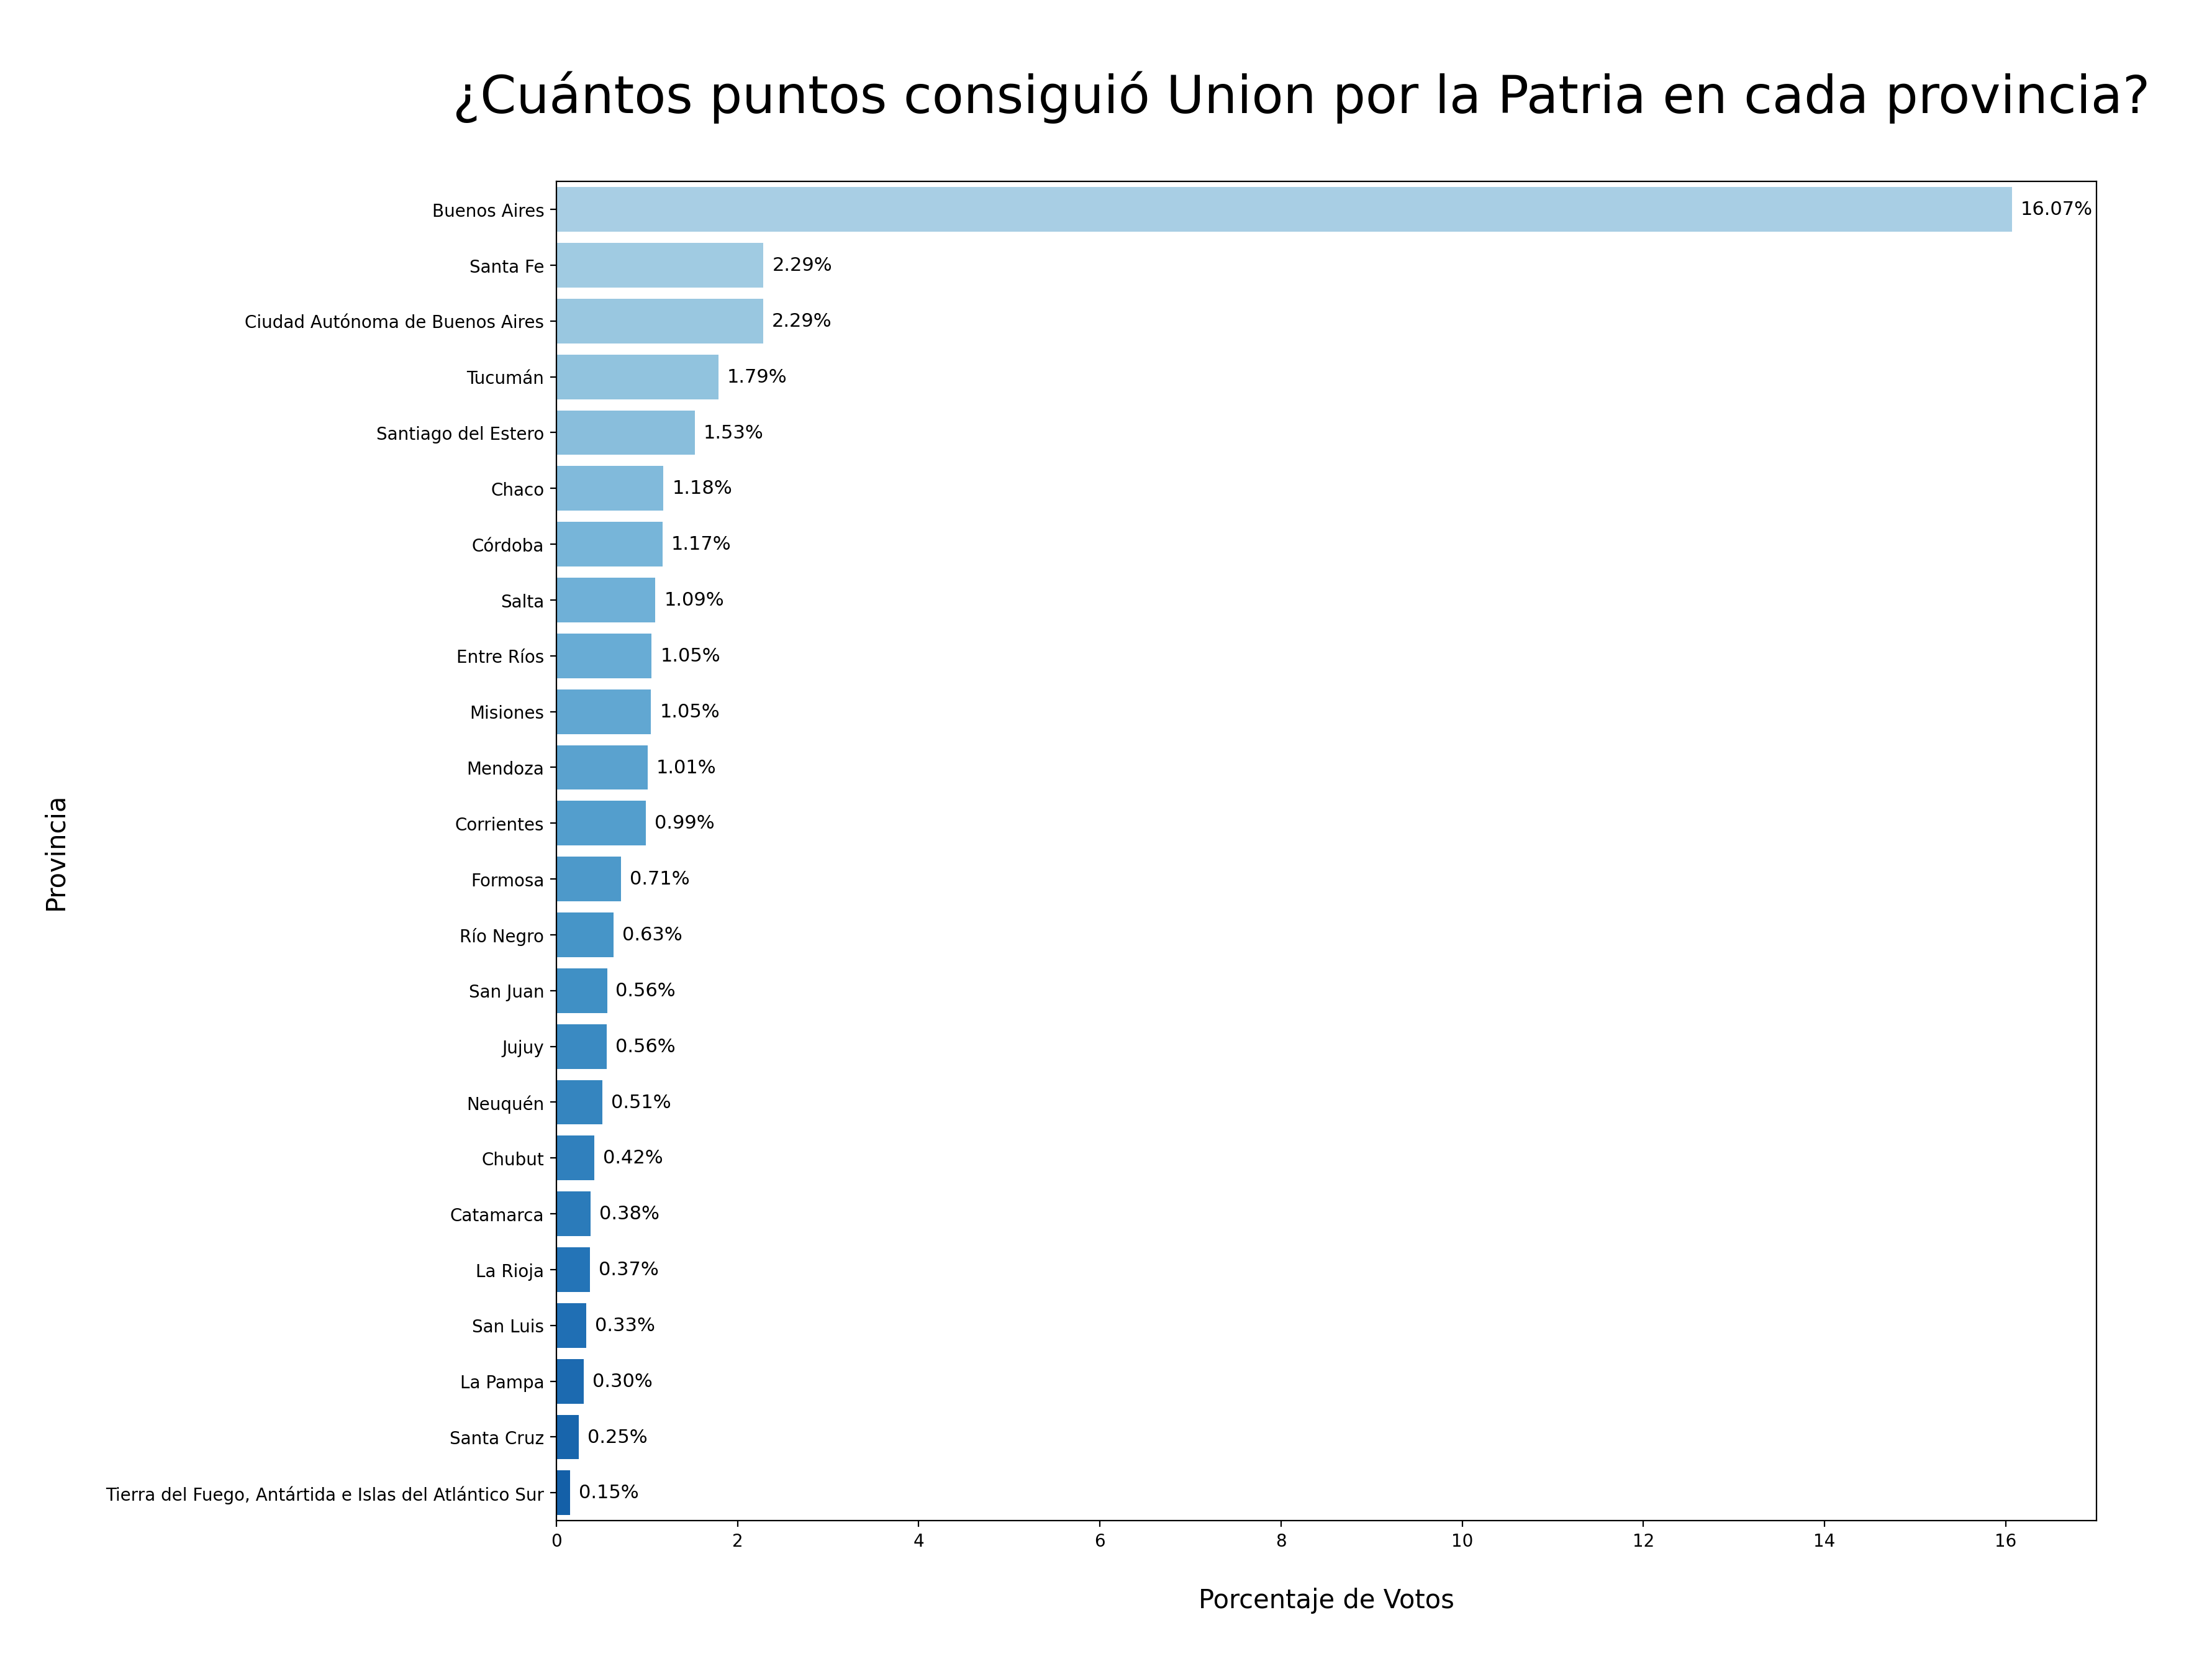

In [82]:
result_df_all_states = df_depurated_2[['distrito_nombre','distrito_id','agrupacion_nombre','votos_cantidad']]
result_df_all_states = round(result_df_all_states.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)#.div(1000000,axis=0)

result_df_all_states_milei = result_df_all_states['UNION POR LA PATRIA']

result_df_all_states_milei = result_df_all_states_milei.reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
result_df_all_states_milei = round(result_df_all_states_milei.div(result_df_all_states.sum().sum())*100,3)



result_df_all_states_milei2 = result_df_all_states_milei.T#.reset_index()
# result_df_all_states_milei2
custom_palette = colores_upp(result_df_all_states_milei2)

plt.figure(figsize=(16, 14))
chart = sns.barplot(data=result_df_all_states_milei2, orient='h', palette=custom_palette, saturation=1)

for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Union por la Patria en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
chart.set_xlim(0,17)

plt.savefig('Imagenes/Porcentajes_Provincia_UPP_Fragmentado_Orden.png', bbox_inches='tight')
plt.show()

<hr>

# Data

In [5]:
# Pass votos_cantidad to percentage in each mesa

df1_mesa = df_depurated_2.copy()
df1_mesa['votos_porcentaje'] = round(df1_mesa.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
df1_mesa.head()

distrito_nombre  distrito_id    id_mesa  mesa_electores  \
0  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
1  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
2  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
3  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
4  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   

          agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  \
0       UNION POR LA PATRIA            134   POSITIVO              96   
1      JUNTOS POR EL CAMBIO            132   POSITIVO              65   
2        LA LIBERTAD AVANZA            135   POSITIVO              44   
3       FRENTE DE IZQUIERDA            136   POSITIVO              13   
4  HACEMOS POR NUESTRO PAIS            133   POSITIVO               4   

   votos_porcentaje  
0             41.20  
1             27.90  
2             18.88  
3              5.58  
4              1.72

In [59]:
# df1 = df1_mesa[df1_mesa['cargo_nombre']=='PRESIDENTE Y VICE']
# asdd = df1_mesa[df1_mesa['distrito_nombre']=='Santiago del Estero']
asdd = df1_mesa[df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA']
asdd = asdd[asdd['votos_cantidad']<=10]
ides = asdd['id_mesa'].tolist()
asdd2 = df1_mesa[df1_mesa['id_mesa'].isin(ides)].reset_index(drop=True)
asdd2 = asdd2.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
asdd2 = asdd2[asdd2['votos_cantidad']>=100]
ides2 = asdd2['id_mesa'].tolist()
asdd3 = df1_mesa[df1_mesa['id_mesa'].isin(ides2)]
max_votos= asdd3.groupby('id_mesa')['votos_cantidad'].transform('max')
condition = asdd3['votos_cantidad'] == max_votos
asdd3 = asdd3[condition]
asdd3['agrupacion_nombre'].value_counts()
# asdd3.groupby('agrupacion_nombre')['votos_porcentaje'].median()
# asdd3 = asdd2[asdd2['agrupacion_nombre']=='UNION POR LA PATRIA']
# asdd3 = asdd3[asdd3['votos_cantidad']!=0]
# asdd3.sort_values(['votos_porcentaje']).median()




# ides = asdd3['id_mesa'].tolist()
# asdd4 = df1_mesa[df1_mesa['id_mesa'].isin(ides)].reset_index(drop=True)
# asdd2.iloc[30:].head(40)
# asdd2[asdd2['agrupacion_nombre']=='UNION POR LA PATRIA']

UNION POR LA PATRIA         243
JUNTOS POR EL CAMBIO         22
HACEMOS POR NUESTRO PAIS      8
FRENTE DE IZQUIERDA           3
Name: agrupacion_nombre, dtype: int64

In [79]:
# Numero de mesas con tanto porcentaje
df1_mesas_porcen = df1_mesa[df1_mesa['votos_porcentaje']>=50].sort_values('votos_porcentaje', axis=0, ascending=False)
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['votos_cantidad']>=25]
print(df1_mesas_porcen.value_counts(['distrito_nombre']).reset_index())
mesas = df1_mesas_porcen.value_counts(['distrito_nombre']).sum()
print(f'\nMesas totales: {mesas}\n\n')
df1_mesas_porcen.value_counts(['agrupacion_nombre'])
# df1_mesas_porcen.value_counts(['distrito_nombre']).reset_index()

                                      distrito_nombre     0
0                                        Buenos Aires  9445
1                                 Santiago del Estero  2123
2                     Ciudad Autónoma de Buenos Aires  1439
3                                             Tucumán  1313
4                                               Chaco   830
5                                             Formosa   783
6                                               Salta   688
7                                            Misiones   569
8                                          Corrientes   500
9                                             Mendoza   464
10                                           Santa Fe   342
11                                           La Rioja   202
12                                          Catamarca   196
13                                            Córdoba   186
14                                           San Luis   159
15                                      

agrupacion_nombre       
UNION POR LA PATRIA         16461
JUNTOS POR EL CAMBIO         2134
LA LIBERTAD AVANZA           1234
HACEMOS POR NUESTRO PAIS      106
FRENTE DE IZQUIERDA             1
dtype: int64

In [39]:
# Cuanto representan las mesas con tanto porcentaje
votos_totales_df = df_depurated_2.copy()
votos_totales_df = votos_totales_df[votos_totales_df['agrupacion_id']!=0]
votos_totales = votos_totales_df['votos_cantidad'].sum()
df1_mesas_porcen = df1_mesa[df1_mesa['votos_porcentaje']>=60].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen.groupby('agrupacion_nombre')['votos_cantidad'].sum().div(votos_totales/100).reset_index().sort_values('votos_cantidad', ascending=False).set_index('agrupacion_nombre')

votos_cantidad
agrupacion_nombre                       
UNION POR LA PATRIA                 3.29
JUNTOS POR EL CAMBIO                0.32
LA LIBERTAD AVANZA                  0.04
HACEMOS POR NUESTRO PAIS            0.01

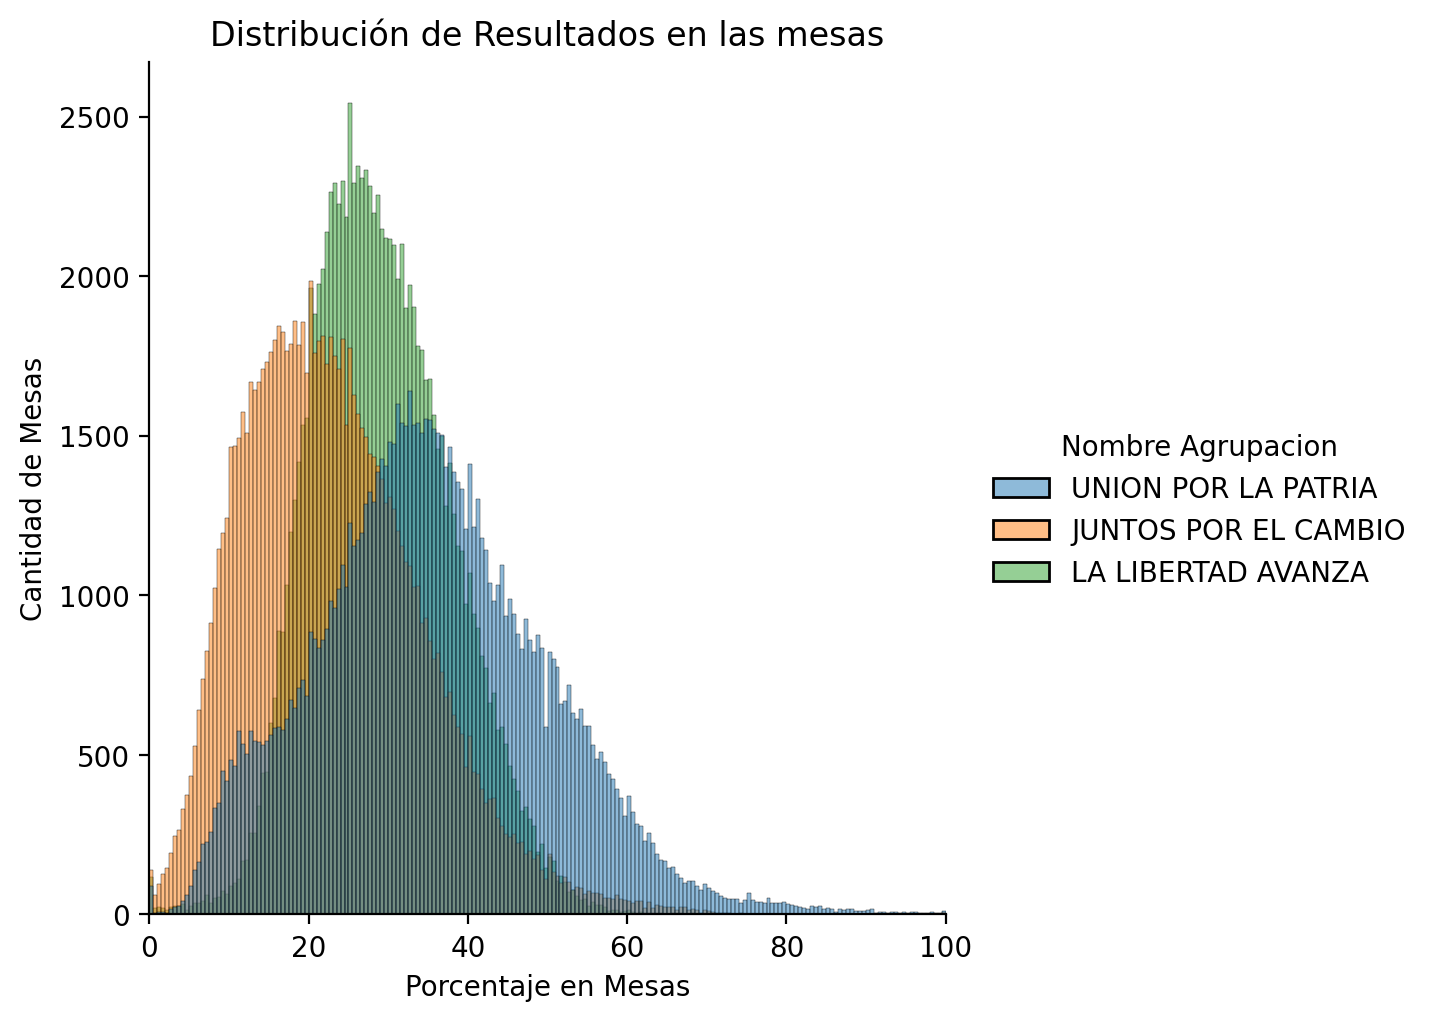

In [6]:
df1_mesas_porcen = df1_mesa[~df1_mesa['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]#.sort_values('votos_porcentaje', axis=0, ascending=False)#[df1_mesa['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Jujuy']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

chart = sns.displot(df1_mesas_porcen, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('Distribución de Resultados en las mesas')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
chart._legend.set_title("Nombre Agrupacion")
# plt.savefig('Imagenes/Santiago del Estero/Distribucion_mesas.png', bbox_inches='tight')
plt.show()

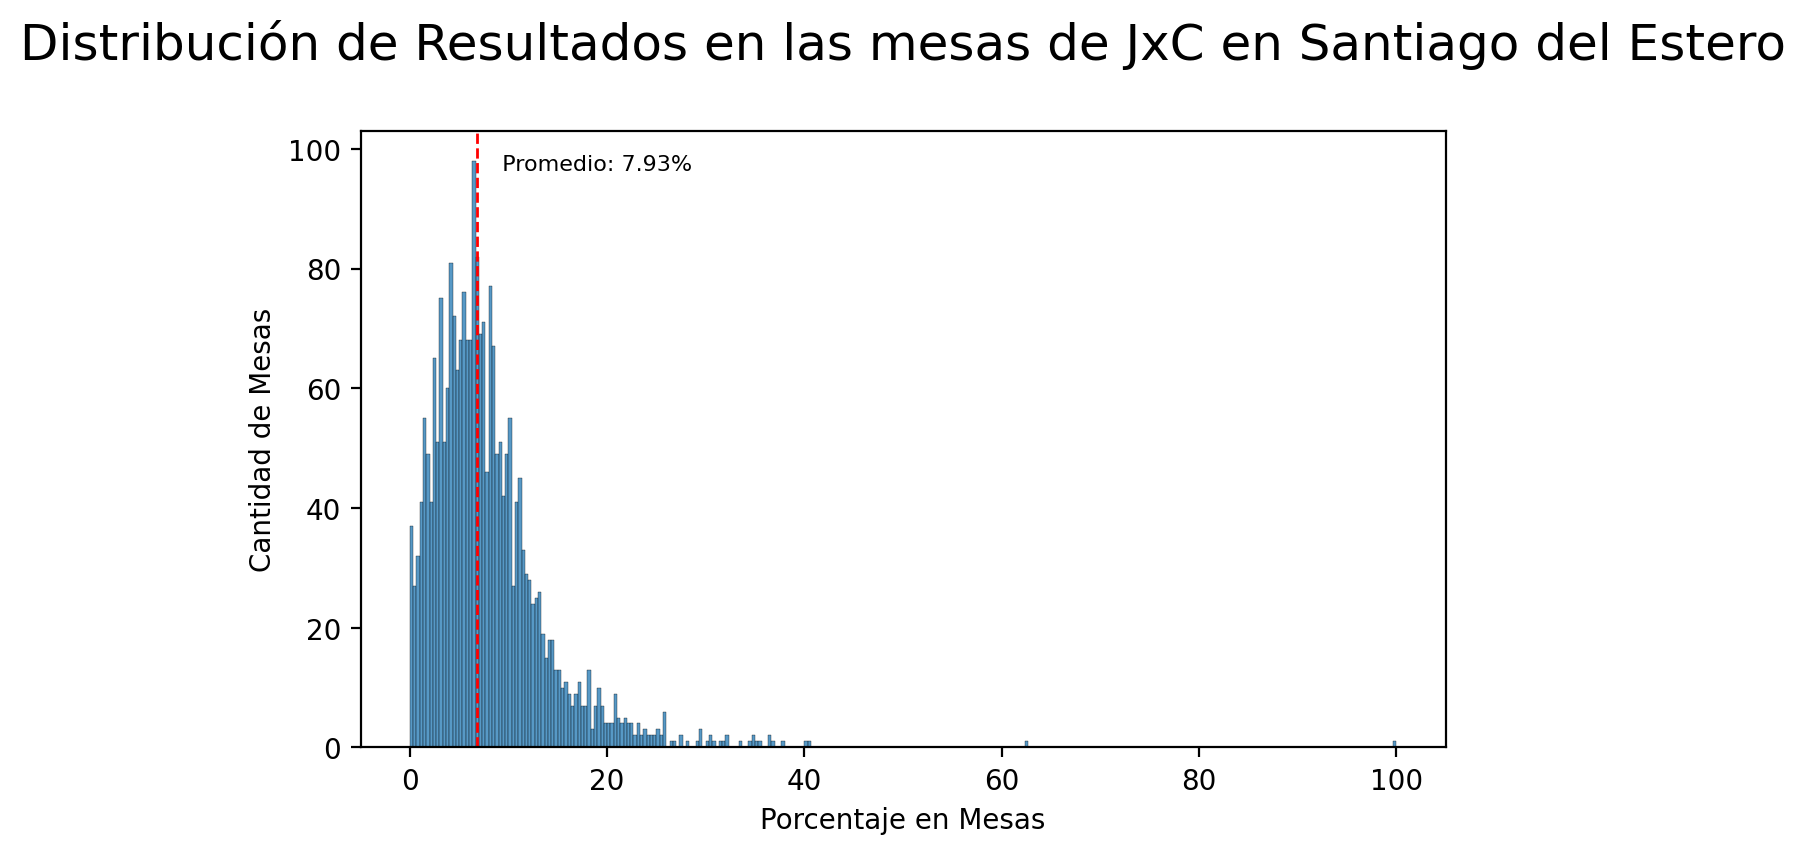

In [28]:
import numpy as np
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
# chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de JxC en Santiago del Estero\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Santiago del Estero/Distribucion_JxC_mesas.png', bbox_inches='tight')
plt.show()

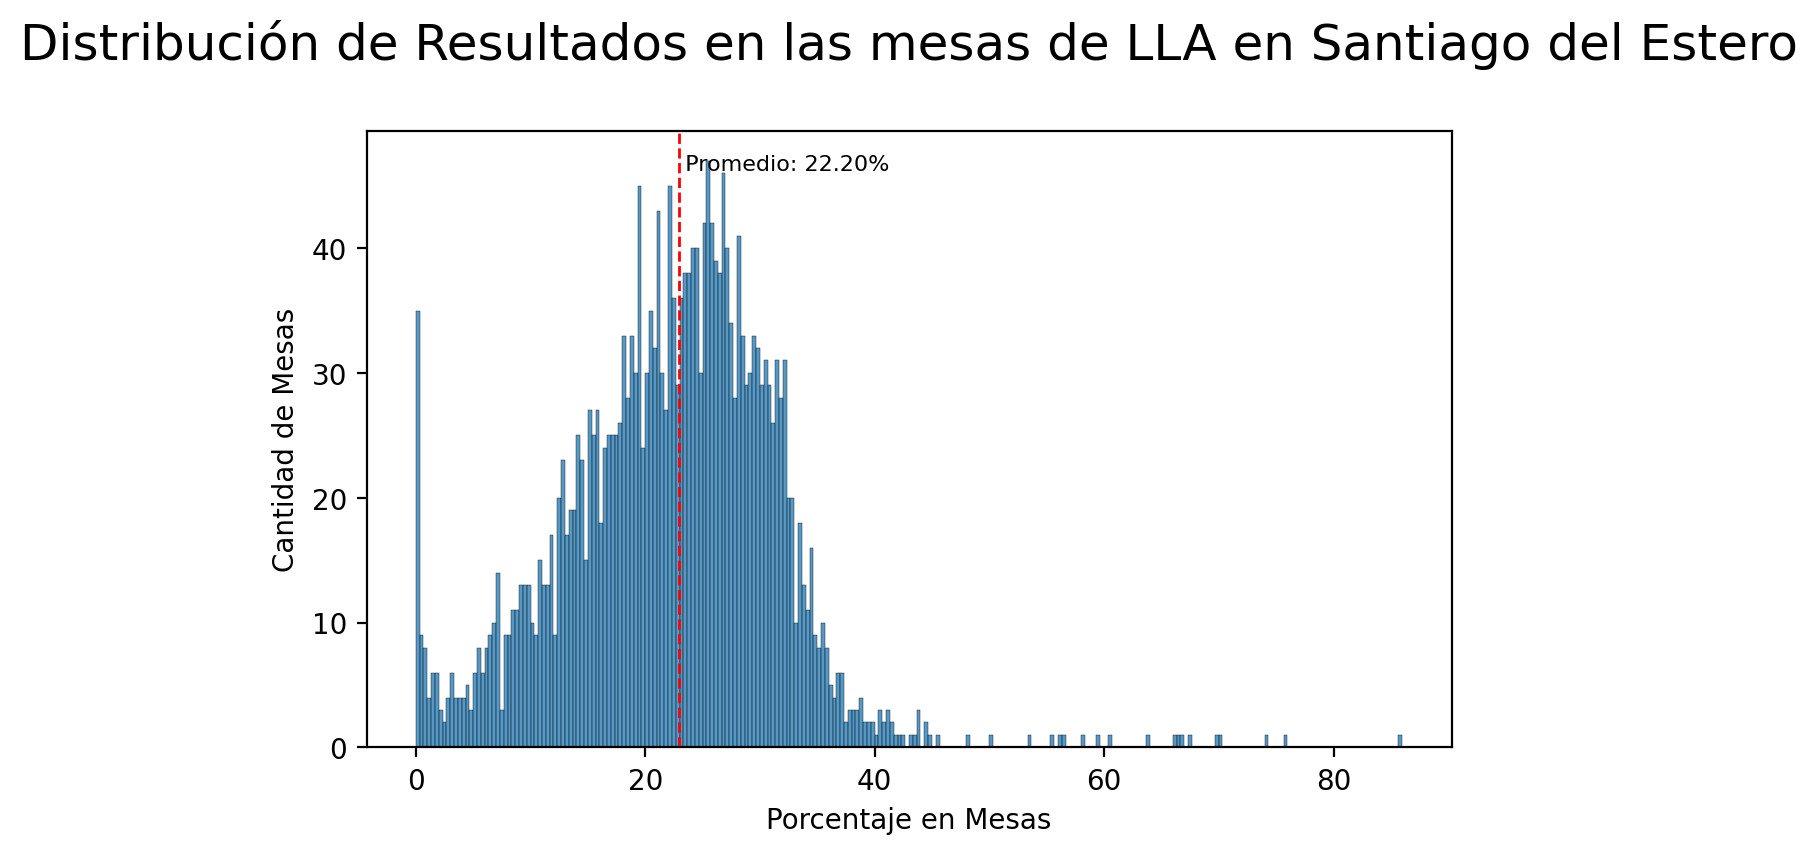

In [26]:
import numpy as np
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA']
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
# chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de LLA en Santiago del Estero\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

# plt.savefig('Imagenes/Distribucion_LLA_mesas.png', bbox_inches='tight')
plt.show()

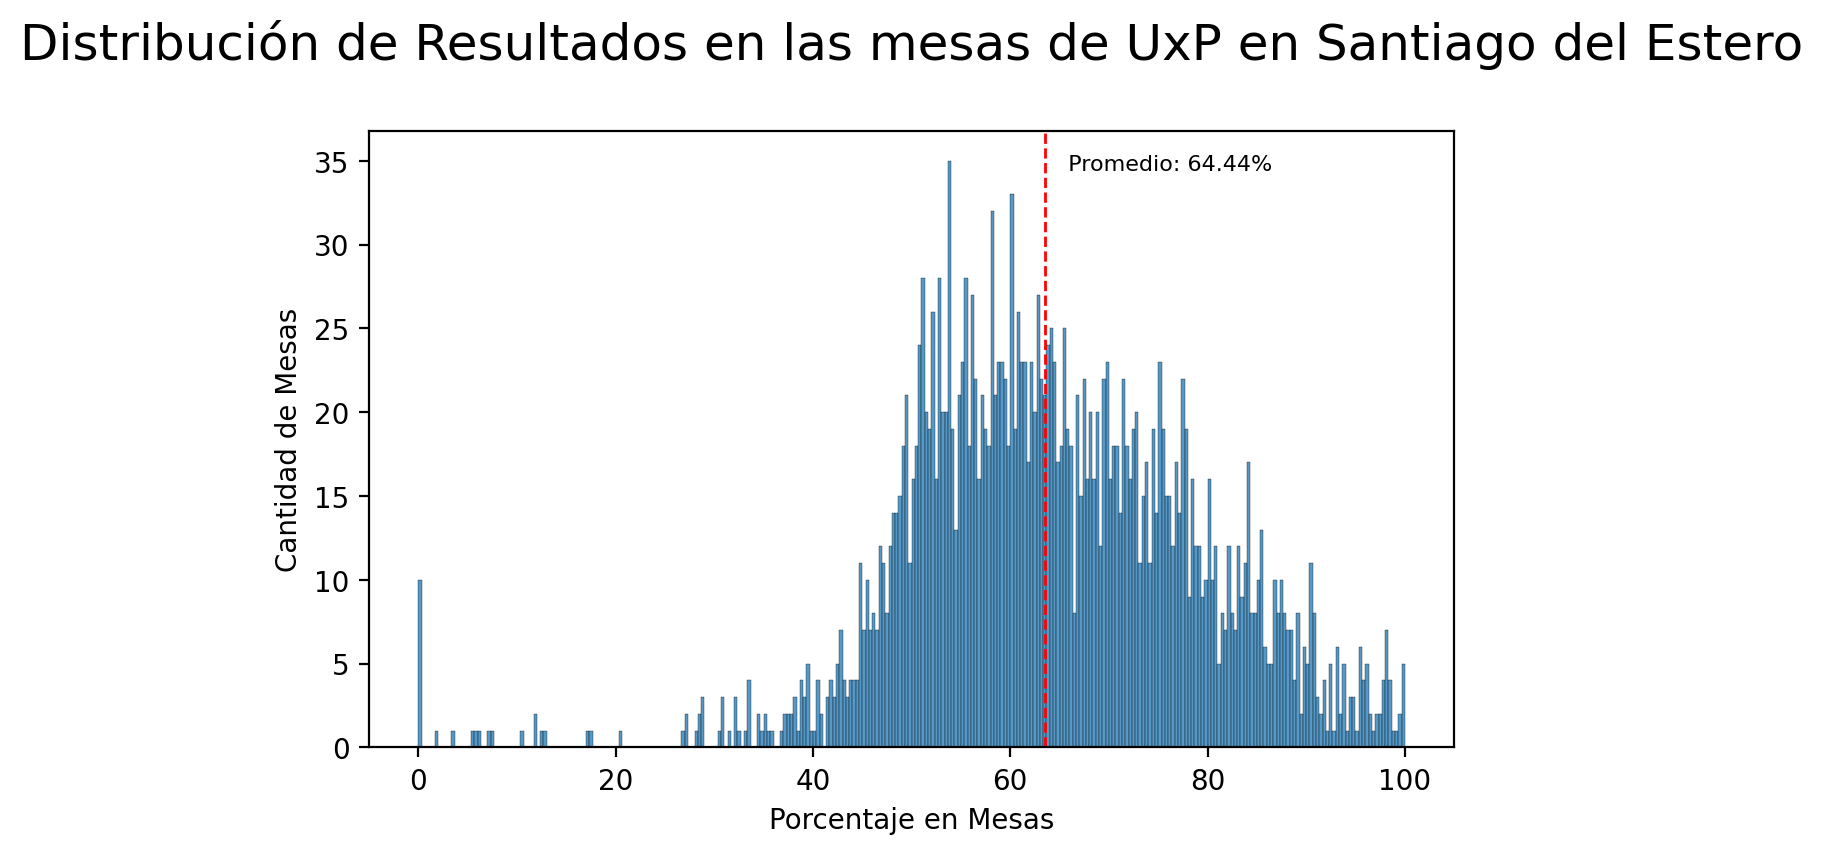

In [25]:
import numpy as np
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Santiago del Estero']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
# chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de UxP en Santiago del Estero\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

# plt.savefig('Imagenes/Distribucion_LLA_mesas.png', bbox_inches='tight')
plt.show()

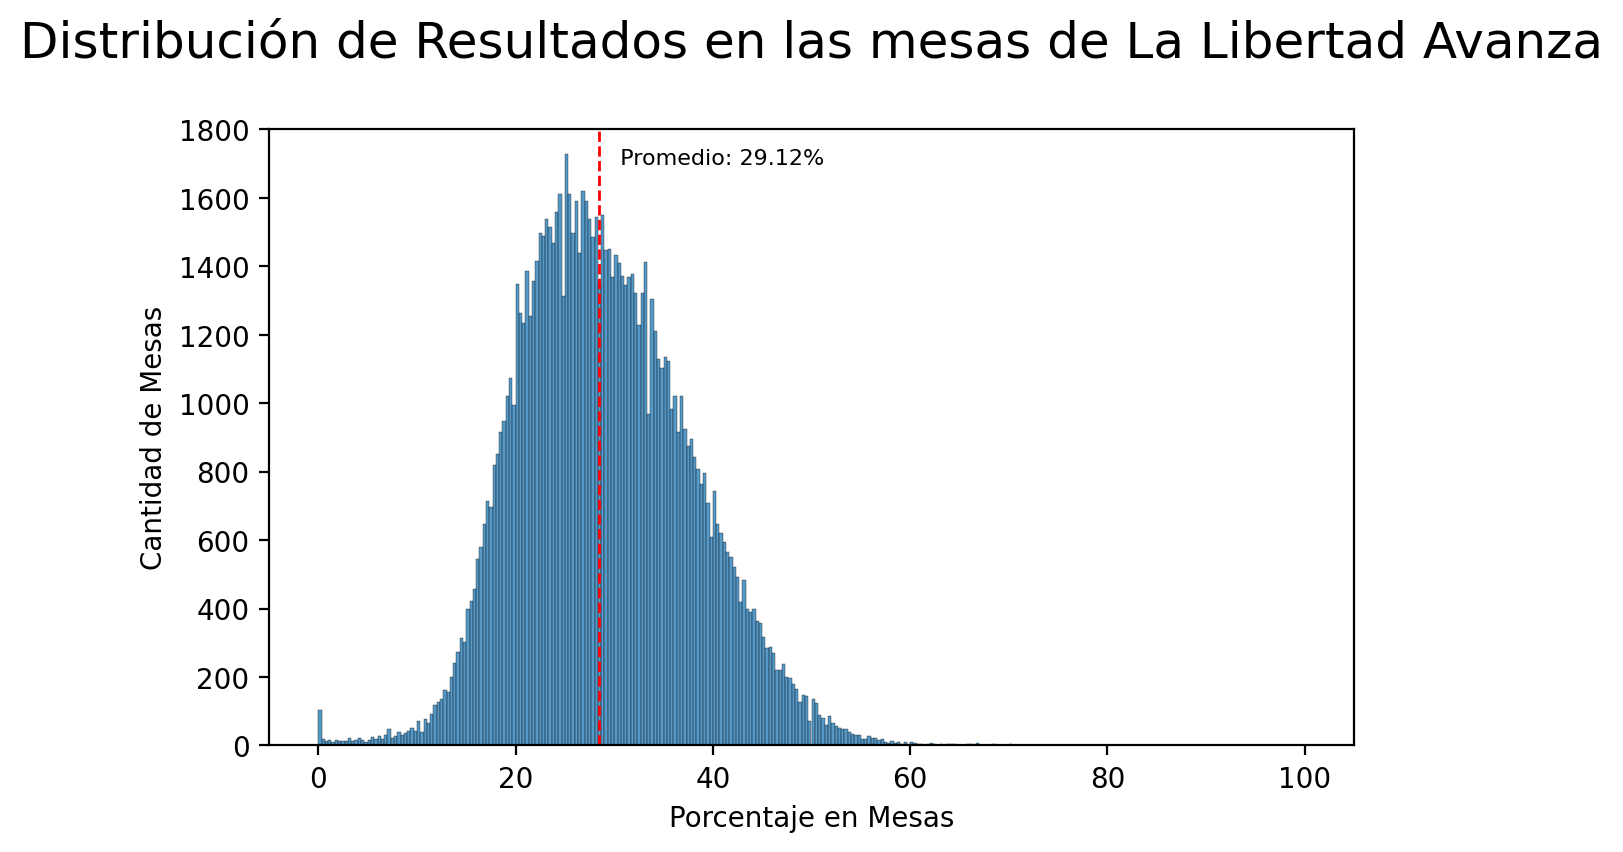

In [177]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de La Libertad Avanza\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Distribucion_LLA_mesas.png', bbox_inches='tight')
plt.show()

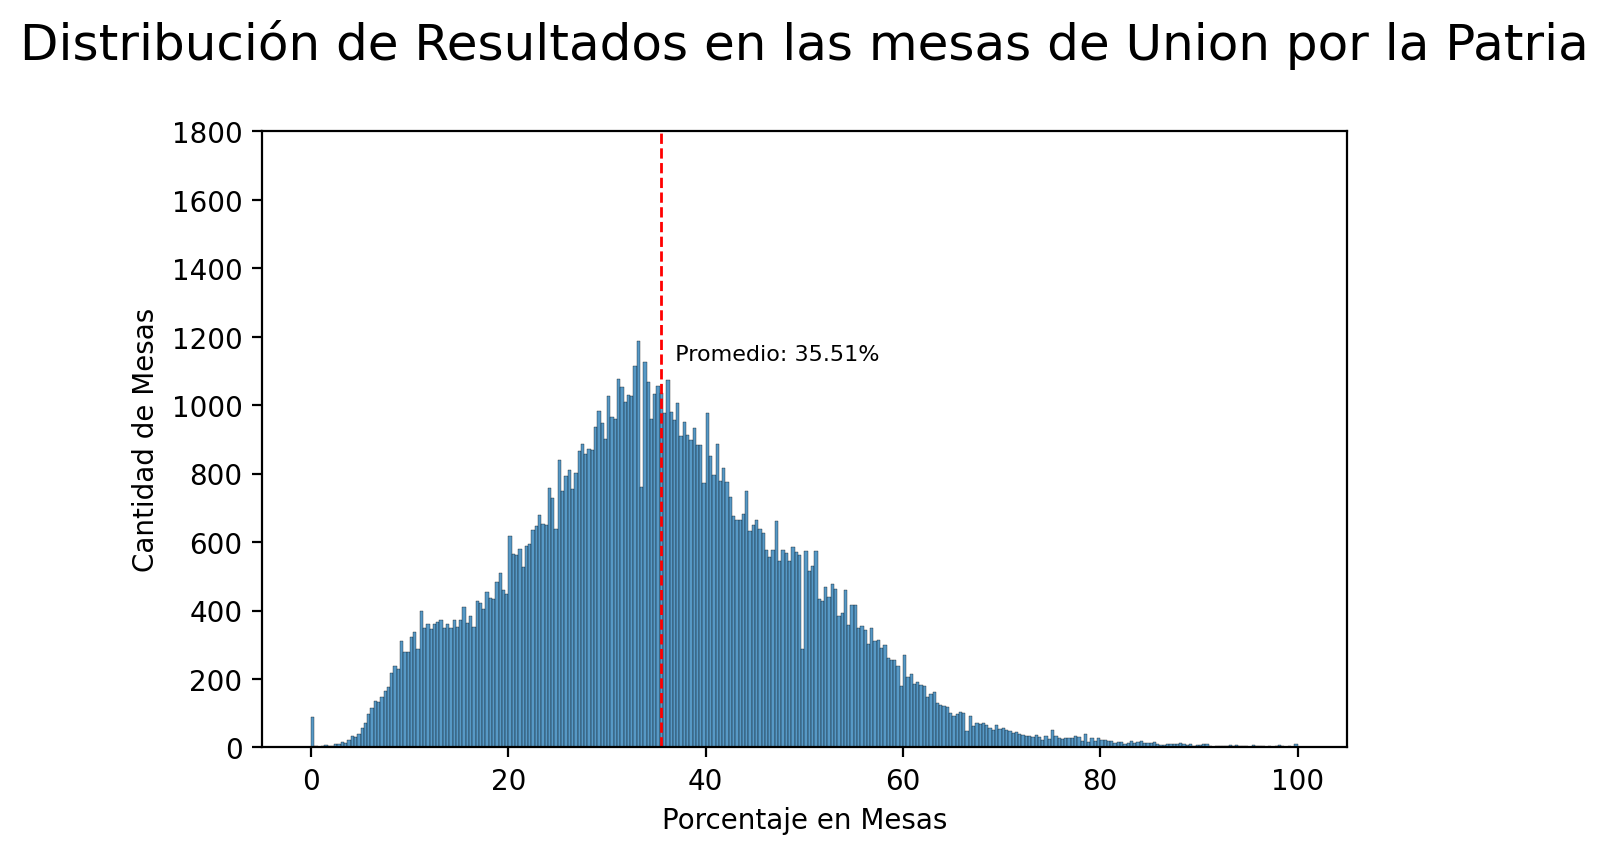

In [42]:
from scipy import stats
import numpy as np
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de Union por la Patria\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')

plt.savefig('Imagenes/Distribucion_UPP_mesas.png', bbox_inches='tight')
plt.show()

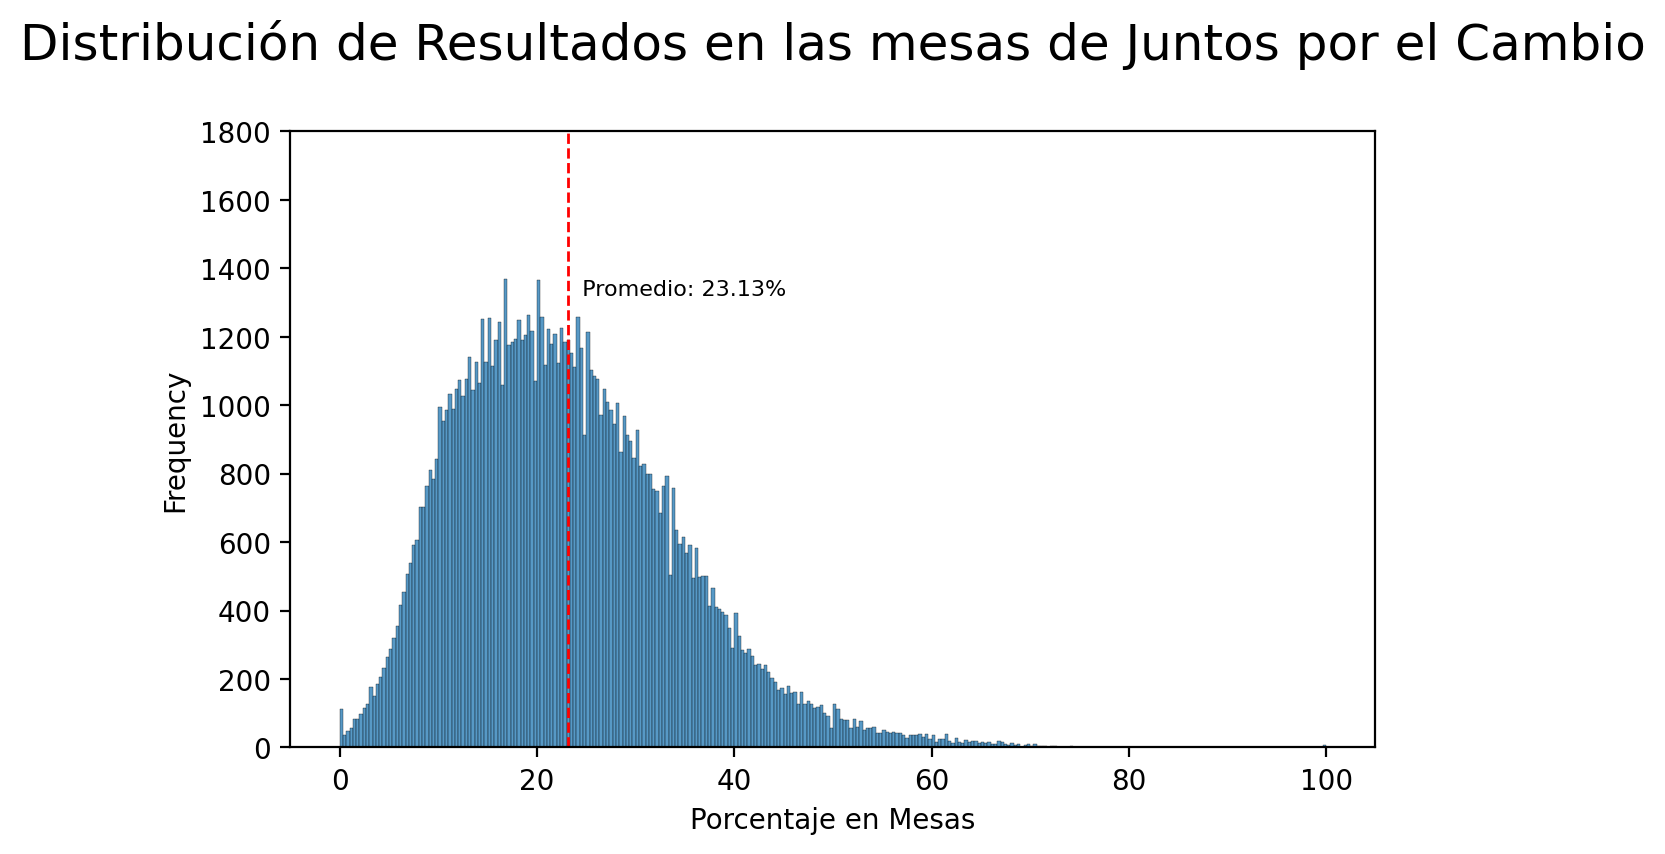

In [43]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

data_range = df1_mesas_porcen['votos_porcentaje'].max() - df1_mesas_porcen['votos_porcentaje'].min()
num_bins = int(np.ceil(data_range / 1))
plt.figure(figsize=(7, 4))
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=num_bins*3)
plt.text(promedio,chart.get_ylim()[1], f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,1800)

plt.title('Distribución de Resultados en las mesas de Juntos por el Cambio\n', fontsize=18)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')

plt.savefig('Imagenes/Distribucion_JXC_mesas.png', bbox_inches='tight')
plt.show()

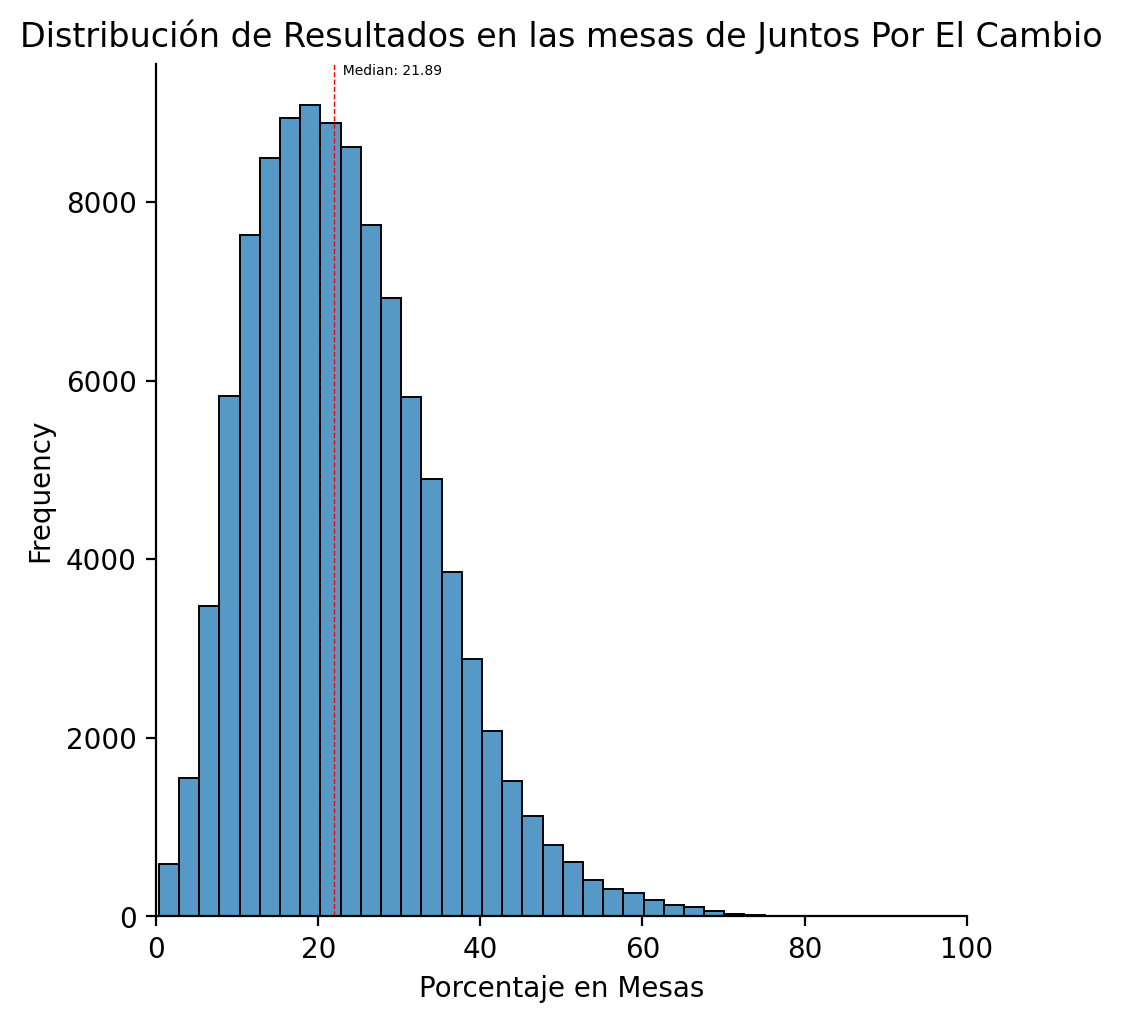

In [42]:
df1_mesas_porcen = df1_mesa[df1_mesa['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

chart = sns.displot(df1_mesas_porcen, x="votos_porcentaje", bins=40)
chart.set(xlim=(0, 100))

plt.text(mediana,chart.ax.get_ylim()[1], f'  Median: {mediana:.2f}', color='black', fontsize=5, verticalalignment='top')
plt.axvline(mediana, color='red', linestyle='--',linewidth=0.5)
plt.title('Distribución de Resultados en las mesas de Juntos Por El Cambio')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Frequency')

plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas_de_Juntos_Por_El_Cambio.png')
plt.show()

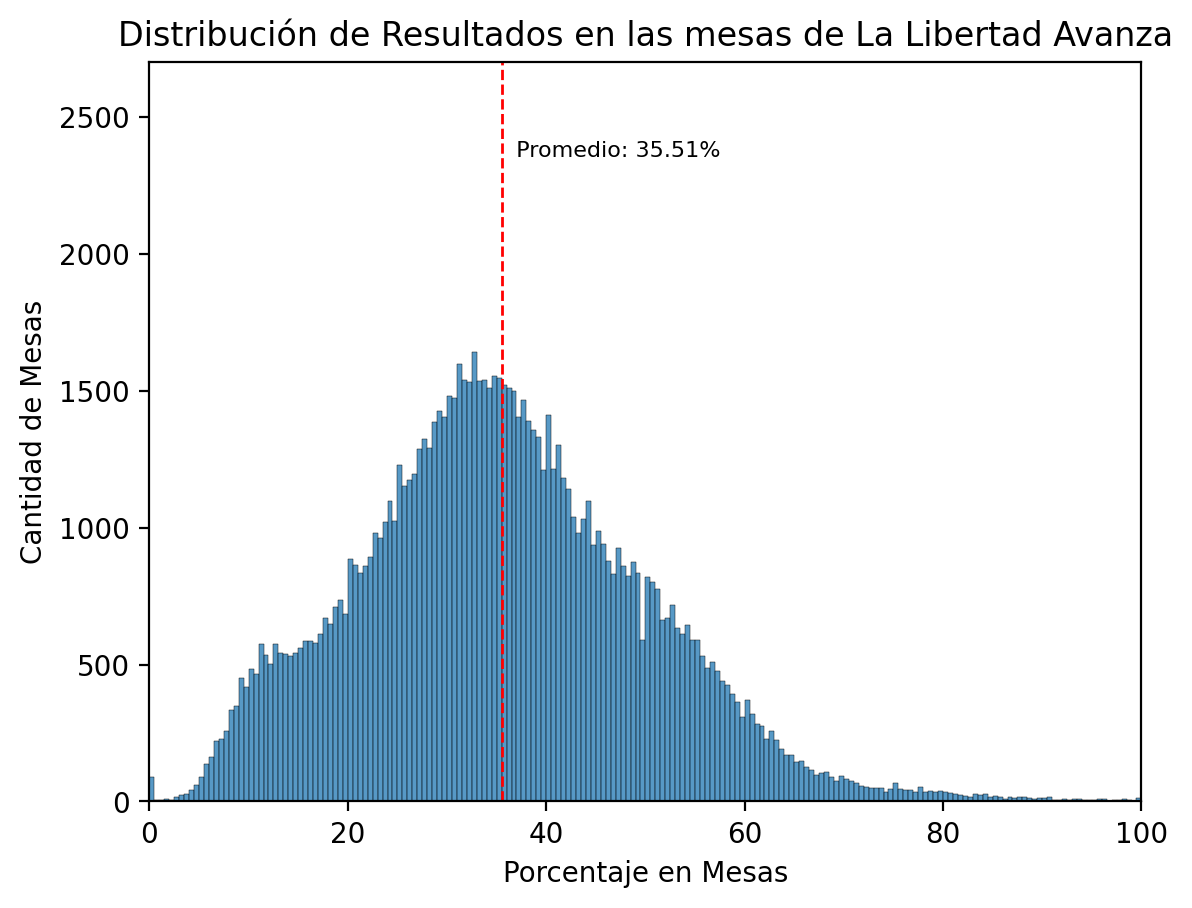

In [190]:
df1_mesas_porcen = df1_mesa[~df1_mesa['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]#.sort_values('votos_porcentaje', axis=0, ascending=False)#[df1_mesa['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()
chart = sns.histplot(df1_mesas_porcen, x="votos_porcentaje", bins=200)
chart.set(xlim=(0, 100))
plt.text(promedio,2500, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=8, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)
chart.set_ylim(0,2700)


plt.title('Distribución de Resultados en las mesas de La Libertad Avanza')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
# chart._legend.set_title("Nombre Agrupacion")
plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas_LLA.png', bbox_inches='tight')
plt.show()

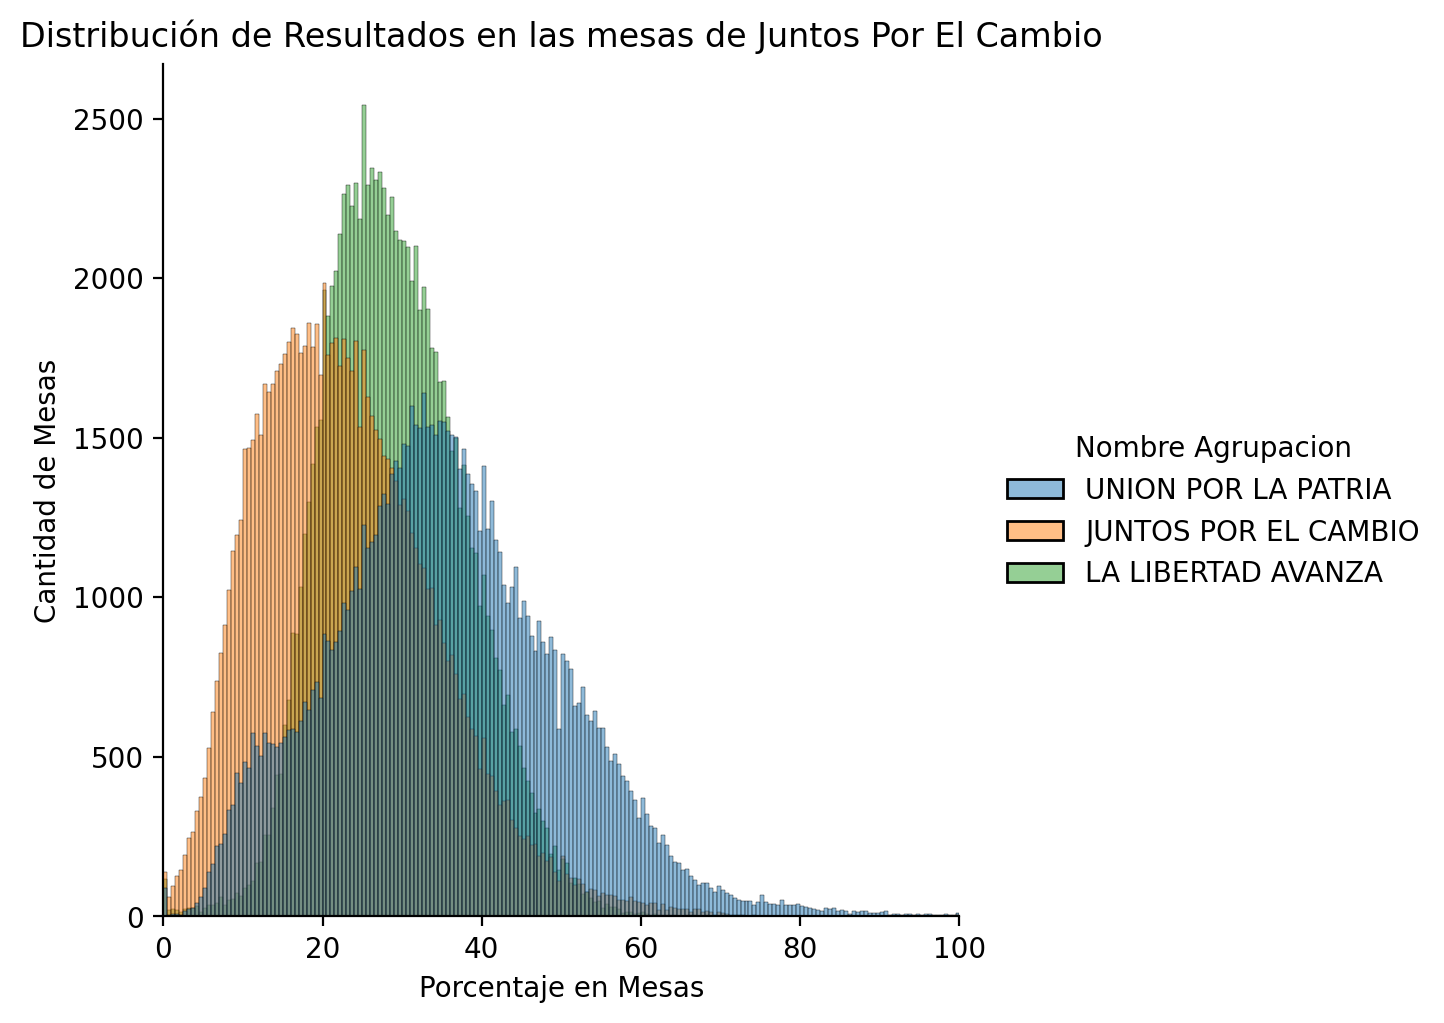

In [45]:
df1_mesas_porcen = df1_mesa[~df1_mesa['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]#.sort_values('votos_porcentaje', axis=0, ascending=False)#[df1_mesa['mesa_electores']>=30]
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()

chart = sns.displot(df1_mesas_porcen, x="votos_porcentaje", bins=200, hue='agrupacion_nombre')
chart.set(xlim=(0, 100))

plt.title('Distribución de Resultados en las mesas de Juntos Por El Cambio')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
chart._legend.set_title("Nombre Agrupacion")
plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas.png', bbox_inches='tight')
plt.show()

<hr>

# Mesas Particulares

In [159]:
# Mesa polémica twitter
# https://twitter.com/zorristaliberal/status/1717170934149259332?t=UdJ86wpBMo6ZNs34Tp3IOw&s=08
df_depurated_2[df1_mesa['id_mesa']=='14-00036-1259']

distrito_nombre  distrito_id        id_mesa  mesa_electores  \
502961        Misiones           14  14-00036-1259             348   
502962        Misiones           14  14-00036-1259             348   
502963        Misiones           14  14-00036-1259             348   
502964        Misiones           14  14-00036-1259             348   
502965        Misiones           14  14-00036-1259             348   
502966        Misiones           14  14-00036-1259             348   

               agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  
502961       UNION POR LA PATRIA            134   POSITIVO             104  
502962      JUNTOS POR EL CAMBIO            132   POSITIVO              49  
502963  HACEMOS POR NUESTRO PAIS            133   POSITIVO              12  
502964        LA LIBERTAD AVANZA            135   POSITIVO               2  
502965                       NaN              0  EN BLANCO               4  
502966                       NaN              0       NULO               1

In [13]:
# Mesa polémica ig
asdd = df1[df1['distrito_nombre']=='Mendoza']
asdd = asdd[asdd['circuito_id']=='00047']
asdd = asdd[asdd['mesa_id']==2087]
asdd
# asdd = asdd[asdd['distrito_nombre']=='Mendoza']

año eleccion_tipo recuento_tipo padron_tipo  distrito_id  \
852234  2023       GENERAL    PROVISORIO      NORMAL           13   
852235  2023       GENERAL    PROVISORIO      NORMAL           13   
852236  2023       GENERAL    PROVISORIO      NORMAL           13   
852237  2023       GENERAL    PROVISORIO      NORMAL           13   
852238  2023       GENERAL    PROVISORIO      NORMAL           13   
852239  2023       GENERAL    PROVISORIO      NORMAL           13   
852240  2023       GENERAL    PROVISORIO      NORMAL           13   
852241  2023       GENERAL    PROVISORIO      NORMAL           13   
852242  2023       GENERAL    PROVISORIO      NORMAL           13   
852243  2023       GENERAL    PROVISORIO      NORMAL           13   

       distrito_nombre  seccionprovincial_id seccionprovincial_nombre  \
852234         Mendoza                     2          Sección Segunda   
852235         Mendoza                     2          Sección Segunda   
852236         Mendoza                     2          Sección Segunda   
852237         Mendoza                     2          Sección Segunda   
852238         Mendoza                     2          Sección Segunda   
852239         Mendoza                     2          Sección Segunda   
852240         Mendoza                     2          Sección Segunda   
852241         Mendoza                     2          Sección Segunda   
852242         Mendoza                     2          Sección Segunda   
852243         Mendoza                     2          Sección Segunda   

        seccion_id seccion_nombre circuito_id circuito_nombre  mesa_id  \
852234           6          Maipú       00047           00047     2087   
852235           6          Maipú       00047           00047     2087   
852236           6          Maipú       00047           00047     2087   
852237           6          Maipú       00047           00047     2087   
852238           6          Maipú       00047           00047     2087   
852239           6          Maipú       00047           00047     2087   
852240           6          Maipú       00047           00047     2087   
852241           6          Maipú       00047           00047     2087   
852242           6          Maipú       00047           00047     2087   
852243           6          Maipú       00047           00047     2087   

       mesa_tipo  mesa_electores  cargo_id       cargo_nombre  agrupacion_id  \
852234   NATIVOS             347         1  PRESIDENTE Y VICE            134   
852235   NATIVOS             347         1  PRESIDENTE Y VICE            132   
852236   NATIVOS             347         1  PRESIDENTE Y VICE            135   
852237   NATIVOS             347         1  PRESIDENTE Y VICE            136   
852238   NATIVOS             347         1  PRESIDENTE Y VICE            133   
852239   NATIVOS             347         1  PRESIDENTE Y VICE              0   
852240   NATIVOS             347         1  PRESIDENTE Y VICE              0   
852241   NATIVOS             347         1  PRESIDENTE Y VICE              0   
852242   NATIVOS             347         1  PRESIDENTE Y VICE              0   
852243   NATIVOS             347         1  PRESIDENTE Y VICE              0   

                                     agrupacion_nombre  lista_numero  \
852234                             UNION POR LA PATRIA           NaN   
852235                            JUNTOS POR EL CAMBIO           NaN   
852236                              LA LIBERTAD AVANZA           NaN   
852237  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD           NaN   
852238                        HACEMOS POR NUESTRO PAIS           NaN   
852239                                             NaN           0.0   
852240                                             NaN           0.0   
852241                                             NaN           0.0   
852242                                             NaN           0.0   
852243                       

In [69]:
asdd = df1[(df1['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO') & (df1['votos_cantidad'] == 24)]
index = asdd['id_mesa'].tolist()
ddsa = df1[df1['id_mesa'].isin(index)]
ddsa = ddsa[(ddsa['agrupacion_nombre'] == 'UNION POR LA PATRIA') & (ddsa['votos_cantidad'] == 109)]
index2 = ddsa['id_mesa'].tolist()
ddsa2 = df1[df1['id_mesa'].isin(index2)]
ddsa2 = ddsa2[(ddsa2['agrupacion_nombre'] == 'HACEMOS POR NUESTRO PAIS') & (ddsa2['votos_cantidad'] == 14)]
df1[df1['id_mesa']=='17-0032B-3093']

año eleccion_tipo recuento_tipo padron_tipo  distrito_id  \
681334  2023       GENERAL    PROVISORIO      NORMAL           17   
681335  2023       GENERAL    PROVISORIO      NORMAL           17   
681336  2023       GENERAL    PROVISORIO      NORMAL           17   
681337  2023       GENERAL    PROVISORIO      NORMAL           17   
681338  2023       GENERAL    PROVISORIO      NORMAL           17   
681339  2023       GENERAL    PROVISORIO      NORMAL           17   
681340  2023       GENERAL    PROVISORIO      NORMAL           17   
681341  2023       GENERAL    PROVISORIO      NORMAL           17   
681342  2023       GENERAL    PROVISORIO      NORMAL           17   
681343  2023       GENERAL    PROVISORIO      NORMAL           17   

       distrito_nombre  seccionprovincial_id seccionprovincial_nombre  \
681334           Salta                     0                      NaN   
681335           Salta                     0                      NaN   
681336           Salta                     0                      NaN   
681337           Salta                     0                      NaN   
681338           Salta                     0                      NaN   
681339           Salta                     0                      NaN   
681340           Salta                     0                      NaN   
681341           Salta                     0                      NaN   
681342           Salta                     0                      NaN   
681343           Salta                     0                      NaN   

        seccion_id seccion_nombre circuito_id circuito_nombre  mesa_id  \
681334           7           Orán       0032B           0032B     3093   
681335           7           Orán       0032B           0032B     3093   
681336           7           Orán       0032B           0032B     3093   
681337           7           Orán       0032B           0032B     3093   
681338           7           Orán       0032B           0032B     3093   
681339           7           Orán       0032B           0032B     3093   
681340           7           Orán       0032B           0032B     3093   
681341           7           Orán       0032B           0032B     3093   
681342           7           Orán       0032B           0032B     3093   
681343           7           Orán       0032B           0032B     3093   

       mesa_tipo  mesa_electores  cargo_id       cargo_nombre  agrupacion_id  \
681334   NATIVOS             348         1  PRESIDENTE Y VICE            134   
681335   NATIVOS             348         1  PRESIDENTE Y VICE            132   
681336   NATIVOS             348         1  PRESIDENTE Y VICE            133   
681337   NATIVOS             348         1  PRESIDENTE Y VICE            136   
681338   NATIVOS             348         1  PRESIDENTE Y VICE            135   
681339   NATIVOS             348         1  PRESIDENTE Y VICE              0   
681340   NATIVOS             348         1  PRESIDENTE Y VICE              0   
681341   NATIVOS             348         1  PRESIDENTE Y VICE              0   
681342   NATIVOS             348         1  PRESIDENTE Y VICE              0   
681343   NATIVOS             348         1  PRESIDENTE Y VICE              0   

                                     agrupacion_nombre  lista_numero  \
681334                             UNION POR LA PATRIA           NaN   
681335                            JUNTOS POR EL CAMBIO           NaN   
681336                        HACEMOS POR NUESTRO PAIS           NaN   
681337  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD           NaN   
681338                              LA LIBERTAD AVANZA           NaN   
681339                                             NaN           0.0   
681340                                             NaN           0.0   
681341                                             NaN           0.0   
681342                                             NaN           0.0   
681343                       

In [82]:
df1_mesas_porcen = df1_mesa[df1_mesa['votos_porcentaje']>=80].sort_values('votos_porcentaje', axis=0, ascending=False)
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['mesa_electores']>=30]
# df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['votos_cantidad']>=25]
# print(df1_mesas_porcen.value_counts(['distrito_nombre']))
mesas = df1_mesas_porcen.value_counts(['distrito_nombre']).sum()
df1_mesas_porcen[df1_mesas_porcen['votos_cantidad']>20].tail(10)

distrito_nombre  distrito_id        id_mesa  mesa_electores  \
667540               Formosa            9    9-00028-698             327   
673420               Formosa            9   9-00083-1454             346   
985480   Santiago del Estero           22  22-00058-1273             345   
1000660  Santiago del Estero           22  22-0147A-1864             192   
980390   Santiago del Estero           22   22-00034-858             341   
995540   Santiago del Estero           22  22-00174-1982             307   
996710   Santiago del Estero           22  22-00182-2099             316   
976990   Santiago del Estero           22   22-00004-131             344   
984960   Santiago del Estero           22  22-00052-1220             348   
993060   Santiago del Estero           22  22-00122-1710             181   

           agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  \
667540   UNION POR LA PATRIA            134   POSITIVO             218   
673420   UNION POR LA PATRIA            134   POSITIVO             226   
985480   UNION POR LA PATRIA            134   POSITIVO             234   
1000660  UNION POR LA PATRIA            134   POSITIVO             121   
980390   UNION POR LA PATRIA            134   POSITIVO             205   
995540   UNION POR LA PATRIA            134   POSITIVO             193   
996710   UNION POR LA PATRIA            134   POSITIVO             193   
976990   UNION POR LA PATRIA            134   POSITIVO             232   
984960   UNION POR LA PATRIA            134   POSITIVO             220   
993060   UNION POR LA PATRIA            134   POSITIVO             104   

         votos_porcentaje  
667540              80.15  
673420              80.14  
985480              80.14  
1000660             80.13  
980390              80.08  
995540              80.08  
996710              80.08  
976990              80.00  
984960              80.00  
993060              80.00

In [122]:
dou = df1[df1['agrupacion_nombre']=='LA LIBERTAD AVANZA']
dou = dou[dou['mesa_electores']>=200]
dou = dou[dou['votos_cantidad']==1]
dou = dou[['distrito_nombre','seccion_nombre','circuito_id','mesa_id','agrupacion_nombre','votos_cantidad']]
dou

distrito_nombre  seccion_nombre circuito_id  mesa_id  \
306545          Buenos Aires           Luján       00596      142   
404653          Buenos Aires          Moreno       0663C      528   
500438               Córdoba   Juárez Celman       00118     5103   
645917            Entre Ríos       Villaguay       00228     2442   
698220                 Chaco    San Fernando       0016A      728   
698229                 Chaco    San Fernando       0016A      729   
778743              Misiones         Capital       0003A      164   
783555                 Chaco  General Güemes       00139     2940   
784345               Formosa     Ramón Lista       0083B     1470   
909603   Santiago del Estero           Choya       00076     1418   
911017   Santiago del Estero        Guasayán       00096     1561   
959882   Santiago del Estero       Río Hondo       00184     2114   
964113   Santiago del Estero      San Martín       00200     2291   
964124   Santiago del Estero      San Martín       00200     2292   
964133   Santiago del Estero      San Martín       00200     2293   
964152   Santiago del Estero      San Martín       00200     2295   
1163930              Tucumán          Leales       00128     2502   
1171556  Santiago del Estero         Capital       00012      721   
1182474  Santiago del Estero       Atamisqui       00039      899   

          agrupacion_nombre  votos_cantidad  
306545   LA LIBERTAD AVANZA               1  
404653   LA LIBERTAD AVANZA               1  
500438   LA LIBERTAD AVANZA               1  
645917   LA LIBERTAD AVANZA               1  
698220   LA LIBERTAD AVANZA               1  
698229   LA LIBERTAD AVANZA               1  
778743   LA LIBERTAD AVANZA               1  
783555   LA LIBERTAD AVANZA               1  
784345   LA LIBERTAD AVANZA               1  
909603   LA LIBERTAD AVANZA               1  
911017   LA LIBERTAD AVANZA               1  
959882   LA LIBERTAD AVANZA               1  
964113   LA LIBERTAD AVANZA               1  
964124   LA LIBERTAD AVANZA               1  
964133   LA LIBERTAD AVANZA               1  
964152   LA LIBERTAD AVANZA               1  
1163930  LA LIBERTAD AVANZA               1  
1171556  LA LIBERTAD AVANZA               1  
1182474  LA LIBERTAD AVANZA               1

In [171]:
df1_mesas_porcen = df1_mesa[df1_mesa['votos_porcentaje']>=80].sort_values('votos_porcentaje', axis=0, ascending=False)
mesas = df1_mesas_porcen.value_counts(['distrito_nombre']).sum()
asddd = df1_mesas_porcen[df1_mesas_porcen['votos_cantidad']>20]
# asddd = asddd[asddd['agrupacion_nombre']=='LA LIBERTAD AVANZA']
# asddd = asddd[asddd['votos_cantidad']<=200]
asddd.head(10)

# asd = df1[df1['id_mesa']=='9-00083-1454']
# asd = asd[['distrito_nombre','seccion_nombre','circuito_id','mesa_id','agrupacion_nombre','votos_cantidad']]
# asddd[~asddd['distrito_nombre'].isin(['Formosa','Santiago del Estero','Salta'])].tail(10)

distrito_nombre  distrito_id        id_mesa  mesa_electores  \
985370   Santiago del Estero           22  22-00055-1262             293   
627410            Entre Ríos            8     8-00002-64             349   
1000440  Santiago del Estero           22  22-0107A-1619             124   
996820   Santiago del Estero           22  22-00184-2112             293   
978620   Santiago del Estero           22   22-00012-717             294   
995040   Santiago del Estero           22  22-00159-1930             276   
996840   Santiago del Estero           22  22-00184-2114             299   
991600   Santiago del Estero           22  22-00095-1558             315   
838300                 Salta           17  17-0029I-2862             340   
838320                 Salta           17  17-0029I-2864             341   

            agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  \
985370    UNION POR LA PATRIA            134   POSITIVO             216   
627410   JUNTOS POR EL CAMBIO            132   POSITIVO             115   
1000440   UNION POR LA PATRIA            134   POSITIVO             122   
996820    UNION POR LA PATRIA            134   POSITIVO             229   
978620    UNION POR LA PATRIA            134   POSITIVO             220   
995040    UNION POR LA PATRIA            134   POSITIVO             239   
996840    UNION POR LA PATRIA            134   POSITIVO             230   
991600    UNION POR LA PATRIA            134   POSITIVO             227   
838300    UNION POR LA PATRIA            134   POSITIVO             241   
838320    UNION POR LA PATRIA            134   POSITIVO             238   

         votos_porcentaje  
985370             100.00  
627410             100.00  
1000440            100.00  
996820             100.00  
978620             100.00  
995040             100.00  
996840              99.57  
991600              99.56  
838300              99.18  
838320              99.17

In [91]:
asd = df1[df1['id_mesa']=='16-0038A-399']
asd = asd[['distrito_nombre','seccion_nombre','circuito_id','mesa_id','agrupacion_nombre','votos_cantidad']]
asd

distrito_nombre seccion_nombre circuito_id  mesa_id  \
841682       Río Negro     Pilcaniyeu       0038A      399   
841683       Río Negro     Pilcaniyeu       0038A      399   
841684       Río Negro     Pilcaniyeu       0038A      399   
841685       Río Negro     Pilcaniyeu       0038A      399   
841686       Río Negro     Pilcaniyeu       0038A      399   
841687       Río Negro     Pilcaniyeu       0038A      399   
841688       Río Negro     Pilcaniyeu       0038A      399   
841689       Río Negro     Pilcaniyeu       0038A      399   
841690       Río Negro     Pilcaniyeu       0038A      399   
841691       Río Negro     Pilcaniyeu       0038A      399   

                                     agrupacion_nombre  votos_cantidad  
841682                             UNION POR LA PATRIA              66  
841683                              LA LIBERTAD AVANZA               4  
841684                            JUNTOS POR EL CAMBIO               4  
841685  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD               0  
841686                        HACEMOS POR NUESTRO PAIS               0  
841687                                             NaN               0  
841688                                             NaN               6  
841689                                             NaN               0  
841690                                             NaN               0  
841691                                             NaN               2

In [44]:
df1_mesas_porcen = df1_mesa[df1_mesa['votos_porcentaje']>=30].sort_values('votos_porcentaje', axis=0, ascending=False)#[df1_mesa['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['votos_cantidad']>=25]
df1_mesas_porcen_izq = df1_mesas_porcen[df1_mesas_porcen['agrupacion_nombre']=='FRENTE DE IZQUIERDA']
df1_mesas_porcen_izq

distrito_nombre  distrito_id        id_mesa  \
327433                          Córdoba            4   4-0010M-1679   
545387                            Salta           17  17-0005A-1886   
7544    Ciudad Autónoma de Buenos Aires            1   1-00036-1121   
618202                         Santa Fe           21  21-03270-4781   
635995                         Santa Fe           21  21-03992-7433   
311578                          Córdoba            4   4-00035-3860   
492153                          Mendoza           13  13-0030E-1168   
314766                          Córdoba            4    4-0004D-297   
519587                          Neuquén           15   15-00069-604   
591555                         Santa Fe           21   21-00172-733   
44937   Ciudad Autónoma de Buenos Aires            1   1-00153-6614   

        mesa_electores    agrupacion_nombre  agrupacion_id votos_tipo  \
327433             323  FRENTE DE IZQUIERDA            136   POSITIVO   
545387             337  FRENTE DE IZQUIERDA            136   POSITIVO   
7544               338  FRENTE DE IZQUIERDA            136   POSITIVO   
618202             353  FRENTE DE IZQUIERDA            136   POSITIVO   
635995             352  FRENTE DE IZQUIERDA            136   POSITIVO   
311578             349  FRENTE DE IZQUIERDA            136   POSITIVO   
492153             349  FRENTE DE IZQUIERDA            136   POSITIVO   
314766             344  FRENTE DE IZQUIERDA            136   POSITIVO   
519587             350  FRENTE DE IZQUIERDA            136   POSITIVO   
591555             352  FRENTE DE IZQUIERDA            136   POSITIVO   
44937              348  FRENTE DE IZQUIERDA            136   POSITIVO   

        votos_cantidad  votos_porcentaje  
327433             122             50.00  
545387             129             48.68  
7544               111             43.70  
618202             110             41.67  
635995             102             37.78  
311578              94             34.18  
492153              89             32.60  
314766              98             32.34  
519587              95             32.31  
591555              91             31.71  
44937               83             30.63

In [54]:
# Cantidad de mesas totales
mesas_totales = len(df1['id_mesa'].unique().tolist())
mesas_totales

104520

In [111]:
NULO_DF_1 = df_depurated_2[df_depurated_2['votos_tipo']=='NULO']
data_corr=pd.DataFrame()
# data_corr['MESAS NULAS'] = []
data_corr['UNION POR LA PATRIA'] = []
data_corr['LA LIBERTAD AVANZA'] = []
data_corr['JUNTOS POR EL CAMBIO'] = []
# for i in range(10,84):
#     NULO_DF = NULO_DF_1[NULO_DF_1['votos_cantidad']==i].sort_values('votos_cantidad', ascending=False)
#     index = NULO_DF['id_mesa'].tolist()
#     mesas_nulas = df_depurated_2[df_depurated_2['id_mesa'].isin(NULO_DF['id_mesa'].unique().tolist())]
#     mesas_nulas = mesas_nulas[~mesas_nulas['agrupacion_id'].isin([136, 133, 0])]
#     for c in range(2):
#         min_votos= mesas_nulas.groupby('id_mesa')['votos_cantidad'].transform('min')
#         condition = mesas_nulas['votos_cantidad'] != min_votos
#         mesas_nulas = mesas_nulas[condition]
#     nueva_data = mesas_nulas.value_counts('agrupacion_nombre').reset_index().set_index('agrupacion_nombre').T.reset_index()
#     nueva_data.iloc[0,0]=i
#     nueva_data = nueva_data.rename(columns={'index': 'MESAS NULAS'})
#     # nueva_data = nueva_data.insert(0, 'Mesas_Nulas', i)
#     data_corr = pd.concat([data_corr,nueva_data])
# data_corr = data_corr.drop_duplicates()
# data_corr = data_corr.reset_index(drop=True)
# # data_corr = data_corr.reset_index()
# # data_corr = data_corr.rename(columns={'index': 'Mesas_Nulas'})
# mask = data_corr[['UNION POR LA PATRIA', 'LA LIBERTAD AVANZA', 'JUNTOS POR EL CAMBIO']].isna().all(axis=1)
# data_corr = data_corr[~mask]
# # # data_corr_segmentada
# # data_corr.iloc[0,0]
# data_corr_segmentada = data_corr#.iloc[:37,:]
# data_corr_segmentada




for i in range(1,84):
    # if i < 6:
    # NULO_DF_1 = NULO_DF_1[NULO_DF_1['votos_cantidad']>=1]
    NULO_DF = NULO_DF_1[NULO_DF_1['votos_cantidad']==i].sort_values('votos_cantidad', ascending=False)
    index = NULO_DF['id_mesa'].tolist()
    mesas_nulas = df_depurated_2[df_depurated_2['id_mesa'].isin(NULO_DF['id_mesa'].unique().tolist())]
    mesas_nulas = mesas_nulas[~mesas_nulas['agrupacion_id'].isin([136, 133, 0])]
    # else: 
    #     NULO_DF_1 = NULO_DF_1[NULO_DF_1['votos_cantidad']>=i-4]
    #     NULO_DF = NULO_DF_1[NULO_DF_1['votos_cantidad']<=i].sort_values('votos_cantidad', ascending=False)
    #     index = NULO_DF['id_mesa'].tolist()
    #     mesas_nulas = df_depurated_2[df_depurated_2['id_mesa'].isin(NULO_DF['id_mesa'].unique().tolist())]
    #     mesas_nulas = mesas_nulas[~mesas_nulas['agrupacion_id'].isin([136, 133, 0])]
    for i in range(2):
        min_votos= mesas_nulas.groupby('id_mesa')['votos_cantidad'].transform('min')
        condition = mesas_nulas['votos_cantidad'] != min_votos
        mesas_nulas = mesas_nulas[condition]
    nueva_data = mesas_nulas.value_counts('agrupacion_nombre').div(mesas_nulas.value_counts('agrupacion_nombre').sum()/100).reset_index().set_index('agrupacion_nombre').T
    # nueva_data = mesas_nulas.value_counts('agrupacion_nombre').reset_index().set_index('agrupacion_nombre').T
    # nueva_data = nueva_data.insert(0, 'Mesas_Nulas', i)
    data_corr = pd.concat([data_corr,nueva_data])
data_corr = data_corr.drop_duplicates()
data_corr = data_corr.reset_index(drop=True)
# data_corr = data_corr.reset_index()
data_corr = data_corr.rename(columns={'index': 'Mesas_Nulas'})
data_corr_segmentada = data_corr#.iloc[:37,:]
# data_corr_segmentada = data_corr
data_corr_segmentada
# data_corr

UNION POR LA PATRIA  LA LIBERTAD AVANZA  JUNTOS POR EL CAMBIO
0             46.941788           30.593931             22.464281
1             46.105635           32.609225             21.285141
2             46.568474           34.377938             19.053588
3             46.996631           36.714302             16.289067
4             46.709091           39.454545             13.836364
5             47.120867           40.336374             12.542759
6             46.534653           43.092881             10.372466
7             46.136012           46.367852              7.496136
8             48.531290           42.145594              9.323116
9             47.702407           47.921225              4.376368
10            47.709924           45.419847              6.870229
11            48.823529           48.235294              2.941176
12            50.000000           47.872340              2.127660
13            51.351351           41.891892              6.756757
14            50.000000           46.551724              3.448276
15            46.666667           46.666667              6.666667
16            45.454545           50.000000              4.545455
17            71.428571           28.571429                   NaN
18            50.000000           41.666667              8.333333
19            54.545455           45.454545                   NaN
20            71.428571           28.571429                   NaN
21            40.000000           40.000000             20.000000
22            80.000000           20.000000                   NaN
23            25.000000           75.000000                   NaN
24                  NaN          100.000000                   NaN
25           100.000000                 NaN                   NaN
26                  NaN                 NaN                   NaN
27                  NaN                 NaN            100.000000

In [92]:
df1['id_mesa'] = df1['distrito_id'].astype(str)+'-'+df1['circuito_id'].astype(str)+'-'+df1['mesa_id'].astype(str)
df1 = df1[df1['cargo_nombre'] == 'PRESIDENTE Y VICE']
df_depurated_1 = df1.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          ],
                         axis = 1) # .head(10)

df_depurated_2 = df_depurated_1[['distrito_nombre','distrito_id','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
df_depurated_2 = df_depurated_2.sort_values(['distrito_id','id_mesa']).reset_index(drop=True)
df_depurated_2['agrupacion_nombre'] = df_depurated_2['agrupacion_nombre'].replace(['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], 'FRENTE DE IZQUIERDA')
df_depurated_2.head(8)

distrito_nombre  distrito_id    id_mesa  mesa_electores  \
0  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
1  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
2  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
3  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
4  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
5  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
6  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   
7  Ciudad Autónoma de Buenos Aires            1  1-00001-1             345   

          agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  
0       UNION POR LA PATRIA            134   POSITIVO              96  
1      JUNTOS POR EL CAMBIO            132   POSITIVO              65  
2        LA LIBERTAD AVANZA            135   POSITIVO              44  
3       FRENTE DE IZQUIERDA            136   POSITIVO              13  
4  HACEMOS POR NUESTRO PAIS            133   POSITIVO               4  
5                       NaN              0  EN BLANCO               8  
6                       NaN              0       NULO               3  
7                       NaN              0  IMPUGNADO               0

In [93]:
NULO_DF = df_depurated_2[(df_depurated_2['votos_tipo']=='NULO') & (df_depurated_2['votos_cantidad']>=1)]
votos_nulos = NULO_DF['id_mesa']
# NULO_DF = NULO_DF.set_index(['id_mesa'])
# index = NULO_DF.index.tolist()

mesas_nulas = df_depurated_2[df_depurated_2['id_mesa'].isin(votos_nulos)]
max_votos= mesas_nulas.groupby('id_mesa')['votos_cantidad'].transform('max')
condition = mesas_nulas['votos_cantidad'] == max_votos
mesas_nulas = mesas_nulas[condition]
mesas_nulas
# mesas_nulas = mesas_nulas.set_index(['id_mesa'])
# mesas_nulas = mesas_nulas.loc[index]

df1_mesa = df_depurated_2.copy()
df1_mesa['votos_porcentaje'] = round(df1_mesa.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
lla_df = df1_mesa[(df1_mesa['id_mesa'].isin(votos_nulos)) & (df1_mesa['agrupacion_nombre']=='LA LIBERTAD AVANZA')]


nulo_data = NULO_DF[['id_mesa', 'votos_cantidad']]
nulo_data = nulo_data.rename(columns={'votos_cantidad': 'votos_nulos'})
df_nulos = pd.merge(mesas_nulas, nulo_data, on='id_mesa', how='left')

nulo_data = lla_df[['id_mesa', 'votos_porcentaje']]
df_nulos = pd.merge(df_nulos, nulo_data, on='id_mesa', how='left')
df_nulos









# # for c in range(2):
# #     min_votos= mesas_nulas.groupby('id_mesa')['votos_cantidad'].transform('min')
# #     condition = mesas_nulas['votos_cantidad'] != min_votos
# #     mesas_nulas = mesas_nulas[condition]
# mesas_upp = mesas_nulas[mesas_nulas['agrupacion_nombre']=='UNION POR LA PATRIA']
# mesas_upp_id = mesas_nulas['id_mesa'].tolist()
# mesas_upp
# 32329 rows × 8 columns
#23 22 12 92

# df_depurated_2_2 = df_depurated_2.copy()
# df_depurated_2_2 = df_depurated_2_2[(df_depurated_2_2['id_mesa'].isin(mesas_upp_id)) & (df_depurated_2_2['votos_tipo'] == 'NULO')]
# ides = df_depurated_2_2['id_mesa'].tolist()
# df_depurated_2[df_depurated_2['id_mesa'].isin(ides)].head(40)

# df_depurated_2_1 = df_depurated_2.copy()
# df_depurated_2_1 = df_depurated_2_1[~df_depurated_2_1['agrupacion_nombre'].isin(['EN BLANCO','NULO','COMANDO','RECURRIDO','IMPUGNADO'])]
# condition = df_depurated_2_1['agrupacion_nombre'] != 'NULO'
# df_depurated_2_1.loc[condition, 'votos_cantidad'] = df_depurated_2_1[condition].groupby('id_mesa')['votos_cantidad'].transform(
#     lambda x: (x / x.sum()) * 100
# )
# df_depurated_2_1 = df_depurated_2_1[df_depurated_2_1['id_mesa'].isin(mesas_upp_id)]
# df_depurated_2_1 = df_depurated_2_1[df_depurated_2_1['agrupacion_nombre']=='LA LIBERTAD AVANZA']
# df_depurated_2_1['nulos'] = 
# for i in range(1,84):
#     NULO_DF = NULO_DF_1[NULO_DF_1['votos_cantidad']>=i].sort_values('votos_cantidad', ascending=False)
#     index = NULO_DF['id_mesa'].tolist()
#     mesas_nulas = df_depurated_2[df_depurated_2['id_mesa'].isin(NULO_DF['id_mesa'].unique().tolist())]
#     mesas_nulas = mesas_nulas[~mesas_nulas['agrupacion_id'].isin([136, 133, 0])]
#     for i in range(2):
#         min_votos= mesas_nulas.groupby('id_mesa')['votos_cantidad'].transform('min')
#         condition = mesas_nulas['votos_cantidad'] != min_votos
#         mesas_nulas = mesas_nulas[condition]
#     nueva_data = mesas_nulas.value_counts('agrupacion_nombre').div(mesas_nulas.value_counts('agrupacion_nombre').sum()/100).reset_index().set_index('agrupacion_nombre').T
#     # nueva_data = mesas_nulas.value_counts('agrupacion_nombre').reset_index().set_index('agrupacion_nombre').T
#     # nueva_data = nueva_data.insert(0, 'Mesas_Nulas', i)
#     data_corr = pd.concat([data_corr,nueva_data])
# data_corr = data_corr.drop_duplicates()
# data_corr = data_corr.reset_index(drop=True)
# # data_corr = data_corr.reset_index()
# data_corr = data_corr.rename(columns={'index': 'Mesas_Nulas'})
# data_corr_segmentada = data_corr#.iloc[:37,:]
# # data_corr_segmentada = data_corr
# data_corr_segmentada
# # data_corr

# 901220	838480	824716	115180	

distrito_nombre  distrito_id  \
0                        Ciudad Autónoma de Buenos Aires            1   
1                        Ciudad Autónoma de Buenos Aires            1   
2                        Ciudad Autónoma de Buenos Aires            1   
3                        Ciudad Autónoma de Buenos Aires            1   
4                        Ciudad Autónoma de Buenos Aires            1   
...                                                  ...          ...   
71750  Tierra del Fuego, Antártida e Islas del Atlánt...           24   
71751  Tierra del Fuego, Antártida e Islas del Atlánt...           24   
71752  Tierra del Fuego, Antártida e Islas del Atlánt...           24   
71753  Tierra del Fuego, Antártida e Islas del Atlánt...           24   
71754  Tierra del Fuego, Antártida e Islas del Atlánt...           24   

            id_mesa  mesa_electores    agrupacion_nombre  agrupacion_id  \
0         1-00001-1             345  UNION POR LA PATRIA            134   
1        1-00001-10             344  UNION POR LA PATRIA            134   
2        1-00001-11             347  UNION POR LA PATRIA            134   
3        1-00001-12             343  UNION POR LA PATRIA            134   
4        1-00001-13             344  UNION POR LA PATRIA            134   
...             ...             ...                  ...            ...   
71750  24-00501-526             274   LA LIBERTAD AVANZA            135   
71751  24-00501-527             274   LA LIBERTAD AVANZA            135   
71752  24-00501-528             274   LA LIBERTAD AVANZA            135   
71753  24-00501-529             273   LA LIBERTAD AVANZA            135   
71754  24-00501-530             143   LA LIBERTAD AVANZA            135   

      votos_tipo  votos_cantidad  votos_nulos  votos_porcentaje  
0       POSITIVO              96            3             18.88  
1       POSITIVO              98            3             13.87  
2       POSITIVO             100            2             18.97  
3       POSITIVO             102            2             15.83  
4       POSITIVO              92            2             21.34  
...          ...             ...          ...               ...  
71750   POSITIVO              86            4             43.65  
71751   POSITIVO             105            2             49.30  
71752   POSITIVO             100            6             46.95  
71753   POSITIVO             103            4             49.52  
71754   POSITIVO              33            2             36.67  

[71755 rows x 10 columns]

In [94]:
df_nulos.sort_values(['votos_nulos'], ascending=False)

distrito_nombre  distrito_id        id_mesa  mesa_electores  \
54690           Salta           17  17-0003B-1500             348   
55706           Salta           17  17-0030B-2880             344   
60462        Santa Fe           21   21-00175-829             350   
54283           Salta           17  17-0001A-1015             337   
6278     Buenos Aires            2    2-00021-790             349   
...               ...          ...            ...             ...   
19645    Buenos Aires            2     2-01013-49             349   
19646    Buenos Aires            2      2-01013-5             347   
19649    Buenos Aires            2     2-01013-52             327   
19650    Buenos Aires            2     2-01013-53             161   
57559        San Juan           18  18-00066-1212             318   

          agrupacion_nombre  agrupacion_id votos_tipo  votos_cantidad  \
54690                   NaN              0       NULO              84   
55706    LA LIBERTAD AVANZA            135   POSITIVO             107   
60462  JUNTOS POR EL CAMBIO            132   POSITIVO              86   
54283  JUNTOS POR EL CAMBIO            132   POSITIVO              68   
6278    UNION POR LA PATRIA            134   POSITIVO             135   
...                     ...            ...        ...             ...   
19645  JUNTOS POR EL CAMBIO            132   POSITIVO             103   
19646   UNION POR LA PATRIA            134   POSITIVO             113   
19649   UNION POR LA PATRIA            134   POSITIVO              95   
19650   UNION POR LA PATRIA            134   POSITIVO              54   
57559    LA LIBERTAD AVANZA            135   POSITIVO              99   

       votos_nulos  votos_porcentaje  
54690           84             25.42  
55706           79             32.33  
60462           66             23.38  
54283           65             18.53  
6278            64             17.87  
...            ...               ...  
19645            1             23.79  
19646            1             21.88  
19649            1             24.23  
19650            1             29.13  
57559            1             38.67  

[71755 rows x 10 columns]

In [96]:
asd = df1[df1['id_mesa']=='2-00021-790']
asd = asd[['distrito_nombre','seccion_nombre','circuito_id','mesa_id','agrupacion_nombre','votos_cantidad']]
asd

distrito_nombre   seccion_nombre circuito_id  mesa_id  \
270383    Buenos Aires  Almirante Brown       00021      790   
270384    Buenos Aires  Almirante Brown       00021      790   
270385    Buenos Aires  Almirante Brown       00021      790   
270386    Buenos Aires  Almirante Brown       00021      790   
270387    Buenos Aires  Almirante Brown       00021      790   
270388    Buenos Aires  Almirante Brown       00021      790   
270389    Buenos Aires  Almirante Brown       00021      790   
270390    Buenos Aires  Almirante Brown       00021      790   
270391    Buenos Aires  Almirante Brown       00021      790   
270392    Buenos Aires  Almirante Brown       00021      790   

                                     agrupacion_nombre  votos_cantidad  
270383                             UNION POR LA PATRIA             135  
270384                              LA LIBERTAD AVANZA              62  
270385                            JUNTOS POR EL CAMBIO              53  
270386  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD              15  
270387                        HACEMOS POR NUESTRO PAIS              11  
270388                                             NaN               7  
270389                                             NaN              64  
270390                                             NaN               0  
270391                                             NaN               0  
270392                                             NaN               0

<AxesSubplot:>

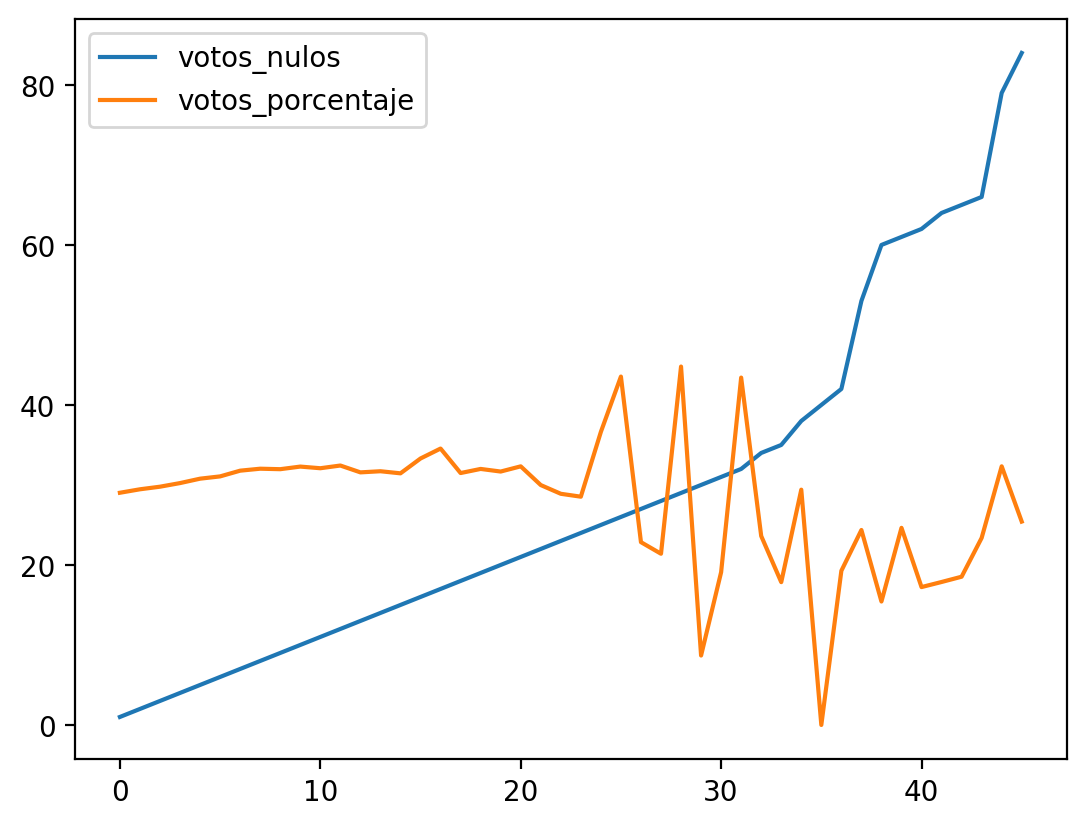

In [58]:
df_nulos_11 = df_nulos.copy()
# df_nulos_11 = df_nulos_11[df_nulos_11['distrito_nombre']=='Córdoba']
df_nulos_1 = df_nulos_11[['votos_nulos','votos_porcentaje']].sort_values(['votos_nulos'],ascending=False)
df_nulos_mean = df_nulos_1.groupby('votos_nulos')['votos_porcentaje'].mean().reset_index()
df_nulos_mean
df_nulos_mean.plot()

In [59]:
df_nulos_mean.corr()

votos_nulos  votos_porcentaje
votos_nulos          1.000000         -0.431263
votos_porcentaje    -0.431263          1.000000

In [60]:
import statsmodels.api as sm
X = sm.add_constant(df_nulos_mean['votos_nulos'])
model = sm.OLS(df_nulos_mean['votos_porcentaje'], X).fit()
model.summary()
# R-squared:	0.877
# y = 35.9211 -0.7779 * x

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       votos_porcentaje   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     10.05
Date:                Sat, 28 Oct 2023   Prob (F-statistic):            0.00277
Time:                        21:04:58   Log-Likelihood:                -158.00
No. Observations:                  46   AIC:                             320.0
Df Residuals:                      44   BIC:                             323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.5935      1.880     17.333      0.000      28.804      36.383
votos_nulos    -0.1671      0.053     -3.171      0.003      -0.273      -0.061
==============================================================================
Omnibus:                       10.348   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               16.899
Skew:                          -0.550   Prob(JB):                     0.000214
Kurtosis:                       5.758   Cond. No.                         59.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
df_depurated_2['votos_tipo'].unique()

array(['POSITIVO', 'EN BLANCO', 'NULO', 'COMANDO', 'RECURRIDO',
       'IMPUGNADO'], dtype=object)

In [107]:
data_corr_segmentada.sum()
# chart = sns.displot(data_corr_segmentada, x="MESAS NULAS", bins=70, hue='agrupacion_nombre')
# chart.set(xlim=(0, 100))

# plt.title('Distribución de Resultados en las mesas de Juntos Por El Cambio')
# plt.xlabel('Porcentaje en Mesas')
# plt.ylabel('Frequency')
# chart._legend.set_title("Nombre Agrupacion")
# plt.savefig('Imagenes/Distribución_de_Resultados_en_las_mesas.png')
# plt.show()

MESAS NULAS             1142.0
UNION POR LA PATRIA      626.0
LA LIBERTAD AVANZA       579.0
JUNTOS POR EL CAMBIO      59.0
dtype: float64

In [84]:
data_corr_segmentada.iloc[79,1] + 3

nan

In [33]:
data_corr_segmentada.corr()

Mesas_Nulas  UNION POR LA PATRIA  LA LIBERTAD AVANZA  \
Mesas_Nulas              1.000000             0.629224            0.137629   
UNION POR LA PATRIA      0.629224             1.000000           -0.777136   
LA LIBERTAD AVANZA       0.137629            -0.777136            1.000000   
JUNTOS POR EL CAMBIO     0.416716            -0.339403           -0.666141   

                      JUNTOS POR EL CAMBIO  
Mesas_Nulas                       0.416716  
UNION POR LA PATRIA              -0.339403  
LA LIBERTAD AVANZA               -0.666141  
JUNTOS POR EL CAMBIO              1.000000

In [1]:
data_corr_segmentada[['MESAS NULAS','LA LIBERTAD AVANZA','UNION POR LA PATRIA','JUNTOS POR EL CAMBIO']].plot(x='MESAS NULAS')

NameError: name 'data_corr_segmentada' is not defined

In [ ]:
plt.savefig('Imagenes/Resultados_Elecciones.png')

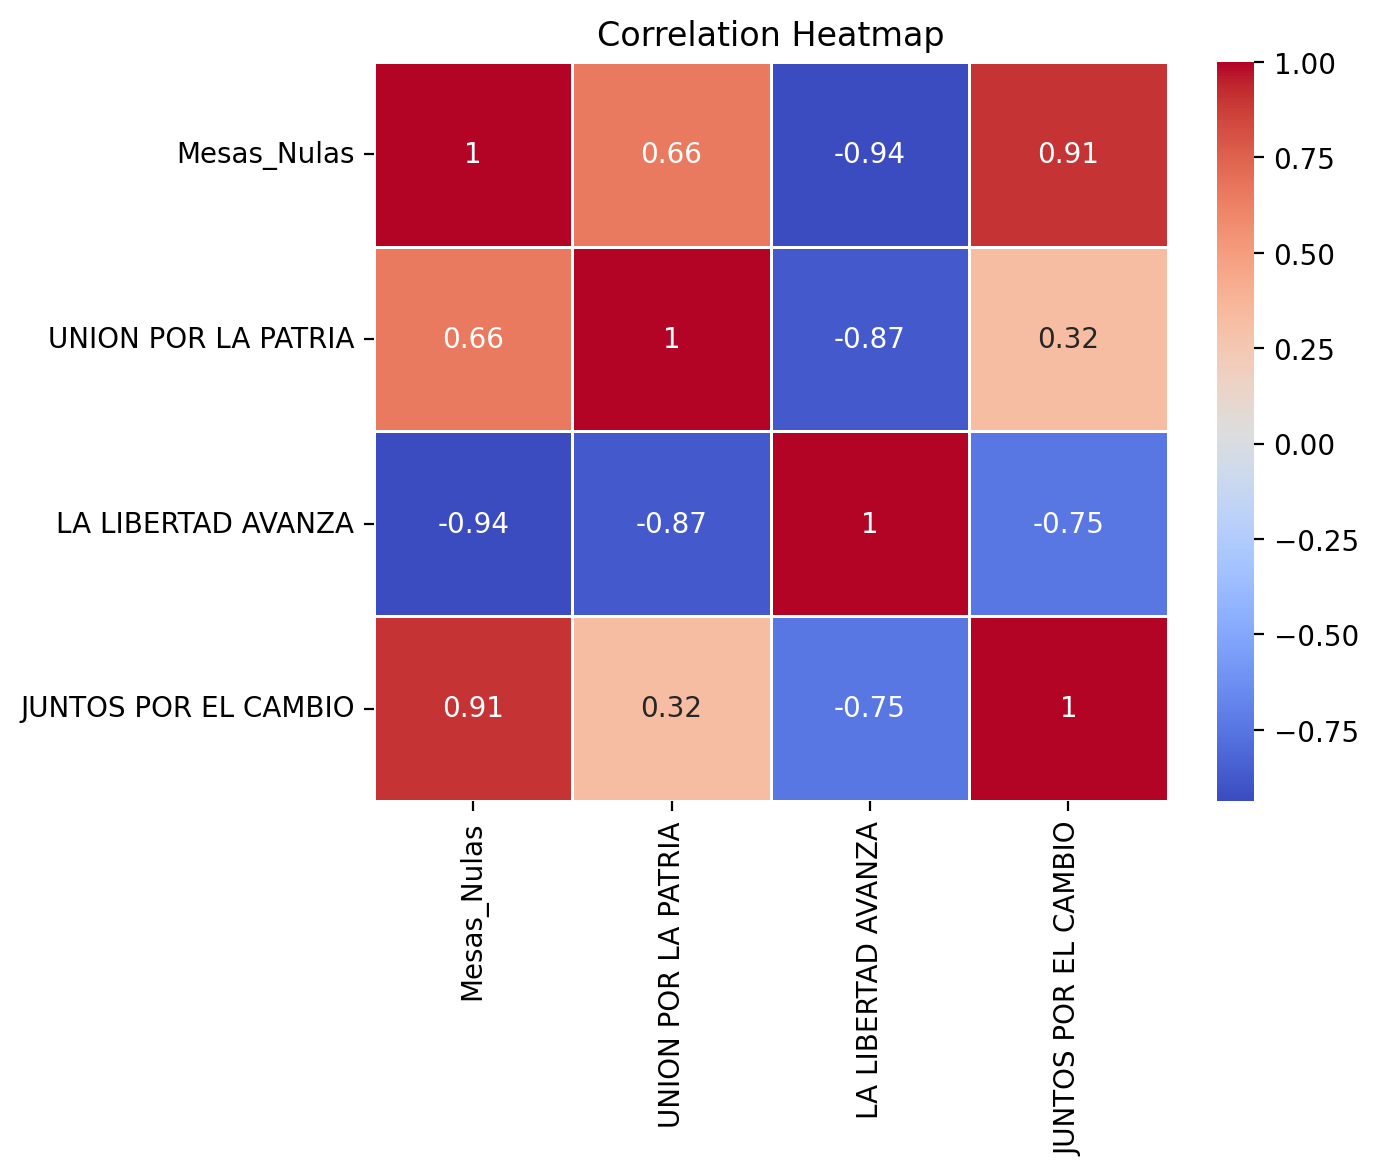

In [257]:
corr_matrix = data_corr_segmentada.corr()

# plt.figure(figsize=(3, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [263]:
import statsmodels.api as sm
X = sm.add_constant(data_corr_segmentada['LA LIBERTAD AVANZA'])
model = sm.OLS(data_corr_segmentada['Mesas_Nulas'], X).fit()
model.summary()
# R-squared:	0.877
# y = 35.9211 -0.7779 * x


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mesas_Nulas   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     192.8
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           8.22e-14
Time:                        23:29:35   Log-Likelihood:                -72.349
No. Observations:                  29   AIC:                             148.7
Df Residuals:                      27   BIC:                             151.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.9211      1.677     21.425      0.000      32.481      39.361
LA LIBERTAD AVANZA    -0.7779      0.056    -13.885      0.000      -0.893      -0.663
==============================================================================
Omnibus:                       13.101   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.070
Skew:                           1.176   Prob(JB):                     0.000880
Kurtosis:                       5.471   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<hr>

# Analisis Por Provincia

In [185]:
df1a = df1[df1['cargo_nombre']=='PRESIDENTE Y VICE']
asdd = df1a[df1a['distrito_nombre']=='Tucumán']

In [186]:
# df1['votos_cantidad'].sum()
asdd['votos_cantidad'].sum()

1079405

In [183]:
asdd.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index().sort_values(['votos_cantidad'], ascending=False)

agrupacion_nombre  votos_cantidad
4                             UNION POR LA PATRIA          471145
3                              LA LIBERTAD AVANZA          365992
2                            JUNTOS POR EL CAMBIO          153130
1                        HACEMOS POR NUESTRO PAIS           42086
0  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD           15152

In [181]:
asdd.groupby('votos_tipo')['votos_cantidad'].sum().reset_index()

votos_tipo  votos_cantidad
0    COMANDO             238
1  EN BLANCO           22416
2  IMPUGNADO              69
3       NULO            8661
4   POSITIVO         1047505
5  RECURRIDO             516

In [146]:
asdd2 = df1_mesa[df1_mesa['distrito_nombre']=='Formosa']
asdd2 = asdd2.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
asdd2 = asdd2[asdd2['votos_cantidad']>=0]
ides2 = asdd2['id_mesa'].tolist()
asdd3 = df1_mesa[df1_mesa['id_mesa'].isin(ides2)]
asdd3[asdd3['votos_porcentaje']>=50].value_counts(['agrupacion_nombre'])
# asdd = asdd[asdd['agrupacion_nombre']=='LA LIBERTAD AVANZA']
# asdd = asdd[asdd['votos_cantidad']<=5]
# ides = asdd['id_mesa'].tolist()
# asdd2 = df1_mesa[df1_mesa['id_mesa'].isin(ides)].reset_index(drop=True)
# asdd2 = asdd2.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
# asdd2 = asdd2[asdd2['votos_cantidad']>=50]
# ides2 = asdd2['id_mesa'].tolist()
# asdd3 = df1_mesa[df1_mesa['id_mesa'].isin(ides2)]
# # asdd3 = asdd3[asdd3['votos_porcentaje']>=90]
# asdd3
# max_votos= asdd3.groupby('id_mesa')['votos_cantidad'].transform('max')
# condition = asdd3['votos_cantidad'] == max_votos
# asdd3 = asdd3[condition]
# asdd3#['agrupacion_nombre'].value_counts()
# asdd3.groupby('agrupacion_nombre')['votos_porcentaje'].median()
# asdd3 = asdd2[asdd2['agrupacion_nombre']=='UNION POR LA PATRIA']
# asdd3 = asdd3[asdd3['votos_cantidad']!=0]
# asdd3.sort_values(['votos_porcentaje'])['votos_porcentaje']




# ides = asdd3['id_mesa'].tolist()
# asdd4 = df1_mesa[df1_mesa['id_mesa'].isin(ides)].reset_index(drop=True)
# asdd2.iloc[30:].head(40)
# asdd2[asdd2['agrupacion_nombre']=='UNION POR LA PATRIA']

agrupacion_nombre   
UNION POR LA PATRIA     811
LA LIBERTAD AVANZA        7
JUNTOS POR EL CAMBIO      5
dtype: int64

In [32]:
df1['distrito_nombre'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'La Pampa', 'Mendoza', 'Entre Ríos', 'Corrientes',
       'Río Negro', 'Neuquén', 'Salta', 'Santiago del Estero', 'Santa Fe',
       'Misiones', 'La Rioja', 'Chaco', 'Formosa', 'Chubut', 'Jujuy',
       'San Juan', 'Tucumán', 'San Luis',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz'], dtype=object)

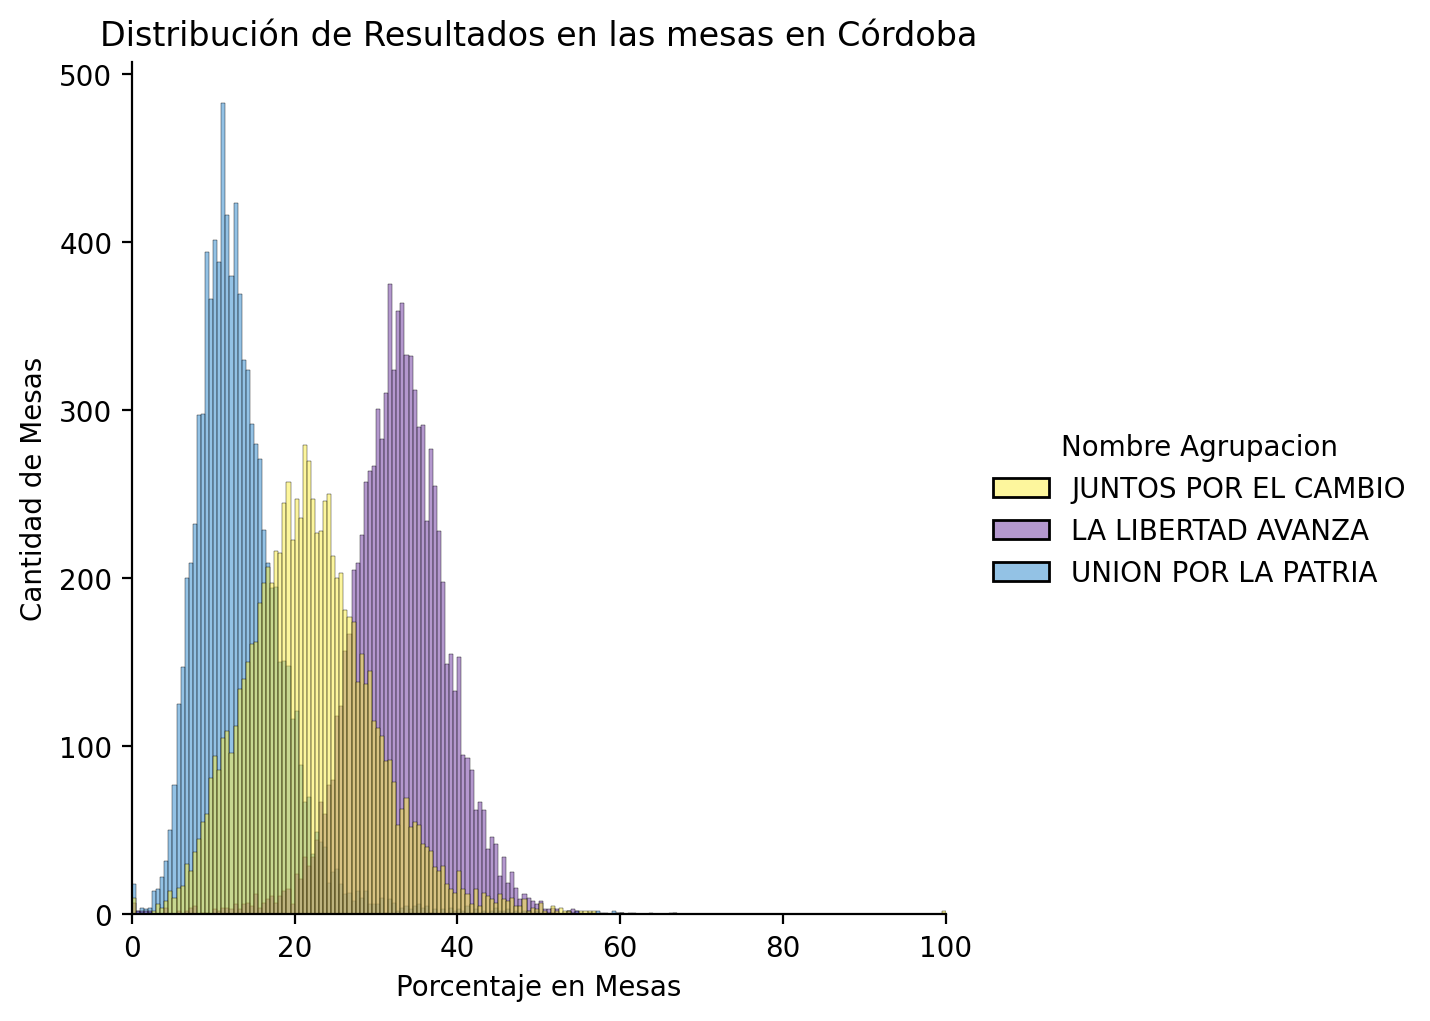

In [31]:
df1_mesas_porcen = df1_mesa[~df1_mesa['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]#.sort_values('votos_porcentaje', axis=0, ascending=False)#[df1_mesa['mesa_electores']>=30]
df1_mesas_porcen = df1_mesas_porcen[df1_mesas_porcen['distrito_nombre']=='Córdoba']
promedio = df1_mesas_porcen['votos_porcentaje'].mean()
mediana = df1_mesas_porcen['votos_porcentaje'].median()
custom_palette = sns.color_palette(['#FCEE3C', '#6A329F', '#2986CC'])
chart = sns.displot(df1_mesas_porcen, x="votos_porcentaje", bins=200, hue='agrupacion_nombre', palette = custom_palette)
chart.set(xlim=(0, 100))

plt.title('Distribución de Resultados en las mesas en Córdoba')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
chart._legend.set_title("Nombre Agrupacion")
plt.savefig('Imagenes/PROVINCIAS/Distribucion_mesas_Cordoba.png', bbox_inches='tight')
plt.show()

---

<hr>

In [193]:
df1.head(15)

año eleccion_tipo recuento_tipo padron_tipo  distrito_id  \
0   2023       GENERAL    PROVISORIO      NORMAL            1   
1   2023       GENERAL    PROVISORIO      NORMAL            1   
2   2023       GENERAL    PROVISORIO      NORMAL            1   
3   2023       GENERAL    PROVISORIO      NORMAL            1   
4   2023       GENERAL    PROVISORIO      NORMAL            1   
5   2023       GENERAL    PROVISORIO      NORMAL            1   
6   2023       GENERAL    PROVISORIO      NORMAL            1   
7   2023       GENERAL    PROVISORIO      NORMAL            1   
8   2023       GENERAL    PROVISORIO      NORMAL            1   
9   2023       GENERAL    PROVISORIO      NORMAL            1   
10  2023       GENERAL    PROVISORIO      NORMAL            1   
11  2023       GENERAL    PROVISORIO      NORMAL            1   
12  2023       GENERAL    PROVISORIO      NORMAL            1   
13  2023       GENERAL    PROVISORIO      NORMAL            1   
14  2023       GENERAL    PROVISORIO      NORMAL            1   

                    distrito_nombre  seccionprovincial_id  \
0   Ciudad Autónoma de Buenos Aires                     0   
1   Ciudad Autónoma de Buenos Aires                     0   
2   Ciudad Autónoma de Buenos Aires                     0   
3   Ciudad Autónoma de Buenos Aires                     0   
4   Ciudad Autónoma de Buenos Aires                     0   
5   Ciudad Autónoma de Buenos Aires                     0   
6   Ciudad Autónoma de Buenos Aires                     0   
7   Ciudad Autónoma de Buenos Aires                     0   
8   Ciudad Autónoma de Buenos Aires                     0   
9   Ciudad Autónoma de Buenos Aires                     0   
10  Ciudad Autónoma de Buenos Aires                     0   
11  Ciudad Autónoma de Buenos Aires                     0   
12  Ciudad Autónoma de Buenos Aires                     0   
13  Ciudad Autónoma de Buenos Aires                     0   
14  Ciudad Autónoma de Buenos Aires                     0   

   seccionprovincial_nombre  seccion_id seccion_nombre circuito_id  \
0                       NaN           1      Comuna 01       00018   
1                       NaN           1      Comuna 01       00018   
2                       NaN           1      Comuna 01       00018   
3                       NaN           1      Comuna 01       00018   
4                       NaN           1      Comuna 01       00018   
5                       NaN           1      Comuna 01       00018   
6                       NaN           1      Comuna 01       00018   
7                       NaN           1      Comuna 01       00018   
8                       NaN           1      Comuna 01       00018   
9                       NaN           1      Comuna 01       00018   
10                      NaN           1      Comuna 01       00018   
11                      NaN           1      Comuna 01       00018   
12                      NaN           1      Comuna 01       00018   
13                      NaN           1      Comuna 01       00018   
14                      NaN           1      Comuna 01       00018   

   circuito_nombre  mesa_id mesa_tipo  mesa_electores  cargo_id  \
0            00018      474   NATIVOS             343         1   
1            00018      474   NATIVOS             343         1   
2            00018      474   NATIVOS             343         1   
3            00018      474   NATIVOS             343         1   
4            00018      475   NATIVOS             349         1   
5            00018      475   NATIVOS             349         1   
6            00018      475   NATIVOS             349         1   
7            00018      475   NATIVOS             349         1   
8            00018      475   NATIVOS             349         1   
9            00018      475   NATIVOS             349         1   
10           00018      475   NATIVOS             349         1   
11           00018      475   NATIVOS             349         